In [1]:
import pandas as pd

# Load the adjacency matrix
adj_matrix = pd.read_csv('tra_adj_mat.csv')

# Display the first few rows
print("Adjacency Matrix:")
print(adj_matrix.head())

# Display basic information
print("\nAdjacency Matrix Info:")
print(adj_matrix.info())

# Display the shape of the matrix
print("\nAdjacency Matrix Shape:")
print(adj_matrix.shape)

Adjacency Matrix:
   Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8  Var9  Var10  ...  Var27  \
0     0     1     0     0     0     0     0     0     0      0  ...      0   
1     1     0     1     0     0     0     0     0     0      0  ...      0   
2     0     1     0     1     0     0     0     0     0      0  ...      0   
3     0     0     1     0     0     0     0     0     0      0  ...      0   
4     0     0     0     0     0     1     0     0     0      0  ...      1   

   Var28  Var29  Var30  Var31  Var32  Var33  Var34  Var35  Var36  
0      0      0      1      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      1      0      0      0      0  

[5 rows x 36 columns]

Adjacency Matrix Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 

In [2]:
# Load the test set
Y_test = pd.read_csv('tra_Y_te.csv')

# Display the first few rows
print("\nTest Set (Y_test):")
print(Y_test.head())

# Display basic information
print("\nTest Set Info:")
print(Y_test.info())

# Display the shape of the test set
print("\nTest Set Shape:")
print(Y_test.shape)


Test Set (Y_test):
       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.401681  0.380196  0.355441  0.347501  0.375525  0.342830  0.401681   
1  0.573097  0.619337  0.589911  0.667445  0.618403  0.626810  0.503036   
2  0.397011  0.410089  0.363849  0.385801  0.346567  0.360579  0.323213   
3  0.463335  0.429239  0.428772  0.411023  0.426903  0.407753  0.404017   
4  0.284914  0.376927  0.395142  0.427837  0.421298  0.526390  0.500701   

       Var8      Var9     Var10  ...    Var831    Var832    Var833    Var834  \
0  0.413825  0.384400  0.373190  ...  0.153199  0.143858  0.112564  0.104157   
1  0.440448  0.447454  0.439047  ...  0.254087  0.224194  0.202242  0.162074   
2  0.332555  0.346567  0.313872  ...  0.172816  0.159738  0.113498  0.118636   
3  0.407286  0.417095  0.397478  ...  0.253153  0.202242  0.164876  0.163942   
4  0.554414  0.527324  0.525455  ...  0.432508  0.392807  0.311070  0.263895   

     Var835    Var836    Var837    Var838    Var

In [3]:
# Load the training set
Y_train = pd.read_csv('tra_Y_tr.csv')

# Display the first few rows
print("\nTraining Set (Y_train):")
print(Y_train.head())

# Display basic information
print("\nTraining Set Info:")
print(Y_train.info())

# Display the shape of the training set
print("\nTraining Set Shape:")
print(Y_train.shape)


Training Set (Y_train):
       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.050911  0.047641  0.044839  0.059785  0.062588  0.063989  0.088277   
1  0.046240  0.049510  0.052312  0.046707  0.057450  0.055582  0.077534   
2  0.050444  0.044372  0.050444  0.050444  0.043438  0.066791  0.069127   
3  0.044839  0.038300  0.051378  0.050444  0.045773  0.048108  0.056983   
4  0.044839  0.053246  0.056516  0.049043  0.041569  0.049977  0.047641   

       Var8      Var9     Var10  ...   Var1252   Var1253   Var1254   Var1255  \
0  0.113498  0.122840  0.125175  ...  0.071462  0.080336  0.098085  0.147595   
1  0.094348  0.097151  0.107426  ...  0.054180  0.081738  0.074731  0.120504   
2  0.070061  0.095750  0.079869  ...  0.044372  0.068660  0.072863  0.104157   
3  0.059785  0.077534  0.077534  ...  0.054647  0.070995  0.073797  0.098085   
4  0.065390  0.061653  0.063055  ...  0.058851  0.053713  0.054647  0.068192   

    Var1256   Var1257   Var1258   Var1259  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import MinMaxScaler

# =========================================
# STEP 1: CHECK DATA
# =========================================
print("✅ Dataset Shapes:")
print(f"Adjacency Matrix: {adj_matrix.shape}")  # Should be (36, 36)
print(f"Train Data: {Y_train.shape}")  # Expected: (36, X)
print(f"Test Data: {Y_test.shape}")  # Expected: (36, X)

# Check for missing values
print("\n🛠 Checking Missing Values:")
print("Adjacency Matrix:", adj_matrix.isnull().sum().sum(), "missing values")
print("Train Data:", Y_train.isnull().sum().sum(), "missing values")
print("Test Data:", Y_test.isnull().sum().sum(), "missing values")

# Fill missing values (if any)
Y_train.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)
adj_matrix.fillna(0, inplace=True)


✅ Dataset Shapes:
Adjacency Matrix: (36, 36)
Train Data: (36, 1261)
Test Data: (36, 840)

🛠 Checking Missing Values:
Adjacency Matrix: 0 missing values
Train Data: 0 missing values
Test Data: 0 missing values


In [5]:
# Ensure test set has the same columns as train set (fill missing with 0)
Y_test_aligned = Y_test.reindex(columns=Y_train.columns, fill_value=0)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the training dataset
Y_train_scaled = pd.DataFrame(scaler.fit_transform(Y_train), columns=Y_train.columns)

# Normalize the test dataset & clip values to [0,1]
Y_test_scaled = pd.DataFrame(scaler.transform(Y_test_aligned), columns=Y_train.columns)
Y_test_scaled = Y_test_scaled.clip(0, 1)  # 🔥 Fix: Ensure all values stay in range

# Check range after scaling
print("\n🚀 Data Normalization (Fixed):")
print("Train Data Min:", Y_train_scaled.min().min(), "Max:", Y_train_scaled.max().max())
print("Test Data Min:", Y_test_scaled.min().min(), "Max:", Y_test_scaled.max().max())



🚀 Data Normalization (Fixed):
Train Data Min: 0.0 Max: 1.0000000000000002
Test Data Min: 0.0 Max: 1.0


In [6]:
pip install networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
print("Adjacency Matrix Shape:")
print(adj_matrix.shape)

Adjacency Matrix Shape:
(36, 36)


In [8]:
import numpy as np

# Convert the adjacency matrix to a NumPy array
adj_matrix_np = adj_matrix.values

# Check if the matrix is 35 × 35
if adj_matrix_np.shape == (35, 35):
    # Add a missing row and column to make it 36 × 36
    adj_matrix_fixed = np.zeros((36, 36))
    adj_matrix_fixed[:35, :35] = adj_matrix_np
    print("Adjacency matrix fixed to 36 × 36.")
else:
    adj_matrix_fixed = adj_matrix_np
    print("Adjacency matrix is already 36 × 36.")

# Convert back to a DataFrame
adj_matrix_fixed = pd.DataFrame(adj_matrix_fixed)

# Verify the shape
print("Fixed Adjacency Matrix Shape:")
print(adj_matrix_fixed.shape)

Adjacency matrix is already 36 × 36.
Fixed Adjacency Matrix Shape:
(36, 36)


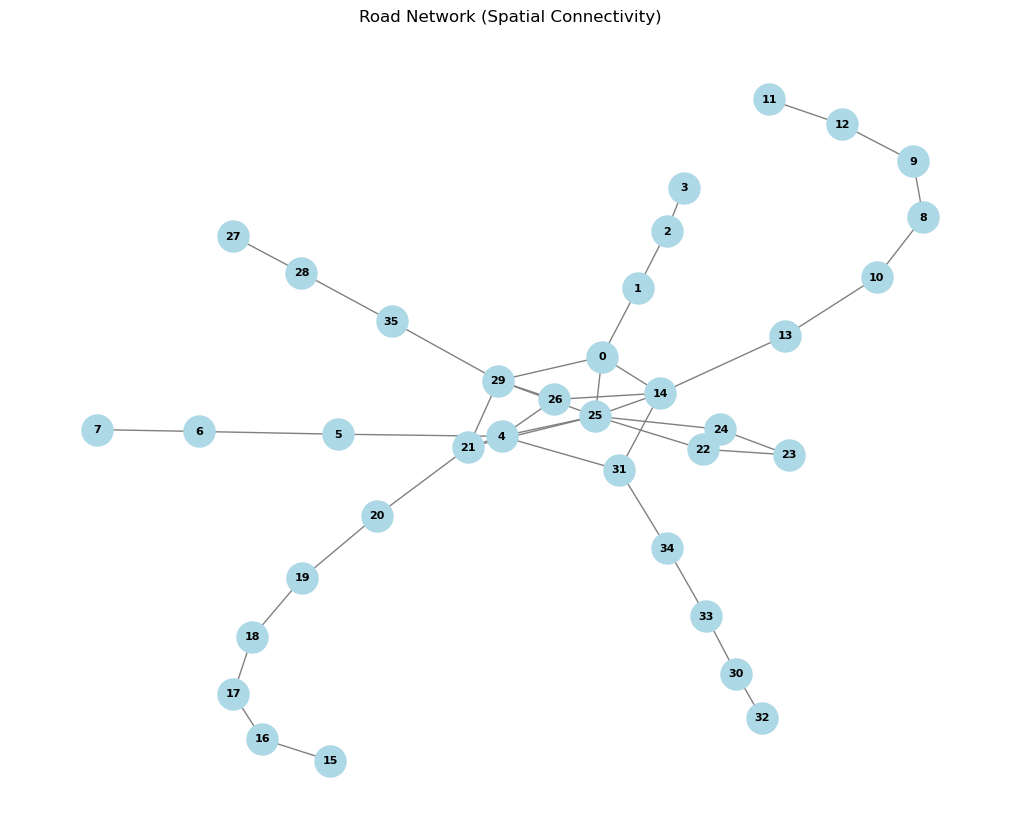

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the fixed adjacency matrix
G = nx.from_pandas_adjacency(adj_matrix_fixed)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')
plt.title('Road Network (Spatial Connectivity)')
plt.show()

✅ Adjacency Matrix Shape: (36, 36)


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


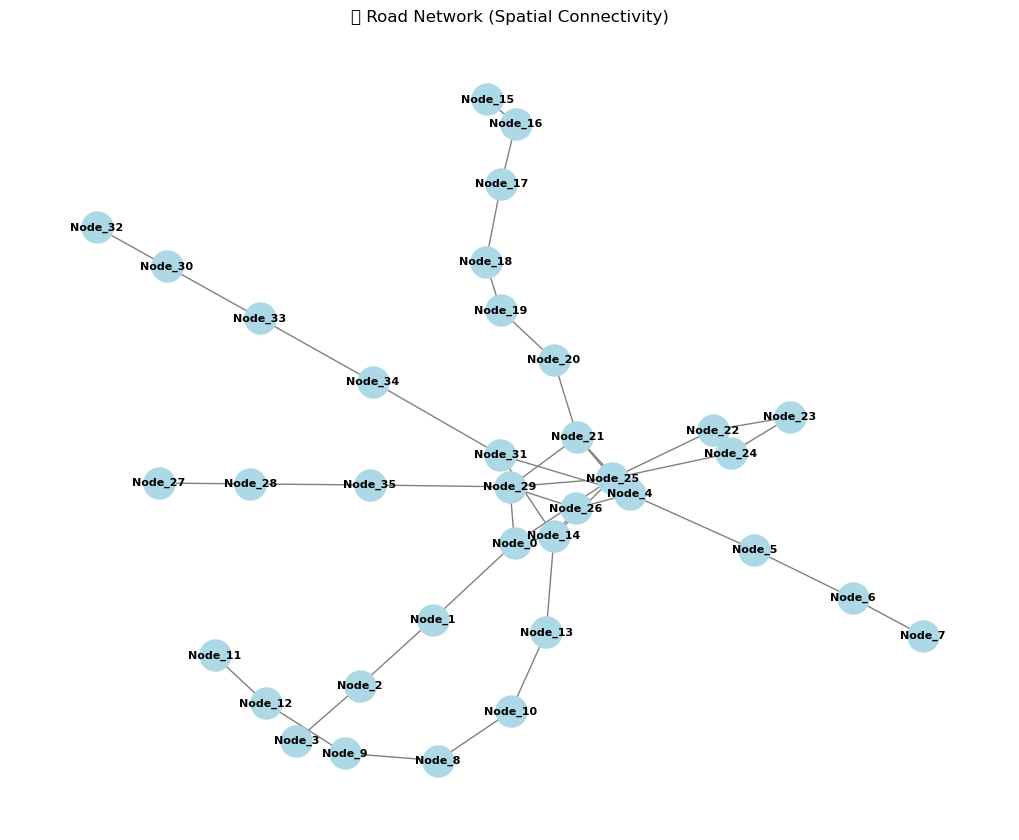

In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Convert the adjacency matrix to a NumPy array
adj_matrix_np = adj_matrix.values

# Ensure the matrix is 36 × 36
if adj_matrix_np.shape == (35, 35):
    print("⚠️ Matrix is 35x35. Fixing...")
    adj_matrix_fixed = np.zeros((36, 36))  # Create a 36x36 zero matrix
    adj_matrix_fixed[:35, :35] = adj_matrix_np  # Fill with existing values
else:
    adj_matrix_fixed = adj_matrix_np

# Convert back to DataFrame with proper index & column labels
node_labels = [f"Node_{i}" for i in range(36)]  # Create labels for nodes
adj_matrix_fixed = pd.DataFrame(adj_matrix_fixed, index=node_labels, columns=node_labels)

# 🔍 Debugging
print(f"✅ Adjacency Matrix Shape: {adj_matrix_fixed.shape}")

# ✅ Convert adjacency matrix to NetworkX Graph
G = nx.from_pandas_adjacency(adj_matrix_fixed)

# 🔍 Visualize the road network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue',
        font_size=8, font_weight='bold', edge_color='gray')
plt.title('🚦 Road Network (Spatial Connectivity)')
plt.show()


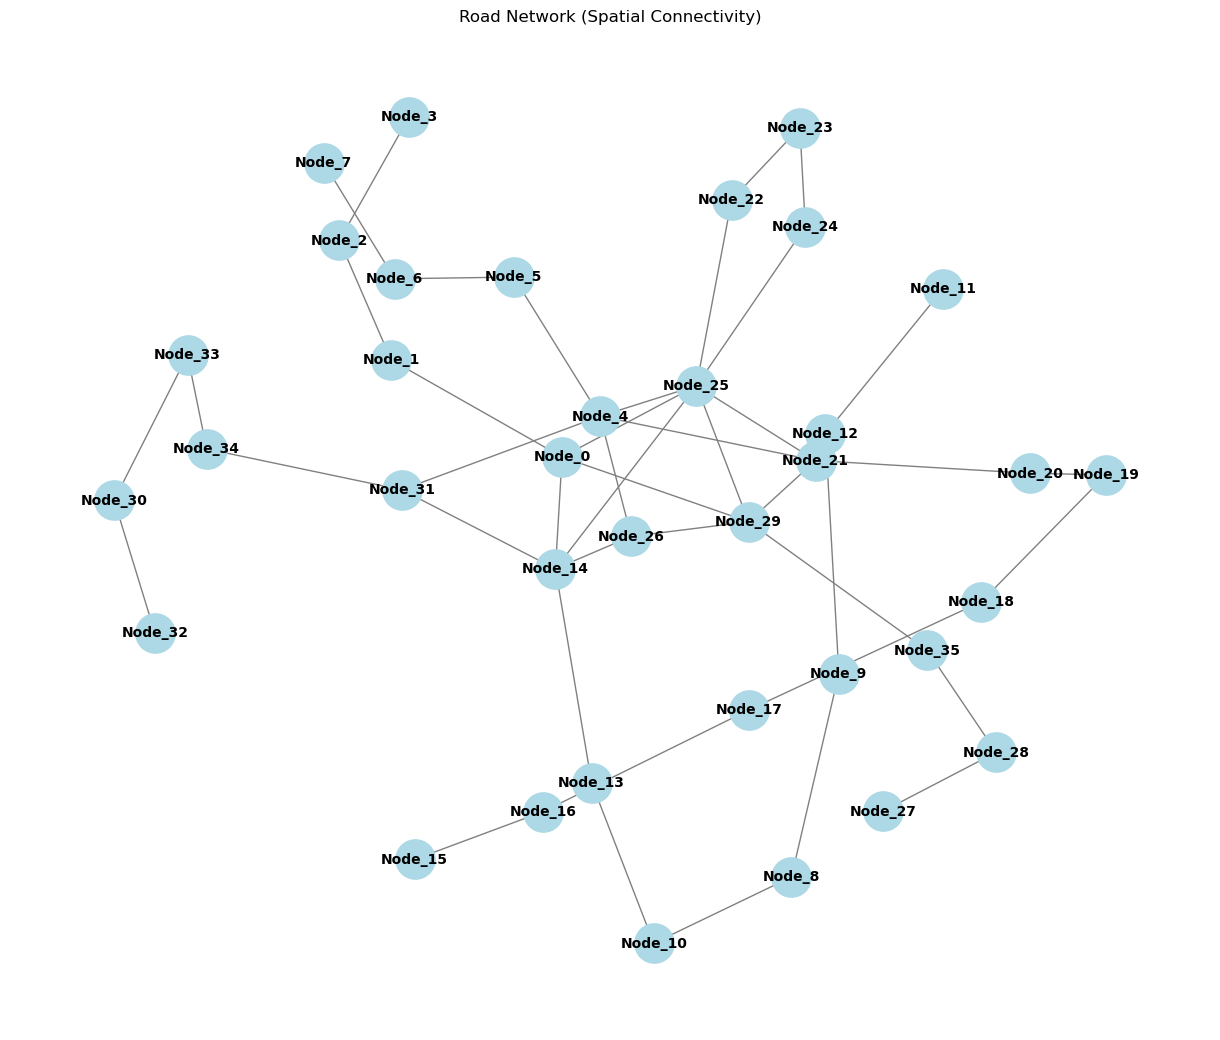

In [11]:
# Plot the graph with improved layout and labels
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # Increase k for more spacing
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Road Network (Spatial Connectivity)')
plt.show()

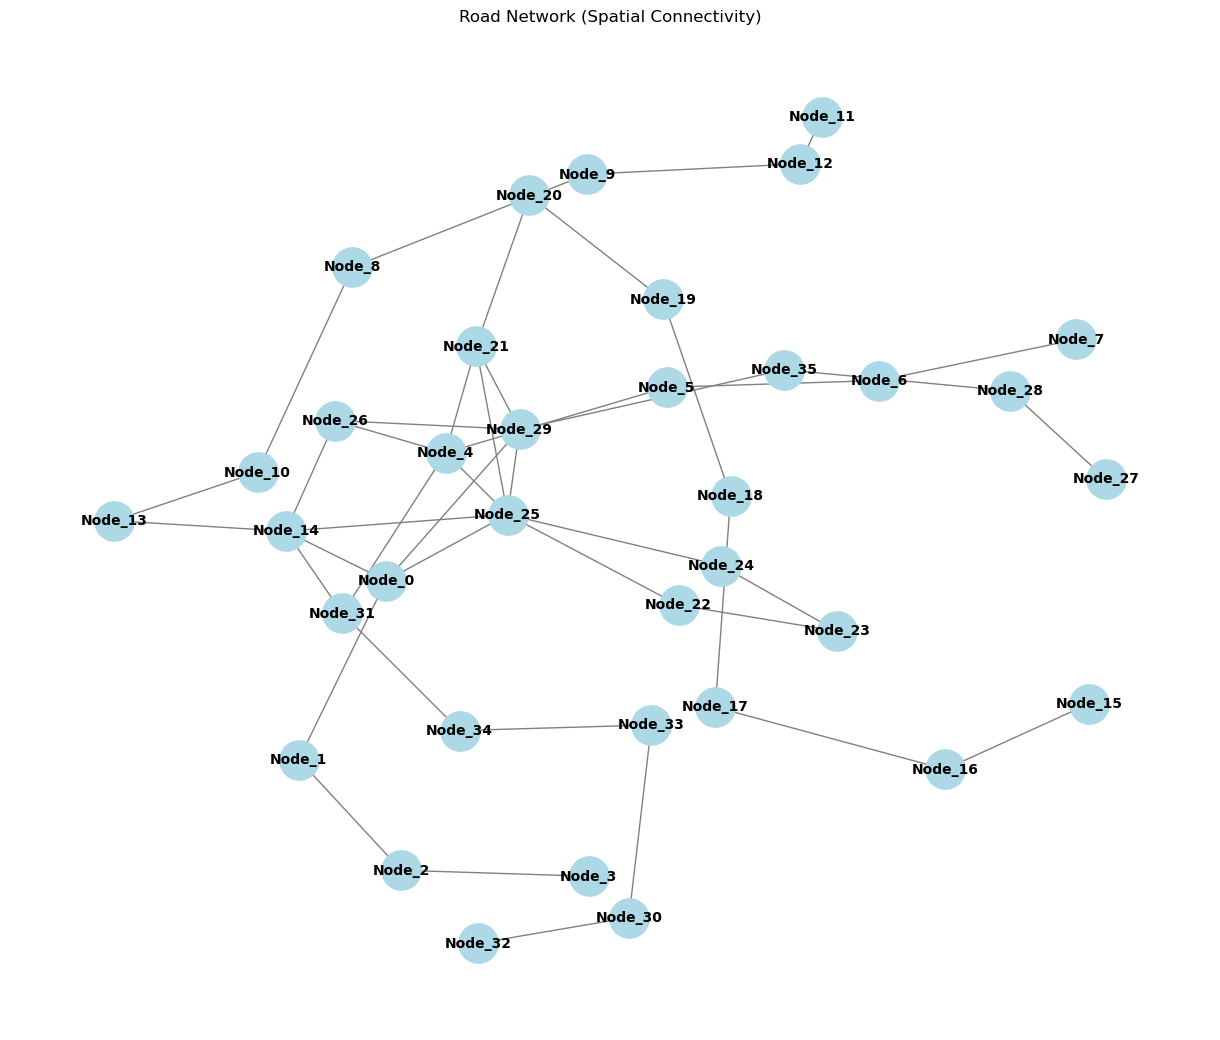

In [12]:
# Remove self-loops from the graph
G.remove_edges_from(nx.selfloop_edges(G))

# Replot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Road Network (Spatial Connectivity)')
plt.show()

In [13]:
# Check connections for Node_27 and Node_35
print("Connections for Node_27:")
print(adj_matrix_fixed.iloc[27, :])  # Row 27 (Node_27)

print("\nConnections for Node_35:")
print(adj_matrix_fixed.iloc[35, :])  # Row 35 (Node_35)

Connections for Node_27:
Node_0     0
Node_1     0
Node_2     0
Node_3     0
Node_4     0
Node_5     0
Node_6     0
Node_7     0
Node_8     0
Node_9     0
Node_10    0
Node_11    0
Node_12    0
Node_13    0
Node_14    0
Node_15    0
Node_16    0
Node_17    0
Node_18    0
Node_19    0
Node_20    0
Node_21    0
Node_22    0
Node_23    0
Node_24    0
Node_25    0
Node_26    0
Node_27    0
Node_28    1
Node_29    0
Node_30    0
Node_31    0
Node_32    0
Node_33    0
Node_34    0
Node_35    0
Name: Node_27, dtype: int64

Connections for Node_35:
Node_0     0
Node_1     0
Node_2     0
Node_3     0
Node_4     0
Node_5     0
Node_6     0
Node_7     0
Node_8     0
Node_9     0
Node_10    0
Node_11    0
Node_12    0
Node_13    0
Node_14    0
Node_15    0
Node_16    0
Node_17    0
Node_18    0
Node_19    0
Node_20    0
Node_21    0
Node_22    0
Node_23    0
Node_24    0
Node_25    0
Node_26    0
Node_27    0
Node_28    1
Node_29    1
Node_30    0
Node_31    0
Node_32    0
Node_33    0
Node_34    

✅ Removed Isolated Nodes: []


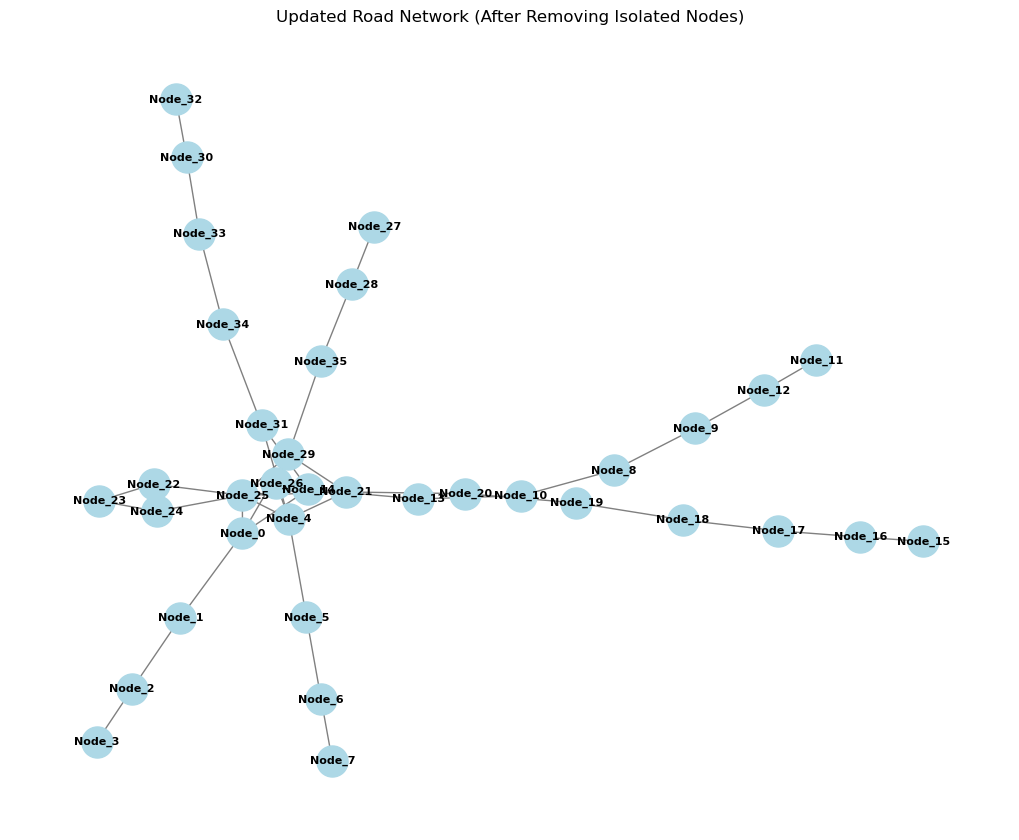

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Identify isolated nodes (nodes with zero connections)
isolated_nodes = [node for node in G.nodes if G.degree(node) == 0]

# Remove isolated nodes from the graph
G.remove_nodes_from(isolated_nodes)

print("✅ Removed Isolated Nodes:", isolated_nodes)

# Re-visualize the updated graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', edge_color='gray')
plt.title('Updated Road Network (After Removing Isolated Nodes)')
plt.show()


In [15]:
# Drop rows and columns of isolated nodes from the adjacency matrix
adj_matrix_fixed.drop(index=isolated_nodes, columns=isolated_nodes, inplace=True)

# Verify the shape after removal
print("\n✅ Updated Adjacency Matrix Shape:", adj_matrix_fixed.shape)



✅ Updated Adjacency Matrix Shape: (36, 36)


In [16]:
print("Graph Nodes After Removal:", list(G.nodes))
print("Adjacency Matrix New Shape:", adj_matrix_fixed.shape)


Graph Nodes After Removal: ['Node_0', 'Node_1', 'Node_2', 'Node_3', 'Node_4', 'Node_5', 'Node_6', 'Node_7', 'Node_8', 'Node_9', 'Node_10', 'Node_11', 'Node_12', 'Node_13', 'Node_14', 'Node_15', 'Node_16', 'Node_17', 'Node_18', 'Node_19', 'Node_20', 'Node_21', 'Node_22', 'Node_23', 'Node_24', 'Node_25', 'Node_26', 'Node_27', 'Node_28', 'Node_29', 'Node_30', 'Node_31', 'Node_32', 'Node_33', 'Node_34', 'Node_35']
Adjacency Matrix New Shape: (36, 36)


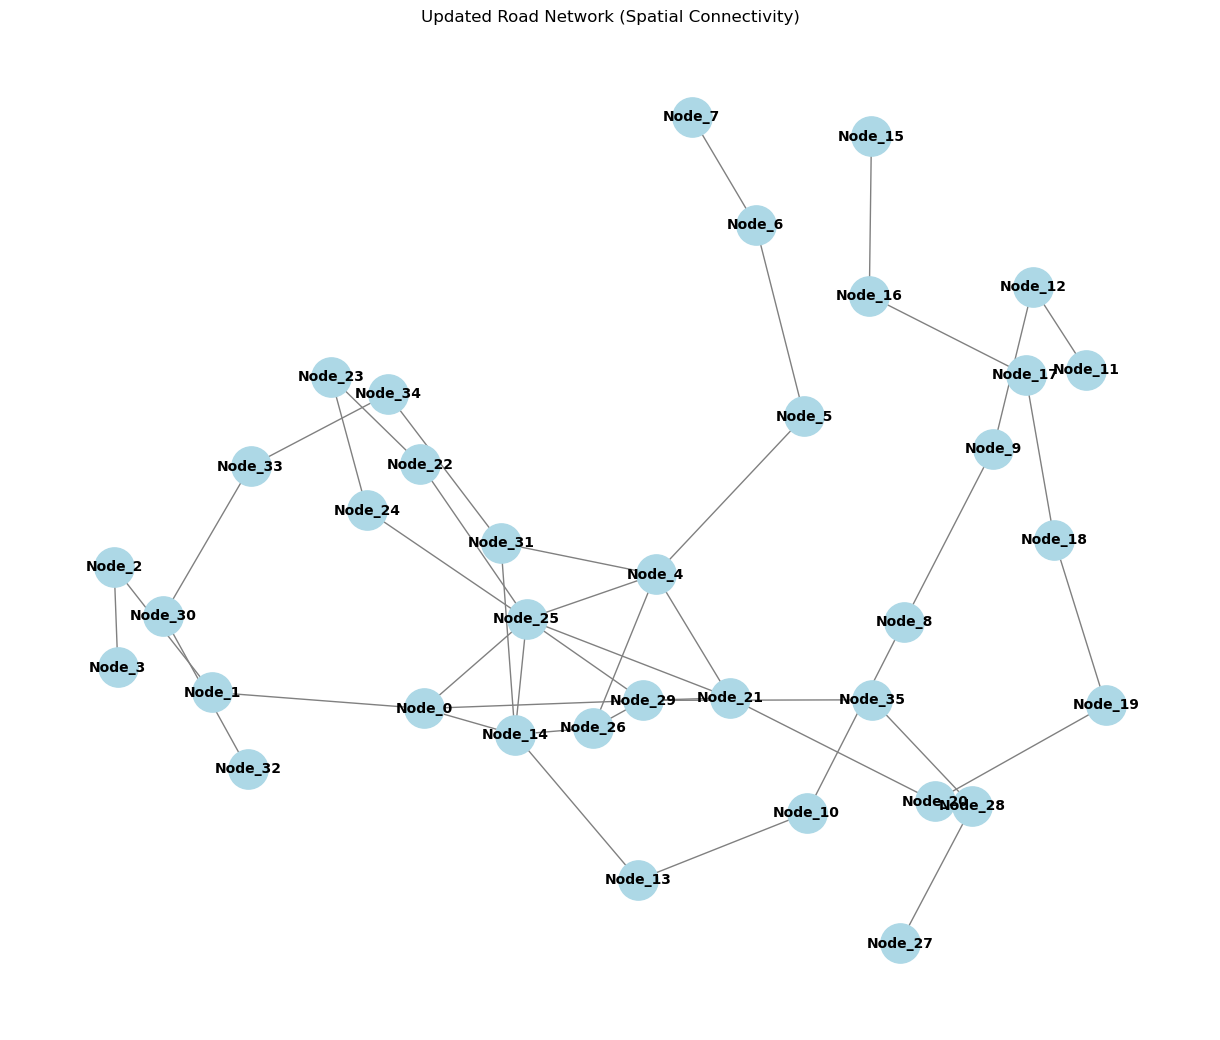

In [17]:
# Plot the updated graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # Increase k for more spacing
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Updated Road Network (Spatial Connectivity)')
plt.show()

In [18]:
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("\n🔎 Top 5 Most Connected Nodes:")
for node, centrality in sorted_degree[:5]:
    print(f"Node {node}: {centrality:.4f}")



🔎 Top 5 Most Connected Nodes:
Node Node_25: 0.2000
Node Node_4: 0.1429
Node Node_14: 0.1429
Node Node_29: 0.1429
Node Node_0: 0.1143


In [19]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\n🚦 Top 5 Most Important Nodes for Traffic Flow:")
for node, centrality in sorted_betweenness[:5]:
    print(f"Node {node}: {centrality:.4f}")



🚦 Top 5 Most Important Nodes for Traffic Flow:
Node Node_14: 0.3695
Node Node_25: 0.3465
Node Node_21: 0.3070
Node Node_4: 0.2661
Node Node_13: 0.2521


In [20]:
clustering_coeff = nx.clustering(G)
avg_clustering = sum(clustering_coeff.values()) / len(clustering_coeff)
print(f"\n🔄 Average Clustering Coefficient: {avg_clustering:.4f}")



🔄 Average Clustering Coefficient: 0.0349


In [21]:
source_node = sorted_degree[0][0]  # Most connected node
target_node = sorted_degree[-1][0]  # Least connected node

shortest_path = nx.shortest_path(G, source=source_node, target=target_node)
print(f"\n🚗 Shortest Path from Node {source_node} to Node {target_node}:")
print(shortest_path)



🚗 Shortest Path from Node Node_25 to Node Node_32:
['Node_25', 'Node_4', 'Node_31', 'Node_34', 'Node_33', 'Node_30', 'Node_32']


In [22]:
density = nx.density(G)
print(f"\n🌎 Road Network Density: {density:.4f}")



🌎 Road Network Density: 0.0683


In [23]:
# Display the column names of the training set
print("Training Set Columns:")
print(Y_train.columns)

Training Set Columns:
Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var1252', 'Var1253', 'Var1254', 'Var1255', 'Var1256', 'Var1257',
       'Var1258', 'Var1259', 'Var1260', 'Var1261'],
      dtype='object', length=1261)


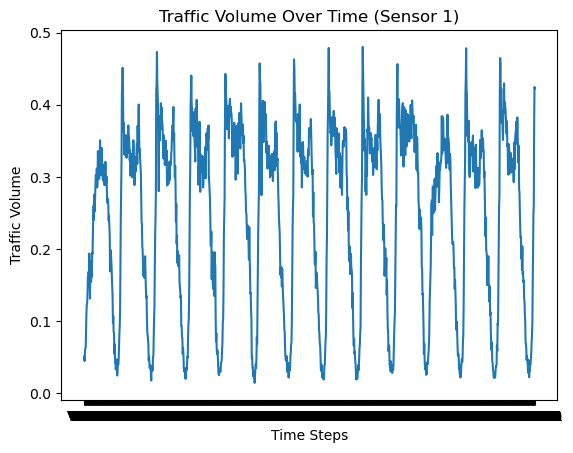

In [24]:
import matplotlib.pyplot as plt

# Plot traffic volume for the first sensor (Var1)
plt.plot(Y_train.iloc[0, :])
plt.title('Traffic Volume Over Time (Sensor 1)')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.show()

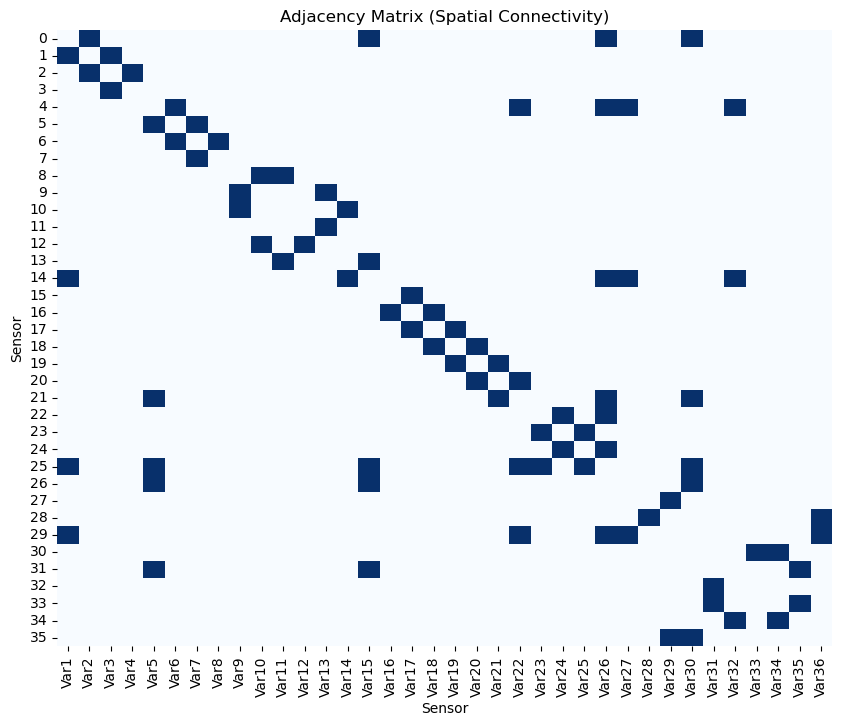

In [25]:
import seaborn as sns

# Plot the adjacency matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(adj_matrix, cmap='Blues', cbar=False)
plt.title('Adjacency Matrix (Spatial Connectivity)')
plt.xlabel('Sensor')
plt.ylabel('Sensor')
plt.show()

In [26]:
import pandas as pd

# Inspect the first few rows of the CSV files
Y_train_sample = pd.read_csv('tra_Y_tr.csv', nrows=5)
Y_test_sample = pd.read_csv('tra_Y_te.csv', nrows=5)

print("Y_train sample:")
print(Y_train_sample)

print("\nY_test sample:")
print(Y_test_sample)

Y_train sample:
       Var1      Var2      Var3      Var4      Var5      Var6      Var7  \
0  0.050911  0.047641  0.044839  0.059785  0.062588  0.063989  0.088277   
1  0.046240  0.049510  0.052312  0.046707  0.057450  0.055582  0.077534   
2  0.050444  0.044372  0.050444  0.050444  0.043438  0.066791  0.069127   
3  0.044839  0.038300  0.051378  0.050444  0.045773  0.048108  0.056983   
4  0.044839  0.053246  0.056516  0.049043  0.041569  0.049977  0.047641   

       Var8      Var9     Var10  ...   Var1252   Var1253   Var1254   Var1255  \
0  0.113498  0.122840  0.125175  ...  0.071462  0.080336  0.098085  0.147595   
1  0.094348  0.097151  0.107426  ...  0.054180  0.081738  0.074731  0.120504   
2  0.070061  0.095750  0.079869  ...  0.044372  0.068660  0.072863  0.104157   
3  0.059785  0.077534  0.077534  ...  0.054647  0.070995  0.073797  0.098085   
4  0.065390  0.061653  0.063055  ...  0.058851  0.053713  0.054647  0.068192   

    Var1256   Var1257   Var1258   Var1259   Var1260 

In [27]:
import pandas as pd

# Load train & test data WITH headers
Y_train = pd.read_csv('tra_Y_tr.csv', header=0)  # header=0 means the first row is the header
Y_test = pd.read_csv('tra_Y_te.csv', header=0)   # header=0 means the first row is the header

# Verify shapes
print(f"✅ Y_train shape: {Y_train.shape}")
print(f"✅ Y_test shape: {Y_test.shape}")

✅ Y_train shape: (36, 1261)
✅ Y_test shape: (36, 840)


In [28]:
# Check column names
print("Y_train columns:", Y_train.columns)
print("Y_test columns:", Y_test.columns)

Y_train columns: Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var1252', 'Var1253', 'Var1254', 'Var1255', 'Var1256', 'Var1257',
       'Var1258', 'Var1259', 'Var1260', 'Var1261'],
      dtype='object', length=1261)
Y_test columns: Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var831', 'Var832', 'Var833', 'Var834', 'Var835', 'Var836', 'Var837',
       'Var838', 'Var839', 'Var840'],
      dtype='object', length=840)


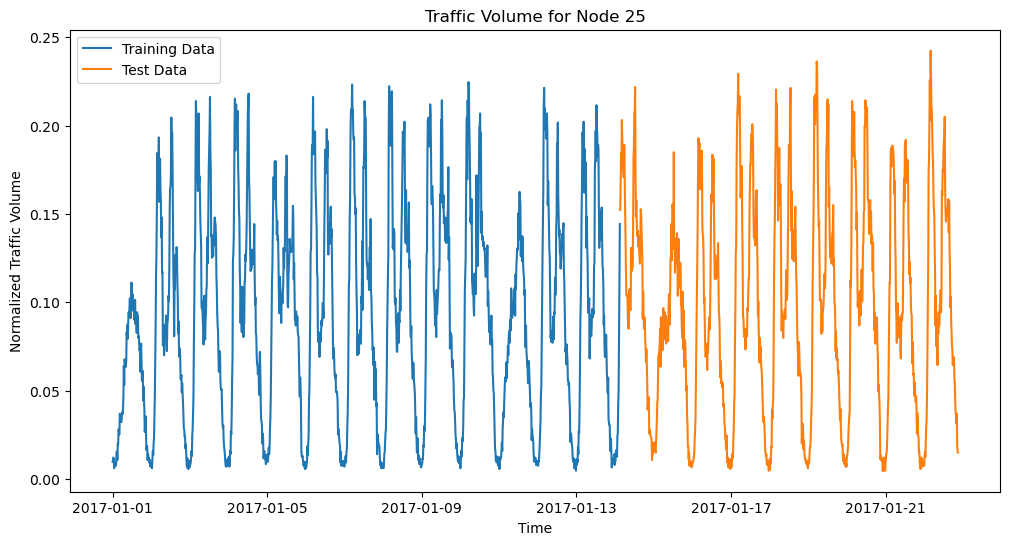

In [29]:
# Correct index for Node 25 (with 0-based indexing)
node_25_index = 24  # Adjusting for 0-based indexing

# Extract time series for Node 25
node_25_train = Y_train.iloc[node_25_index, :].values
node_25_test = Y_test.iloc[node_25_index, :].values

# Create a time index (15-minute intervals)
train_index = pd.date_range(start='2017-01-01', periods=len(node_25_train), freq='15min')
test_index = pd.date_range(start=train_index[-1] + pd.Timedelta(minutes=15), 
                           periods=len(node_25_test), freq='15min')

# Convert to Series for better time series handling
node_25_train_series = pd.Series(node_25_train, index=train_index)
node_25_test_series = pd.Series(node_25_test, index=test_index)

# Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(node_25_train_series, label='Training Data')
plt.plot(node_25_test_series, label='Test Data')
plt.title('Traffic Volume for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.show()

In [30]:
# Create lag features for Node 25
# Convert to DataFrame
node_25_train_df = pd.DataFrame(node_25_train_series)
node_25_train_df.columns = ['traffic_volume']

# Create lag features (previous time steps)
n_lags = 10  # 2.5 hours of historical data (10 * 15 minutes)

for i in range(1, n_lags + 1):
    node_25_train_df[f'lag_{i}'] = node_25_train_df['traffic_volume'].shift(i)

# Drop rows with NaN values
node_25_train_df = node_25_train_df.dropna()

# Prepare features and target for training
X_train_lagged = node_25_train_df.drop('traffic_volume', axis=1)
y_train_lagged = node_25_train_df['traffic_volume']

print(f"Shape of X_train_lagged: {X_train_lagged.shape}")
print(f"Shape of y_train_lagged: {y_train_lagged.shape}")
print("\nFirst 5 rows of lagged features:")
print(X_train_lagged.head())

Shape of X_train_lagged: (1251, 10)
Shape of y_train_lagged: (1251,)

First 5 rows of lagged features:
                        lag_1     lag_2     lag_3     lag_4     lag_5  \
2017-01-01 02:30:00  0.008407  0.007473  0.009341  0.007473  0.007940   
2017-01-01 02:45:00  0.015413  0.008407  0.007473  0.009341  0.007473   
2017-01-01 03:00:00  0.015413  0.015413  0.008407  0.007473  0.009341   
2017-01-01 03:15:00  0.010743  0.015413  0.015413  0.008407  0.007473   
2017-01-01 03:30:00  0.020084  0.010743  0.015413  0.015413  0.008407   

                        lag_6     lag_7     lag_8     lag_9    lag_10  
2017-01-01 02:30:00  0.006072  0.011677  0.012144  0.010276  0.009809  
2017-01-01 02:45:00  0.007940  0.006072  0.011677  0.012144  0.010276  
2017-01-01 03:00:00  0.007473  0.007940  0.006072  0.011677  0.012144  
2017-01-01 03:15:00  0.009341  0.007473  0.007940  0.006072  0.011677  
2017-01-01 03:30:00  0.007473  0.009341  0.007473  0.007940  0.006072  


Moving Average Metrics:
RMSE: 0.0611
MAE: 0.0508
MAPE: 166.75%


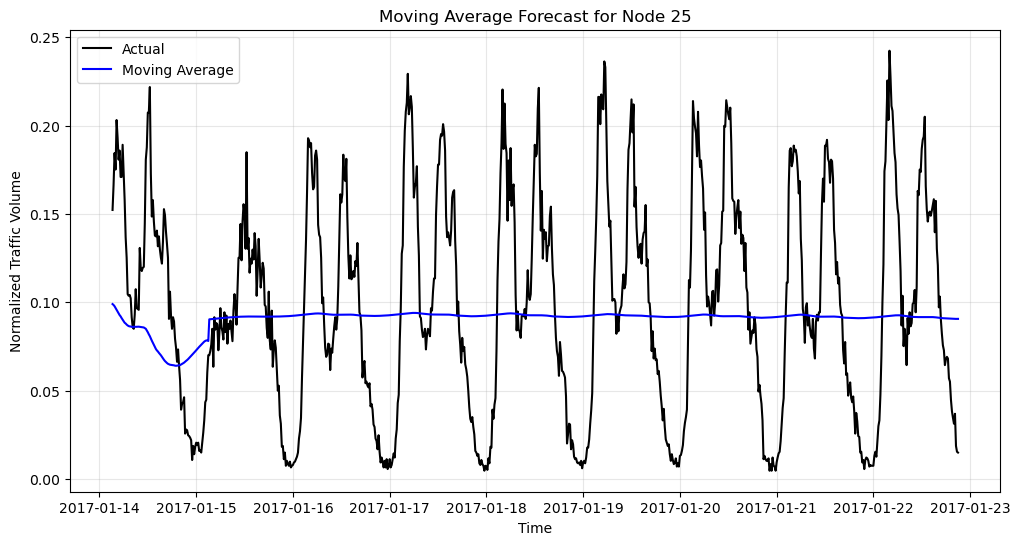

In [31]:
# Import necessary libraries for Moving Average
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Moving Average Model
def moving_average_forecast(series, window, forecast_horizon):
    """
    Generate forecasts using simple moving average
    
    Parameters:
    series - the time series data
    window - the number of past observations to use
    forecast_horizon - the number of future time steps to predict
    """
    forecasts = []
    
    # Generate one-step forecasts for the test period
    for i in range(forecast_horizon):
        # Use the last 'window' observations including predictions
        if i == 0:
            # First forecast uses only the training data
            forecast = np.mean(series[-window:])
        else:
            # Later forecasts include previous predictions
            forecast = np.mean(np.concatenate([
                series[-(window-i):], 
                np.array(forecasts)
            ]))
        forecasts.append(forecast)
    
    return forecasts

# Apply Moving Average to Node 25
# Use a window of 96 to capture daily seasonality (24 hours * 4 observations per hour)
ma_window = 96
ma_forecasts = moving_average_forecast(
    node_25_train_series.values, 
    ma_window, 
    len(node_25_test_series)
)

# Create a DataFrame for test predictions
test_df = pd.DataFrame(index=test_index)
test_df['actual'] = node_25_test_series
test_df['MA_forecast'] = ma_forecasts

# Calculate MA metrics
ma_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['MA_forecast']))
ma_mae = mean_absolute_error(test_df['actual'], test_df['MA_forecast'])
ma_mape = np.mean(np.abs((test_df['actual'] - test_df['MA_forecast']) / test_df['actual'])) * 100

print(f"Moving Average Metrics:")
print(f"RMSE: {ma_rmse:.4f}")
print(f"MAE: {ma_mae:.4f}")
print(f"MAPE: {ma_mape:.2f}%")

# Visualize MA results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['MA_forecast'], label='Moving Average', color='blue')
plt.title('Moving Average Forecast for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Exponential Smoothing Metrics:
RMSE: 0.0429
MAE: 0.0381
MAPE: 107.00%


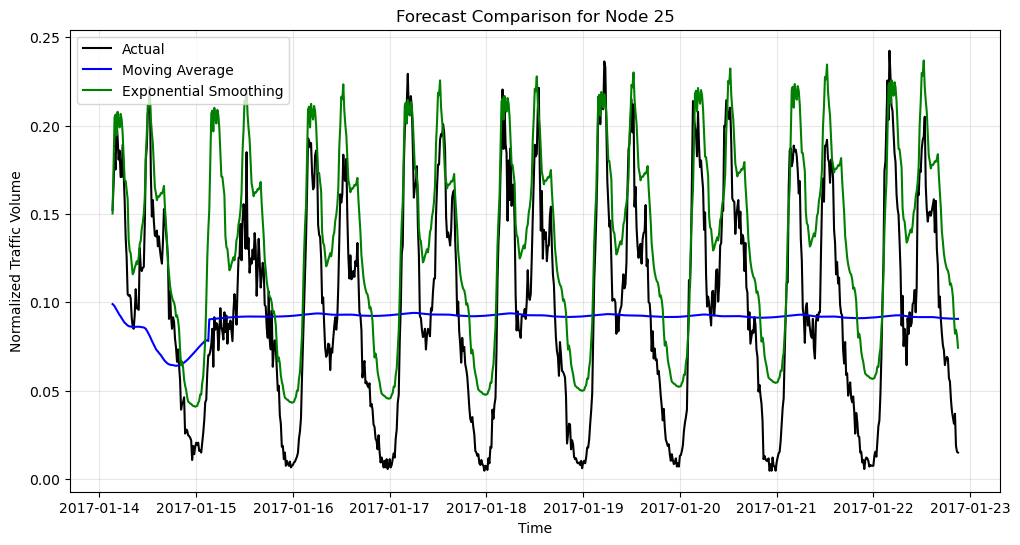

In [32]:
# Import library for Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Exponential Smoothing with seasonal components
def exp_smoothing_forecast(series, forecast_horizon):
    """
    Generate forecasts using Holt-Winters Exponential Smoothing with seasonality
    
    Parameters:
    series - the time series data
    forecast_horizon - the number of future time steps to predict
    """
    # For 15-min data, daily seasonality is 96 periods (24*4)
    model = ExponentialSmoothing(
        series, 
        trend='add',      # Add trend component
        seasonal='add',   # Add seasonal component
        seasonal_periods=96  # Daily seasonality (24 hours * 4 observations per hour)
    )
    
    # Fit the model
    model_fit = model.fit()
    
    # Generate forecasts
    forecasts = model_fit.forecast(forecast_horizon)
    return forecasts

# Apply Exponential Smoothing to Node 25
try:
    es_forecasts = exp_smoothing_forecast(
        node_25_train_series, 
        len(node_25_test_series)
    )
    test_df['ES_forecast'] = es_forecasts
    
    # Calculate ES metrics - fixed the syntax error here
    es_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['ES_forecast']))
    es_mae = mean_absolute_error(test_df['actual'], test_df['ES_forecast'])
    es_mape = np.mean(np.abs((test_df['actual'] - test_df['ES_forecast']) / test_df['actual'])) * 100
    
    print(f"\nExponential Smoothing Metrics:")
    print(f"RMSE: {es_rmse:.4f}")
    print(f"MAE: {es_mae:.4f}")
    print(f"MAPE: {es_mape:.2f}%")
    
    # Visualize ES results alongside MA
    plt.figure(figsize=(12, 6))
    plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
    plt.plot(test_df.index, test_df['MA_forecast'], label='Moving Average', color='blue')
    plt.plot(test_df.index, test_df['ES_forecast'], label='Exponential Smoothing', color='green')
    plt.title('Forecast Comparison for Node 25')
    plt.xlabel('Time')
    plt.ylabel('Normalized Traffic Volume')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"Error in Exponential Smoothing: {e}")
    # If error occurs, we might need to adjust parameters
    print("Trying simpler Exponential Smoothing model...")

Fitting simple ARIMA model...

ARIMA Metrics:
RMSE: 0.1219
MAE: 0.1063
MAPE: 420.58%


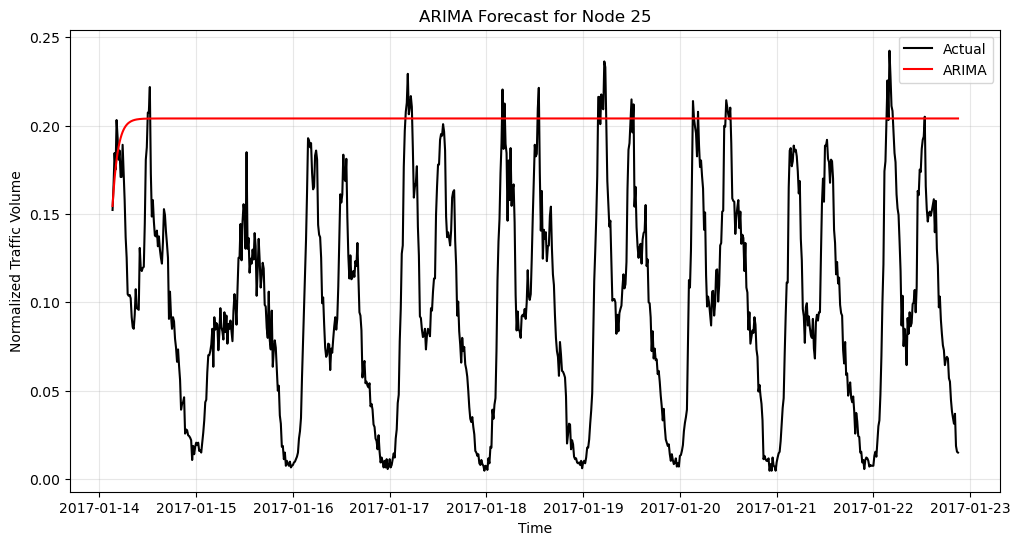

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Recreate the variables from your data
# Correct index for Node 25 (with 0-based indexing)
node_25_index = 24  

# Extract time series for Node 25
node_25_train = Y_train.iloc[node_25_index, :].values
node_25_test = Y_test.iloc[node_25_index, :].values

# Create a time index (15-minute intervals)
train_index = pd.date_range(start='2017-01-01', periods=len(node_25_train), freq='15min')
test_index = pd.date_range(start=train_index[-1] + pd.Timedelta(minutes=15), 
                           periods=len(node_25_test), freq='15min')

# Convert to Series for better time series handling
node_25_train_series = pd.Series(node_25_train, index=train_index)
node_25_test_series = pd.Series(node_25_test, index=test_index)

# Create a DataFrame for test predictions
test_df = pd.DataFrame(index=test_index)
test_df['actual'] = node_25_test_series

# Simple ARIMA model function
def arima_forecast(series, forecast_horizon):
    """Generate forecasts using ARIMA model"""
    # Use a simple ARIMA model
    model = ARIMA(series, order=(1,1,1))
    model_fit = model.fit()
    forecasts = model_fit.forecast(steps=forecast_horizon)
    return forecasts

# Apply ARIMA to Node 25
print("Fitting simple ARIMA model...")
arima_forecasts = arima_forecast(
    node_25_train_series, 
    len(node_25_test_series)
)
test_df['ARIMA_forecast'] = arima_forecasts

# Calculate ARIMA metrics
arima_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['ARIMA_forecast']))
arima_mae = mean_absolute_error(test_df['actual'], test_df['ARIMA_forecast'])
# Add small constant to avoid division by zero
arima_mape = np.mean(np.abs((test_df['actual'] - test_df['ARIMA_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nARIMA Metrics:")
print(f"RMSE: {arima_rmse:.4f}")
print(f"MAE: {arima_mae:.4f}")
print(f"MAPE: {arima_mape:.2f}%")

# Visualize ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['ARIMA_forecast'], label='ARIMA', color='red')
plt.title('ARIMA Forecast for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Applying Seasonal Naive model...

Seasonal Naive Metrics:
RMSE: 0.0234
MAE: 0.0157
MAPE: 21.67%


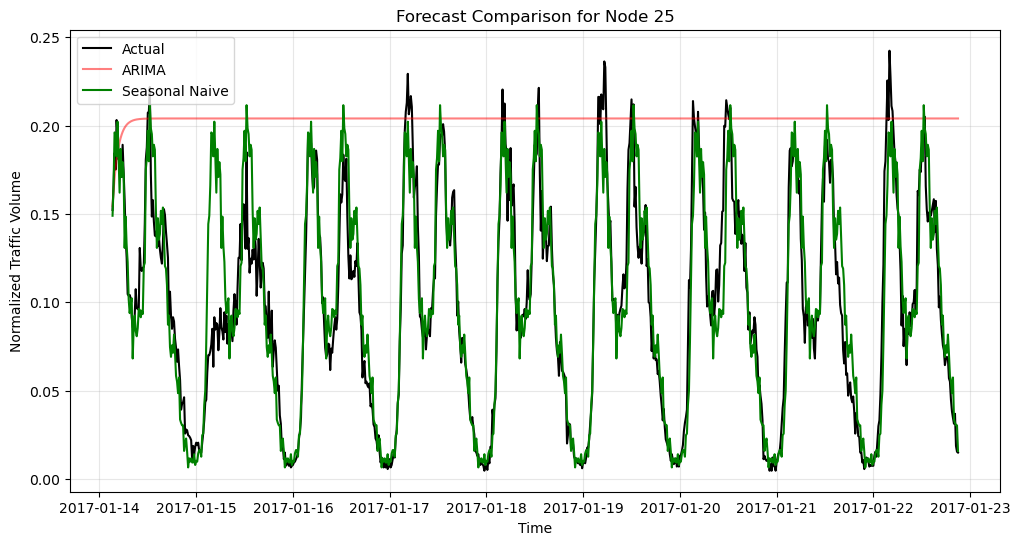

In [34]:
# Seasonal Naive Model (using previous day's values)
def seasonal_naive_forecast(series, forecast_horizon, seasonal_period=96):
    """
    Generate forecasts using previous day's values
    
    Parameters:
    series - the time series data
    forecast_horizon - the number of future time steps to predict
    seasonal_period - number of time steps in one season (96 for daily with 15-min intervals)
    """
    forecasts = []
    
    # For each point in the forecast horizon
    for i in range(forecast_horizon):
        # Find position within the seasonal cycle
        position = i % seasonal_period
        
        # Use the value from the most recent same time of day
        # Get the most recent complete day and use the same time position
        day_offset = (len(series) - seasonal_period + position)
        forecast = series[day_offset]
        forecasts.append(forecast)
    
    return forecasts

# Apply Seasonal Naive to Node 25
print("Applying Seasonal Naive model...")
snaive_forecasts = seasonal_naive_forecast(
    node_25_train_series.values, 
    len(node_25_test_series)
)
test_df['SNaive_forecast'] = snaive_forecasts

# Calculate metrics
snaive_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['SNaive_forecast']))
snaive_mae = mean_absolute_error(test_df['actual'], test_df['SNaive_forecast'])
snaive_mape = np.mean(np.abs((test_df['actual'] - test_df['SNaive_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nSeasonal Naive Metrics:")
print(f"RMSE: {snaive_rmse:.4f}")
print(f"MAE: {snaive_mae:.4f}")
print(f"MAPE: {snaive_mape:.2f}%")

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['ARIMA_forecast'], label='ARIMA', color='red', alpha=0.5)
plt.plot(test_df.index, test_df['SNaive_forecast'], label='Seasonal Naive', color='green')
plt.title('Forecast Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [35]:
# Import necessary libraries for LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    """
    Create sequences for LSTM model
    
    Parameters:
    data - the time series data
    seq_length - number of time steps to use as input features
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Prepare data for LSTM
# We'll use the last 96 time steps (one day) as input features
seq_length = 96

# Create sequences from training data
X_train, y_train = create_sequences(node_25_train_series.values, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
print("Training LSTM model...")
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    verbose=1, 
    validation_split=0.1
)

# Generate predictions iteratively for test data
# First, get the last sequence from training data
last_sequence = node_25_train_series.values[-seq_length:]
lstm_predictions = []

# Make predictions one step at a time
for i in range(len(node_25_test_series)):
    # Reshape the last sequence for prediction
    x_input = last_sequence.reshape(1, seq_length, 1)
    
    # Make prediction
    yhat = model.predict(x_input, verbose=0)[0]
    
    # Store prediction
    lstm_predictions.append(yhat[0])
    
    # Update the sequence by removing the first value and adding the prediction
    last_sequence = np.append(last_sequence[1:], yhat)

# Add LSTM predictions to test DataFrame
test_df['LSTM_forecast'] = lstm_predictions

# Calculate LSTM metrics
lstm_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['LSTM_forecast']))
lstm_mae = mean_absolute_error(test_df['actual'], test_df['LSTM_forecast'])
lstm_mape = np.mean(np.abs((test_df['actual'] - test_df['LSTM_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nLSTM Metrics:")
print(f"RMSE: {lstm_rmse:.4f}")
print(f"MAE: {lstm_mae:.4f}")
print(f"MAPE: {lstm_mape:.2f}%")

# Visualize results comparing all models
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['ARIMA_forecast'], label='ARIMA', color='red', alpha=0.5)
plt.plot(test_df.index, test_df['SNaive_forecast'], label='Seasonal Naive', color='green')
plt.plot(test_df.index, test_df['LSTM_forecast'], label='LSTM', color='blue')
plt.title('Model Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot training history to see if model was properly trained
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

Training SVR model...


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 


SVR Metrics:
RMSE: 0.0625
MAE: 0.0529
MAPE: 207.69%


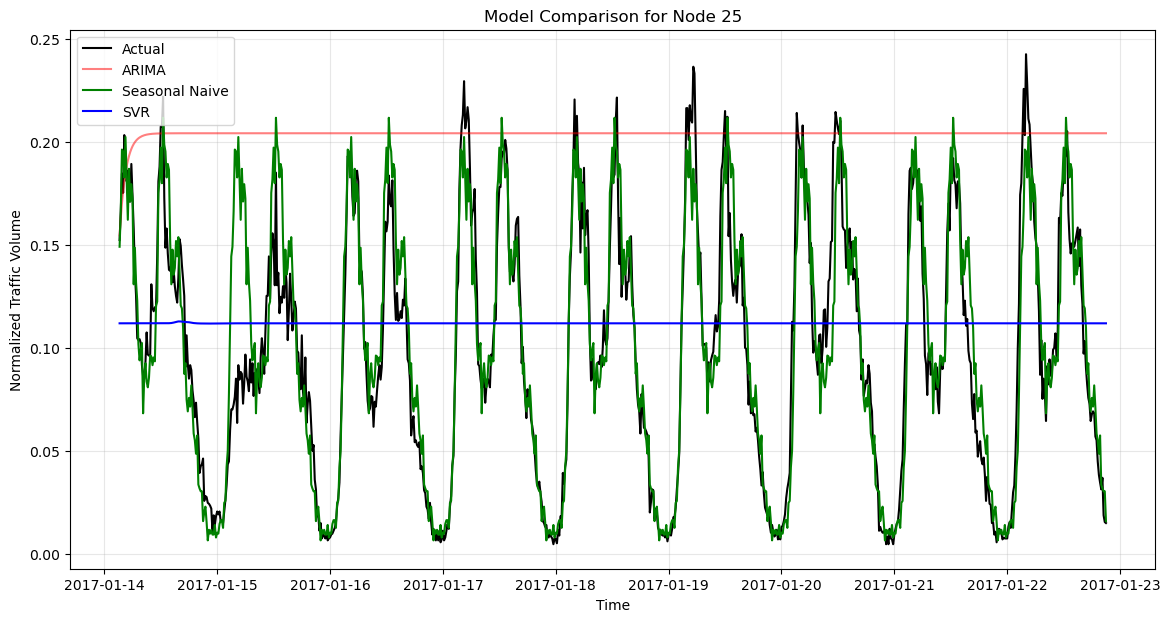

In [36]:
# Import necessary libraries for SVR
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Function to create features using time lags
def create_features(series, n_lags):
    """Create lag features for SVR model"""
    data = pd.DataFrame(series)
    data.columns = ['y']
    
    # Add lag features
    for i in range(1, n_lags + 1):
        data[f'lag_{i}'] = data['y'].shift(i)
    
    # Drop rows with NaN values
    data = data.dropna()
    
    # Split into X (features) and y (target)
    X = data.drop('y', axis=1)
    y = data['y']
    
    return X, y

# Use 96 lags (one day) as features
n_lags = 96

# Create training features
X_train, y_train = create_features(node_25_train_series, n_lags)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train SVR model
print("Training SVR model...")
svr_model = SVR(kernel='rbf', C=10, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

# Prepare for predictions
# First, we need the last n_lags values from training to start predictions
last_known_values = node_25_train_series.values[-n_lags:]
svr_predictions = []

# Make predictions one step at a time
for i in range(len(node_25_test_series)):
    # Create feature vector using last n_lags known values
    X_pred = last_known_values.reshape(1, -1)
    
    # Scale the features
    X_pred_scaled = scaler.transform(X_pred)
    
    # Make prediction
    prediction = svr_model.predict(X_pred_scaled)[0]
    
    # Store prediction
    svr_predictions.append(prediction)
    
    # Update the sequence by removing the first value and adding the prediction
    last_known_values = np.append(last_known_values[1:], prediction)

# Add SVR predictions to test DataFrame
test_df['SVR_forecast'] = svr_predictions

# Calculate SVR metrics
svr_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['SVR_forecast']))
svr_mae = mean_absolute_error(test_df['actual'], test_df['SVR_forecast'])
svr_mape = np.mean(np.abs((test_df['actual'] - test_df['SVR_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nSVR Metrics:")
print(f"RMSE: {svr_rmse:.4f}")
print(f"MAE: {svr_mae:.4f}")
print(f"MAPE: {svr_mape:.2f}%")

# Visualize results comparing all models
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['ARIMA_forecast'], label='ARIMA', color='red', alpha=0.5)
plt.plot(test_df.index, test_df['SNaive_forecast'], label='Seasonal Naive', color='green')
plt.plot(test_df.index, test_df['SVR_forecast'], label='SVR', color='blue')
plt.title('Model Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Training Random Forest model...

Random Forest Metrics:
RMSE: 0.0127
MAE: 0.0093
MAPE: 13.34%

Top 5 important features:
   feature  importance
4    lag_1    0.948510
8  lag_day    0.016918
0     hour    0.009818
7    lag_4    0.009101
5    lag_2    0.005533


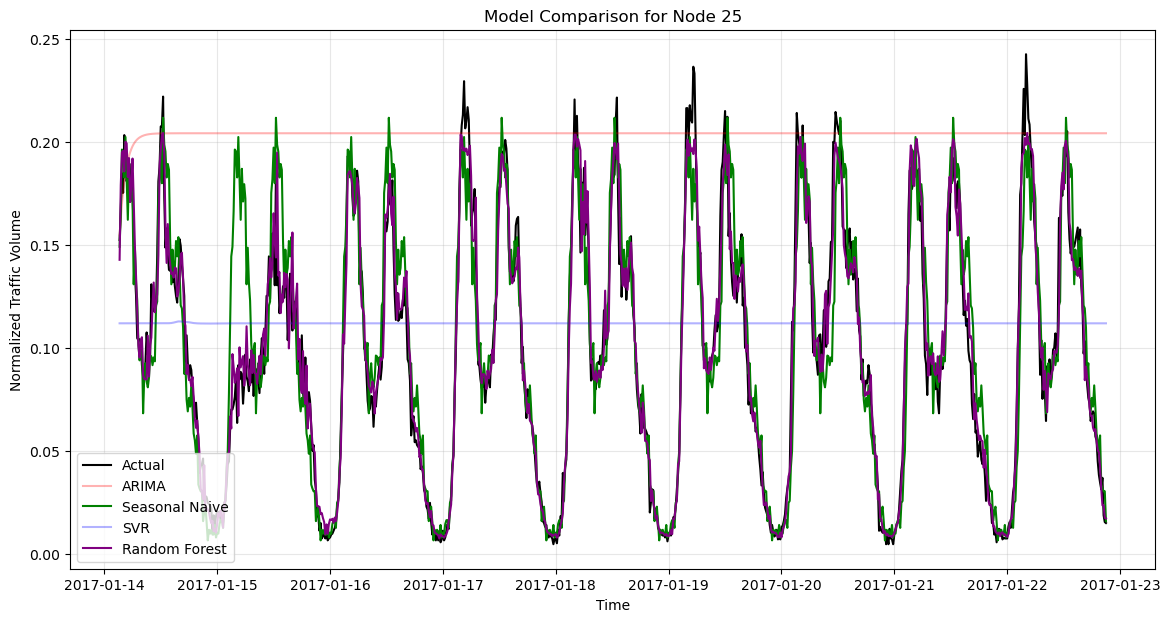

In [37]:
# Import necessary libraries for Random Forest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Add time-based features to improve predictions
def create_advanced_features(data, dates):
    """Create advanced features including time components"""
    # Create a DataFrame with the original series
    df = pd.DataFrame({'traffic': data}, index=dates)
    
    # Add time-based features
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day_of_week'] = df.index.dayofweek
    df['is_weekend'] = df.index.dayofweek >= 5
    
    # Add lag features (previous 4 time steps = 1 hour)
    for i in range(1, 5):
        df[f'lag_{i}'] = df['traffic'].shift(i)
    
    # Add lag from previous day (96 time steps = 24 hours)
    df['lag_day'] = df['traffic'].shift(96)
    
    # Drop rows with NaN values
    df = df.dropna()
    
    return df

# Create advanced features for training data
train_advanced = create_advanced_features(node_25_train_series.values, train_index)

# Split into features and target
X_train_rf = train_advanced.drop('traffic', axis=1)
y_train_rf = train_advanced['traffic']

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Create features for testing period
# First combine train and test to have continuous time series for feature creation
combined_series = pd.concat([node_25_train_series, node_25_test_series])
combined_dates = pd.concat([pd.Series(train_index), pd.Series(test_index)]).values

# Create features for the whole period
combined_features = create_advanced_features(combined_series.values, combined_dates)

# Get only the test period rows (after the training period)
test_features = combined_features.loc[test_index]

# Generate predictions
X_test_rf = test_features.drop('traffic', axis=1)
rf_predictions = rf_model.predict(X_test_rf)

# Add Random Forest predictions to test DataFrame
test_df['RF_forecast'] = rf_predictions

# Calculate Random Forest metrics
rf_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['RF_forecast']))
rf_mae = mean_absolute_error(test_df['actual'], test_df['RF_forecast'])
rf_mape = np.mean(np.abs((test_df['actual'] - test_df['RF_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nRandom Forest Metrics:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"MAPE: {rf_mape:.2f}%")

# Feature importance
feature_importance = pd.DataFrame(
    {'feature': X_train_rf.columns, 'importance': rf_model.feature_importances_}
).sort_values('importance', ascending=False)

print("\nTop 5 important features:")
print(feature_importance.head())

# Visualize results comparing all models
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['ARIMA_forecast'], label='ARIMA', color='red', alpha=0.3)
plt.plot(test_df.index, test_df['SNaive_forecast'], label='Seasonal Naive', color='green')
plt.plot(test_df.index, test_df['SVR_forecast'], label='SVR', color='blue', alpha=0.3)
plt.plot(test_df.index, test_df['RF_forecast'], label='Random Forest', color='purple')
plt.title('Model Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
# Install pykalman
!pip install pykalman

  Using cached pykalman-0.10.1-py2.py3-none-any.whl.metadata (9.5 kB)
  Using cached scikit_base-0.12.0-py3-none-any.whl.metadata (8.5 kB)
Using cached pykalman-0.10.1-py2.py3-none-any.whl (248 kB)
Using cached scikit_base-0.12.0-py3-none-any.whl (141 kB)


Setting up Kalman Filter model...
Training Kalman Filter model...
Generating Kalman Filter predictions...

Kalman Filter Metrics:
RMSE: 0.0155
MAE: 0.0111
MAPE: 15.63%


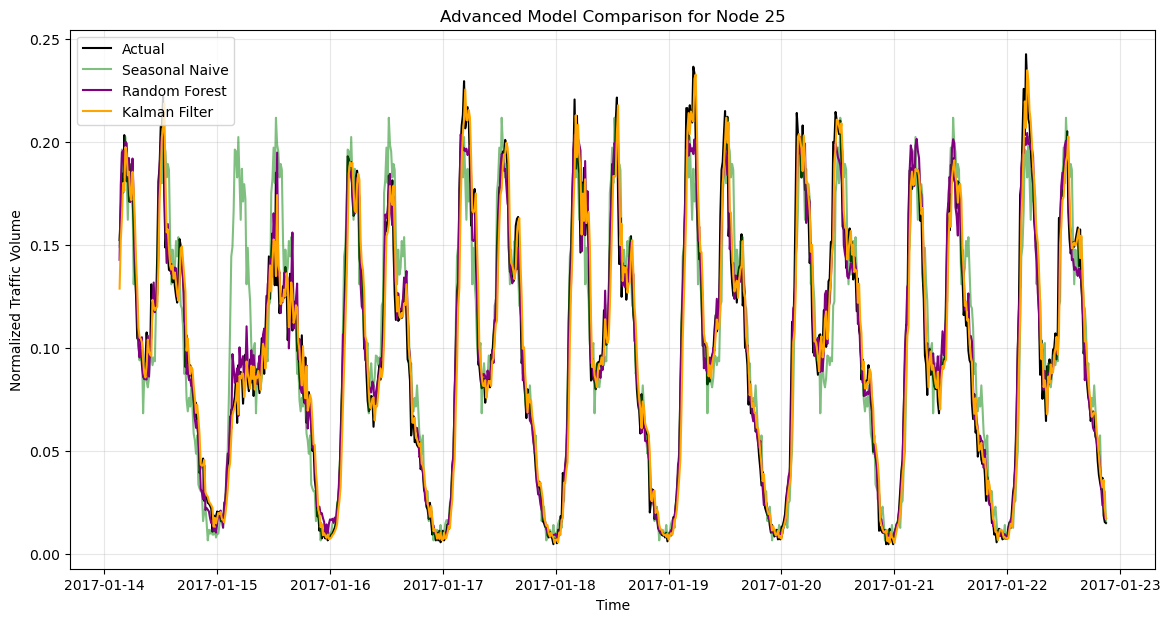

In [39]:
# Import libraries for Kalman Filter
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Prepare data for Kalman Filter
# Reshape for KalmanFilter API - needs [n_timesteps, n_dims]
train_data = node_25_train_series.values.reshape(-1, 1)

# Define the Kalman Filter
# For traffic data, we'll assume a simple model with noise
print("Setting up Kalman Filter model...")
kf = KalmanFilter(
    transition_matrices=np.array([[1]]),  # State transition (simple random walk)
    observation_matrices=np.array([[1]]),  # Observation model
    initial_state_mean=np.array([train_data[0, 0]]),  # Start with first observation
    initial_state_covariance=np.array([[1]]),  # Initial uncertainty
    transition_covariance=np.array([[0.01]]),  # Process noise
    observation_covariance=np.array([[0.1]])  # Observation noise
)

# Fit the Kalman Filter to the training data
print("Training Kalman Filter model...")
kf = kf.em(train_data, n_iter=5)  # Learn parameters using EM algorithm

# Get smoothed states
smoothed_states, _ = kf.smooth(train_data)

# Predict for test period using rolling updates
# First, get the latest state estimate from training
current_state = smoothed_states[-1]
current_cov = np.array([[0.1]])  # Use a reasonable covariance estimate
kf_predictions = []

# For each time step in test period
print("Generating Kalman Filter predictions...")
for i in range(len(node_25_test_series)):
    # Predict next state
    next_state, next_cov = kf.filter_update(
        filtered_state_mean=current_state,
        filtered_state_covariance=current_cov,
        observation=None  # No observation yet
    )
    
    # Store prediction
    kf_predictions.append(next_state[0])
    
    # Update with actual observation for next prediction
    current_state, current_cov = kf.filter_update(
        filtered_state_mean=next_state,
        filtered_state_covariance=next_cov,
        observation=node_25_test_series.iloc[i]
    )

# Add Kalman Filter predictions to test DataFrame
test_df['KF_forecast'] = kf_predictions

# Calculate Kalman Filter metrics
kf_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['KF_forecast']))
kf_mae = mean_absolute_error(test_df['actual'], test_df['KF_forecast'])
kf_mape = np.mean(np.abs((test_df['actual'] - test_df['KF_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nKalman Filter Metrics:")
print(f"RMSE: {kf_rmse:.4f}")
print(f"MAE: {kf_mae:.4f}")
print(f"MAPE: {kf_mape:.2f}%")

# Visualize results comparing the advanced models
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['SNaive_forecast'], label='Seasonal Naive', color='green', alpha=0.5)
plt.plot(test_df.index, test_df['RF_forecast'], label='Random Forest', color='purple')
plt.plot(test_df.index, test_df['KF_forecast'], label='Kalman Filter', color='orange')
plt.title('Advanced Model Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
# Install TensorFlow
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylin

2025-03-17 11:33:54.245006: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-17 11:33:54.246743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 11:33:54.250574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 11:33:54.259778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742211234.276637     298 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742211234.28

Building LSTM model...
Training LSTM model...
Epoch 1/20


2025-03-17 11:33:56.456900: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 9.2473e-04 - val_loss: 8.3589e-04
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 6.9276e-04 - val_loss: 5.7315e-04
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 5.1070e-04 - val_loss: 4.8554e-04
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 5.1165e-04 - val_loss: 4.3439e-04
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 4.3486e-04 - val_loss: 4.0760e-04
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 3.9665e-04 - val_loss: 3.6454e-04
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 4.0127e-04 - val_loss: 3.3180e-04
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 3.7430e-04 - val_loss: 3.1766e-04
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.4244e-04 - val_loss: 2.9371e-04
Ep

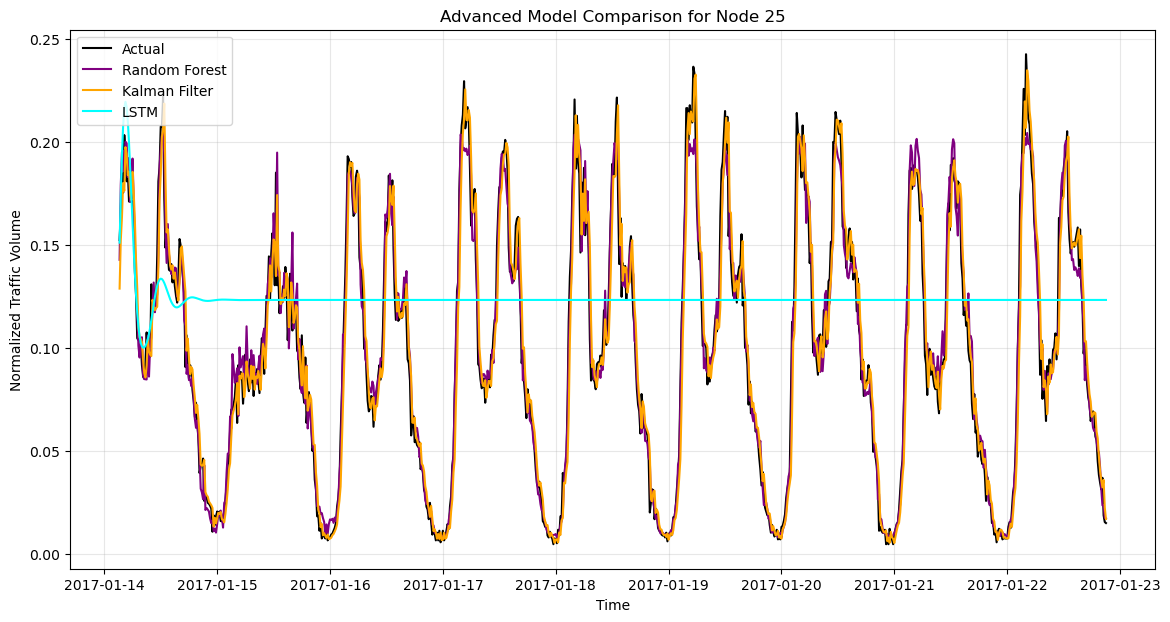

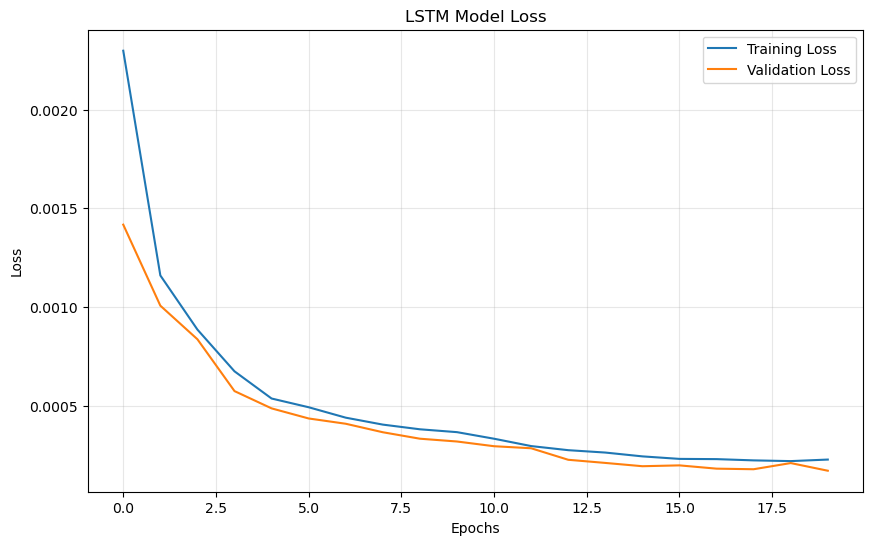

In [41]:
# Import necessary libraries for LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    """
    Create sequences for LSTM model
    
    Parameters:
    data - the time series data
    seq_length - number of time steps to use as input features
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Prepare data for LSTM
# We'll use the last 96 time steps (one day) as input features
seq_length = 96

# Create sequences from training data
X_train, y_train = create_sequences(node_25_train_series.values, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build LSTM model
print("Building LSTM model...")
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
print("Training LSTM model...")
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    verbose=1, 
    validation_split=0.1
)

# Generate predictions iteratively for test data
# First, get the last sequence from training data
last_sequence = node_25_train_series.values[-seq_length:]
lstm_predictions = []

# Make predictions one step at a time
print("Generating LSTM predictions...")
for i in range(len(node_25_test_series)):
    # Reshape the last sequence for prediction
    x_input = last_sequence.reshape(1, seq_length, 1)
    
    # Make prediction
    yhat = model.predict(x_input, verbose=0)[0]
    
    # Store prediction
    lstm_predictions.append(yhat[0])
    
    # Update the sequence by removing the first value and adding the prediction
    last_sequence = np.append(last_sequence[1:], yhat)

# Add LSTM predictions to test DataFrame
test_df['LSTM_forecast'] = lstm_predictions

# Calculate LSTM metrics
lstm_rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df['LSTM_forecast']))
lstm_mae = mean_absolute_error(test_df['actual'], test_df['LSTM_forecast'])
lstm_mape = np.mean(np.abs((test_df['actual'] - test_df['LSTM_forecast']) / (test_df['actual'] + 1e-10))) * 100

print(f"\nLSTM Metrics:")
print(f"RMSE: {lstm_rmse:.4f}")
print(f"MAE: {lstm_mae:.4f}")
print(f"MAPE: {lstm_mape:.2f}%")

# Visualize results comparing all advanced models
plt.figure(figsize=(14, 7))
plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
plt.plot(test_df.index, test_df['RF_forecast'], label='Random Forest', color='purple')
plt.plot(test_df.index, test_df['KF_forecast'], label='Kalman Filter', color='orange')
plt.plot(test_df.index, test_df['LSTM_forecast'], label='LSTM', color='cyan')
plt.title('Advanced Model Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot training history to see if model was properly trained
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


===== Evaluating Models for Node 25 (Highest Centrality) =====
Training Random Forest model...
Training Kalman Filter model...

Model Performance Metrics:
RF:
  RMSE: 0.0127
  MAE: 0.0093
  MAPE: 13.3364
KF:
  RMSE: 0.0155
  MAE: 0.0111
  MAPE: 15.6325


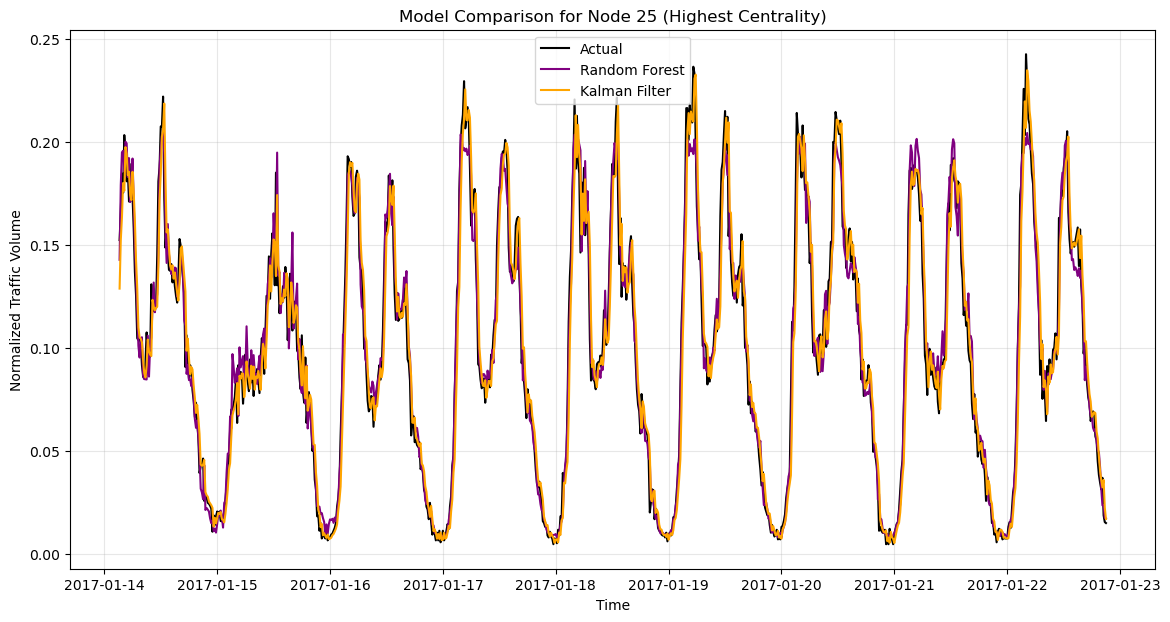


===== Evaluating Models for Node 3 (High Centrality) =====
Training Random Forest model...
Training Kalman Filter model...

Model Performance Metrics:
RF:
  RMSE: 0.0255
  MAE: 0.0194
  MAPE: 12.8720
KF:
  RMSE: 0.0287
  MAE: 0.0212
  MAPE: 12.4802


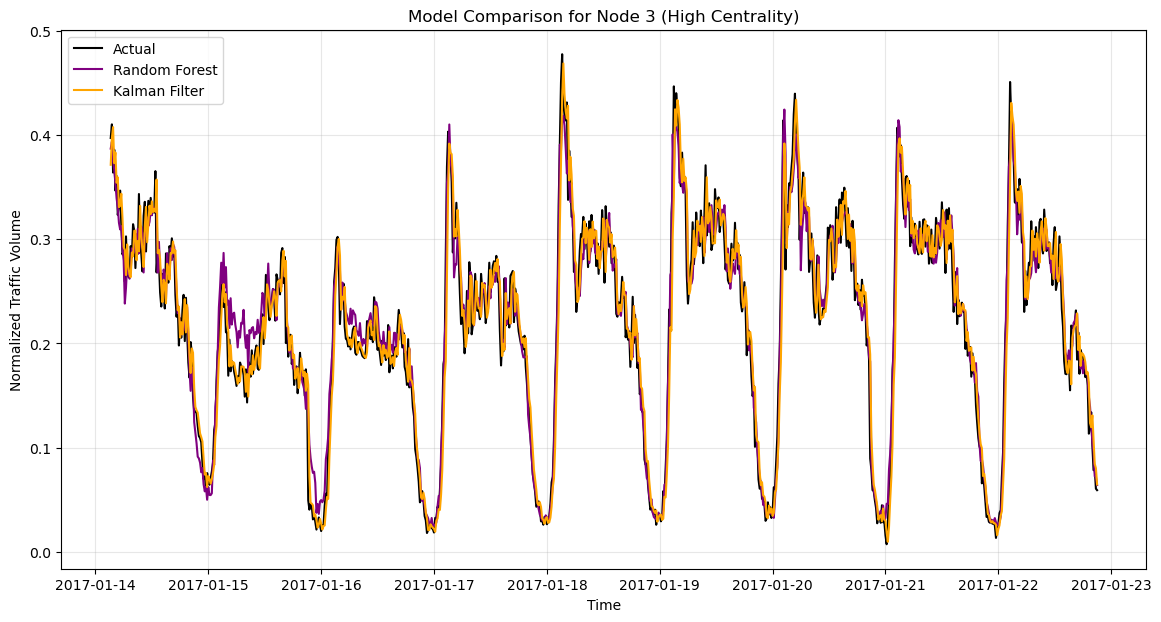


===== Evaluating Models for Node 21 (High Centrality) =====
Training Random Forest model...
Training Kalman Filter model...

Model Performance Metrics:
RF:
  RMSE: 0.0398
  MAE: 0.0275
  MAPE: 8.1584
KF:
  RMSE: 0.0444
  MAE: 0.0316
  MAPE: 9.5465


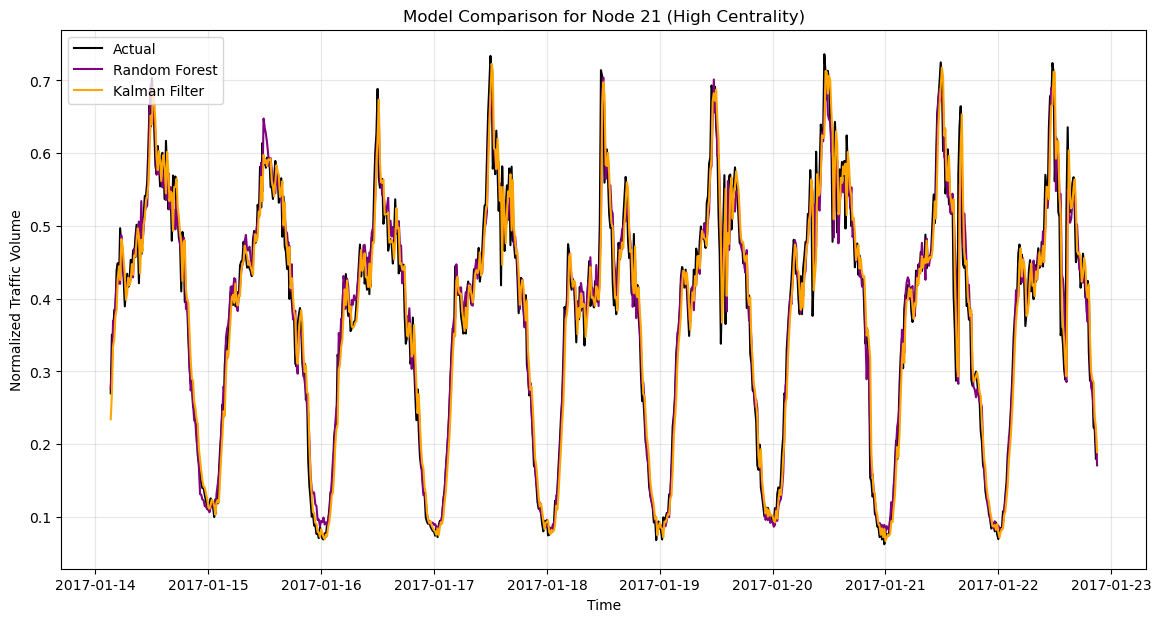

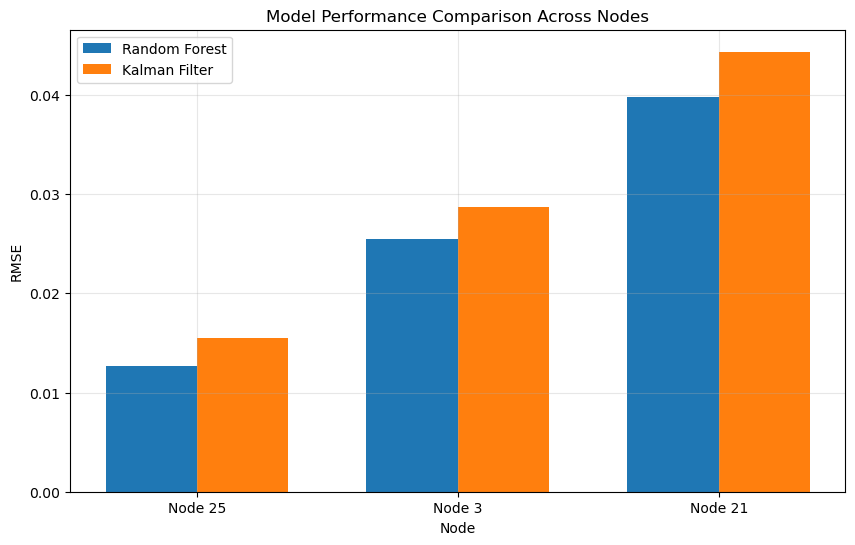

In [42]:
# Define a function to evaluate models on a specific node
def evaluate_models_on_node(node_index, node_name):
    """
    Apply Random Forest and Kalman Filter models to a specific node
    
    Parameters:
    node_index - the index of the node in Y_train/Y_test
    node_name - name to use in plots and output
    """
    print(f"\n===== Evaluating Models for {node_name} =====")
    
    # Extract time series for the specified node
    node_train = Y_train.iloc[node_index, :].values
    node_test = Y_test.iloc[node_index, :].values
    
    # Create time index
    train_index = pd.date_range(start='2017-01-01', periods=len(node_train), freq='15min')
    test_index = pd.date_range(start=train_index[-1] + pd.Timedelta(minutes=15), 
                              periods=len(node_test), freq='15min')
    
    # Convert to Series
    node_train_series = pd.Series(node_train, index=train_index)
    node_test_series = pd.Series(node_test, index=test_index)
    
    # Create DataFrame for test predictions
    test_df = pd.DataFrame(index=test_index)
    test_df['actual'] = node_test_series
    
    # Add time-based features for Random Forest
    def create_advanced_features(data, dates):
        """Create advanced features including time components"""
        # Create a DataFrame with the original series
        df = pd.DataFrame({'traffic': data}, index=dates)
        
        # Add time-based features
        df['hour'] = df.index.hour
        df['minute'] = df.index.minute
        df['day_of_week'] = df.index.dayofweek
        df['is_weekend'] = df.index.dayofweek >= 5
        
        # Add lag features (previous 4 time steps = 1 hour)
        for i in range(1, 5):
            df[f'lag_{i}'] = df['traffic'].shift(i)
        
        # Add lag from previous day (96 time steps = 24 hours)
        df['lag_day'] = df['traffic'].shift(96)
        
        # Drop rows with NaN values
        df = df.dropna()
        
        return df
    
    # 1. Random Forest model
    print("Training Random Forest model...")
    # Create advanced features for training data
    train_advanced = create_advanced_features(node_train_series.values, train_index)
    
    # Split into features and target
    X_train_rf = train_advanced.drop('traffic', axis=1)
    y_train_rf = train_advanced['traffic']
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_rf, y_train_rf)
    
    # Create features for testing period
    combined_series = pd.concat([node_train_series, node_test_series])
    combined_dates = pd.concat([pd.Series(train_index), pd.Series(test_index)]).values
    
    # Create features for the whole period
    combined_features = create_advanced_features(combined_series.values, combined_dates)
    
    # Get only the test period rows
    test_features = combined_features.loc[test_index]
    
    # Generate predictions
    X_test_rf = test_features.drop('traffic', axis=1)
    rf_predictions = rf_model.predict(X_test_rf)
    
    # Add Random Forest predictions to test DataFrame
    test_df['RF_forecast'] = rf_predictions
    
    # 2. Kalman Filter model
    print("Training Kalman Filter model...")
    # Prepare data - reshape for KalmanFilter API
    train_data = node_train_series.values.reshape(-1, 1)
    
    # Define the Kalman Filter
    kf = KalmanFilter(
        transition_matrices=np.array([[1]]),
        observation_matrices=np.array([[1]]),
        initial_state_mean=np.array([train_data[0, 0]]),
        initial_state_covariance=np.array([[1]]),
        transition_covariance=np.array([[0.01]]),
        observation_covariance=np.array([[0.1]])
    )
    
    # Fit the Kalman Filter to the training data
    kf = kf.em(train_data, n_iter=5)
    
    # Get smoothed states
    smoothed_states, _ = kf.smooth(train_data)
    
    # Predict for test period using rolling updates
    current_state = smoothed_states[-1]
    current_cov = np.array([[0.1]])
    kf_predictions = []
    
    # For each time step in test period
    for i in range(len(node_test_series)):
        # Predict next state
        next_state, next_cov = kf.filter_update(
            filtered_state_mean=current_state,
            filtered_state_covariance=current_cov,
            observation=None
        )
        
        # Store prediction
        kf_predictions.append(next_state[0])
        
        # Update with actual observation for next prediction
        current_state, current_cov = kf.filter_update(
            filtered_state_mean=next_state,
            filtered_state_covariance=next_cov,
            observation=node_test_series.iloc[i]
        )
    
    # Add Kalman Filter predictions to test DataFrame
    test_df['KF_forecast'] = kf_predictions
    
    # Calculate metrics for both models
    models = ['RF_forecast', 'KF_forecast']
    metrics = {}
    
    for model in models:
        rmse = np.sqrt(mean_squared_error(test_df['actual'], test_df[model]))
        mae = mean_absolute_error(test_df['actual'], test_df[model])
        mape = np.mean(np.abs((test_df['actual'] - test_df[model]) / (test_df['actual'] + 1e-10))) * 100
        
        metrics[model] = {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        }
    
    # Display metrics
    print("\nModel Performance Metrics:")
    for model, model_metrics in metrics.items():
        print(f"{model.split('_')[0]}:")
        for metric, value in model_metrics.items():
            print(f"  {metric}: {value:.4f}")
    
    # Visualize results
    plt.figure(figsize=(14, 7))
    plt.plot(test_df.index, test_df['actual'], label='Actual', color='black')
    plt.plot(test_df.index, test_df['RF_forecast'], label='Random Forest', color='purple')
    plt.plot(test_df.index, test_df['KF_forecast'], label='Kalman Filter', color='orange')
    plt.title(f'Model Comparison for {node_name}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Traffic Volume')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return metrics

# Evaluate models on multiple nodes
# Node 25 (highest centrality)
node_25_metrics = evaluate_models_on_node(24, "Node 25 (Highest Centrality)")

# Node 3 (high centrality)
node_3_metrics = evaluate_models_on_node(2, "Node 3 (High Centrality)")

# Node 21 (high centrality)
node_21_metrics = evaluate_models_on_node(20, "Node 21 (High Centrality)")

# Compare performance across nodes
nodes = ["Node 25", "Node 3", "Node 21"]
rf_rmse = [node_25_metrics['RF_forecast']['RMSE'], 
           node_3_metrics['RF_forecast']['RMSE'], 
           node_21_metrics['RF_forecast']['RMSE']]
kf_rmse = [node_25_metrics['KF_forecast']['RMSE'], 
           node_3_metrics['KF_forecast']['RMSE'], 
           node_21_metrics['KF_forecast']['RMSE']]

# Plot RMSE comparison across nodes
plt.figure(figsize=(10, 6))
x = np.arange(len(nodes))
width = 0.35
plt.bar(x - width/2, rf_rmse, width, label='Random Forest')
plt.bar(x + width/2, kf_rmse, width, label='Kalman Filter')
plt.xlabel('Node')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison Across Nodes')
plt.xticks(x, nodes)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
# Print the names of all variables in the current namespace
for var_name in dir():
    if 'adj' in var_name.lower() or 'mat' in var_name.lower():
        print(f"Possible adjacency matrix: {var_name}")
        try:
            var_shape = eval(f"{var_name}.shape")
            print(f"  Shape: {var_shape}")
        except:
            pass

Possible adjacency matrix: _jupyterlab_variableinspector_getmatrixcontent
Possible adjacency matrix: _jupyterlab_variableinspector_is_matrix
Possible adjacency matrix: adj_matrix
  Shape: (36, 36)
Possible adjacency matrix: adj_matrix_fixed
  Shape: (36, 36)
Possible adjacency matrix: adj_matrix_np
  Shape: (36, 36)


In [55]:
# First, let's identify neighbors of Node 25 using the adjacency matrix
def get_connected_nodes(adjacency_matrix, source_node, n_neighbors=3):
    """
    Get the most strongly connected neighbors of a source node
    """
    # Get connection strengths from adjacency matrix for the source node
    connections = adjacency_matrix.iloc[source_node, :]
    
    # Find indices of connected nodes (where value > 0)
    connected_indices = np.where(connections > 0)[0].tolist()
    
    # If there are too many connected nodes, limit to n_neighbors
    if len(connected_indices) > n_neighbors:
        # Get connection values for connected indices
        connection_values = [connections.iloc[idx] for idx in connected_indices]
        # Sort by connection strength and take top n_neighbors
        sorted_indices = [x for _, x in sorted(zip(connection_values, connected_indices), reverse=True)]
        connected_indices = sorted_indices[:n_neighbors]
    
    # Return source node and connected nodes as integer indices
    return [source_node] + connected_indices

# Set the source node and get connected nodes
source_node_index = 24  # Node 25 (0-indexed)
nodes_to_use = get_connected_nodes(adj_matrix, source_node_index, n_neighbors=3)
# Now convert to actual node names (1-indexed for display)
node_names = [f"Node_{i+1}" for i in nodes_to_use]

print(f"Selected nodes for VAR model: {node_names}")

Selected nodes for VAR model: ['Node_25', 'Node_24', 'Node_26']


In [45]:
# 1. Start by checking the shape of your original data
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

# 2. Extract data for the three nodes we're interested in
nodes_to_use = [24, 23, 25]  # Indices for Nodes 25, 24, 26 (0-indexed)
node_names = [f"Node_{i+1}" for i in nodes_to_use]

# 3. Create properly formatted DataFrames
# Each row is a time point, each column is a different node
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for i, node_idx in enumerate(nodes_to_use):
    node_name = node_names[i]
    train_data[node_name] = Y_train.iloc[node_idx, :]
    test_data[node_name] = Y_test.iloc[node_idx, :]

# 4. Create time indices with correct lengths
train_index = pd.date_range(start='2017-01-01', periods=train_data.shape[0], freq='15min')
test_index = pd.date_range(start=train_index[-1] + pd.Timedelta(minutes=15), 
                           periods=test_data.shape[0], freq='15min')

# 5. Set the indices correctly
train_data.index = train_index
test_data.index = test_index

print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")

# 6. Now create your enhanced multivariate model
train_multivar = pd.DataFrame({
    'traffic': train_data['Node_25'],
    'hour': train_index.hour,
    'day_of_week': train_index.dayofweek,
    'is_weekend': train_index.dayofweek >= 5,
    'month': train_index.month,
    'day': train_index.day,
    'is_rush_hour_morning': ((train_index.hour >= 7) & (train_index.hour <= 9)),
    'is_rush_hour_evening': ((train_index.hour >= 16) & (train_index.hour <= 18))
})

test_multivar = pd.DataFrame({
    'traffic': test_data['Node_25'],
    'hour': test_index.hour,
    'day_of_week': test_index.dayofweek,
    'is_weekend': test_index.dayofweek >= 5,
    'month': test_index.month,
    'day': test_index.day,
    'is_rush_hour_morning': ((test_index.hour >= 7) & (test_index.hour <= 9)),
    'is_rush_hour_evening': ((test_index.hour >= 16) & (test_index.hour <= 18))
})

# 7. Add traffic from connected nodes
train_multivar['Node_24_traffic'] = train_data['Node_24']
train_multivar['Node_26_traffic'] = train_data['Node_26']
test_multivar['Node_24_traffic'] = test_data['Node_24']
test_multivar['Node_26_traffic'] = test_data['Node_26']

# 8. Add lag features for target node
for i in range(1, 13):  # Add 12 lagged traffic values
    train_multivar[f'traffic_lag_{i}'] = train_multivar['traffic'].shift(i)
    test_multivar[f'traffic_lag_{i}'] = test_multivar['traffic'].shift(i)

# 9. Add lag features for connected nodes
for node in ['Node_24_traffic', 'Node_26_traffic']:
    for i in range(1, 5):  # Add 4 lagged values for connected nodes
        train_multivar[f'{node}_lag_{i}'] = train_multivar[node].shift(i)
        test_multivar[f'{node}_lag_{i}'] = test_multivar[node].shift(i)

# 10. Add lag from previous day (96 time steps = 24 hours)
train_multivar['traffic_lag_day'] = train_multivar['traffic'].shift(96)
test_multivar['traffic_lag_day'] = test_multivar['traffic'].shift(96)

# 11. Drop rows with NaN values
train_multivar = train_multivar.dropna()
test_multivar = test_multivar.dropna()

print(f"train_multivar shape after adding features: {train_multivar.shape}")
print(f"test_multivar shape after adding features: {test_multivar.shape}")

# 12. Prepare features and target for RF model
X_train_multivar = train_multivar.drop('traffic', axis=1)
y_train_multivar = train_multivar['traffic']
X_test_multivar = test_multivar.drop('traffic', axis=1)
y_test_multivar = test_multivar['traffic']

# 13. Train Random Forest with the multivariate data
print("Training Enhanced Multivariate Random Forest model...")
from sklearn.ensemble import RandomForestRegressor
rf_multivar = RandomForestRegressor(n_estimators=100, random_state=42)
rf_multivar.fit(X_train_multivar, y_train_multivar)

# 14. Make predictions
multivar_predictions = rf_multivar.predict(X_test_multivar)

# 15. Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
multivar_rmse = np.sqrt(mean_squared_error(y_test_multivar, multivar_predictions))
multivar_mae = mean_absolute_error(y_test_multivar, multivar_predictions)
multivar_mape = np.mean(np.abs((y_test_multivar - multivar_predictions) / (y_test_multivar + 1e-10))) * 100

print(f"\nEnhanced Multivariate RF Metrics:")
print(f"RMSE: {multivar_rmse:.4f}")
print(f"MAE: {multivar_mae:.4f}")
print(f"MAPE: {multivar_mape:.2f}%")

Y_train shape: (36, 1261)
Y_test shape: (36, 840)
train_data shape: (1261, 3)
test_data shape: (840, 3)
train_multivar shape after adding features: (1165, 31)
test_multivar shape after adding features: (744, 31)
Training Enhanced Multivariate Random Forest model...

Enhanced Multivariate RF Metrics:
RMSE: 0.0100
MAE: 0.0073
MAPE: 10.04%


Fitting VAR model...
Selecting optimal lag order...
Selected VAR order: 24

VAR Model Metrics:
Node_25:
  RMSE: 0.0593
  MAE: 0.0495
  MAPE: 167.6940
Node_24:
  RMSE: 0.0921
  MAE: 0.0781
  MAPE: 117.1666
Node_26:
  RMSE: 0.2543
  MAE: 0.2171
  MAPE: 115.7160

Model Comparison for Node 25:
VAR:
  RMSE: 0.0593
  MAE: 0.0495
  MAPE: 167.69%
RF:
  RMSE: 0.0127
  MAE: 0.0093
  MAPE: 13.34%
KF:
  RMSE: 0.0155
  MAE: 0.0111
  MAPE: 15.63%


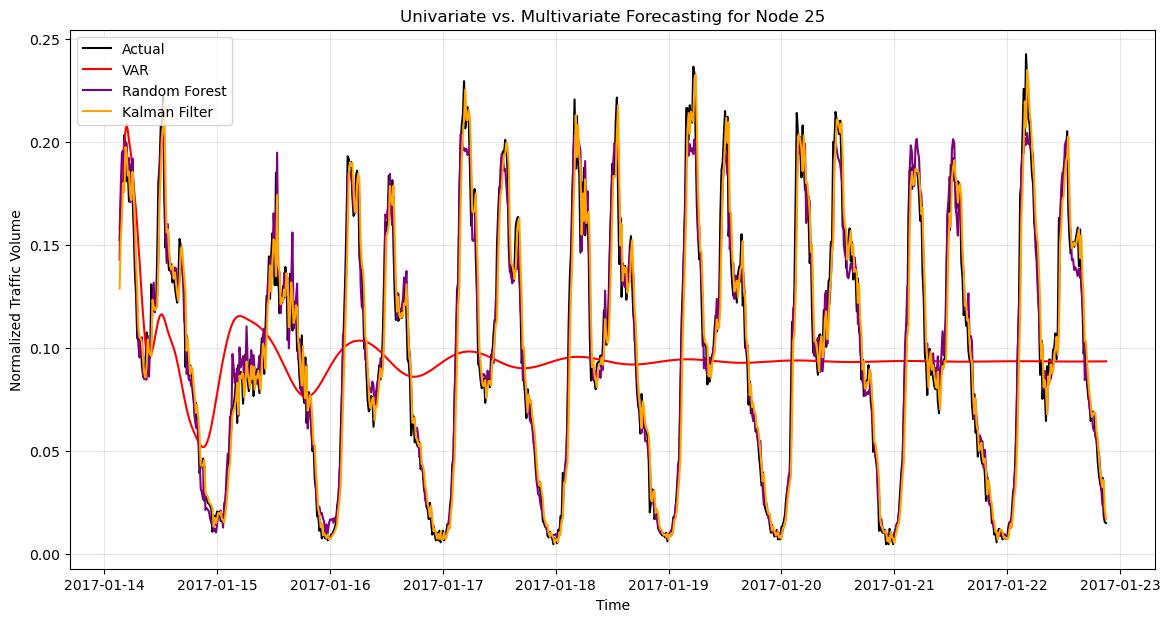

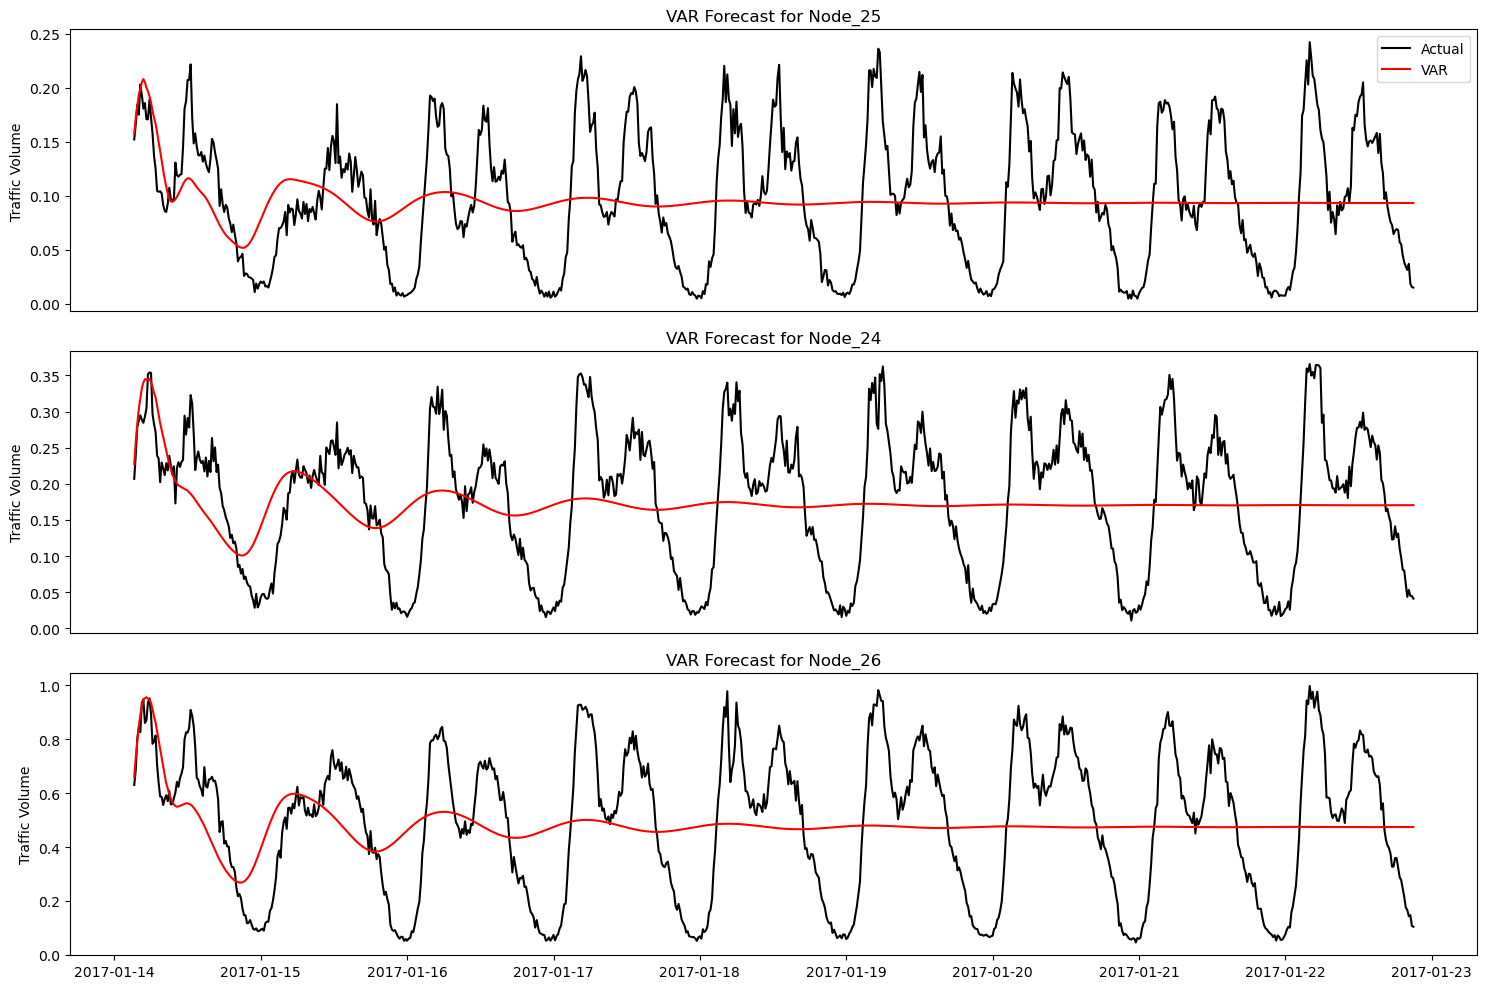

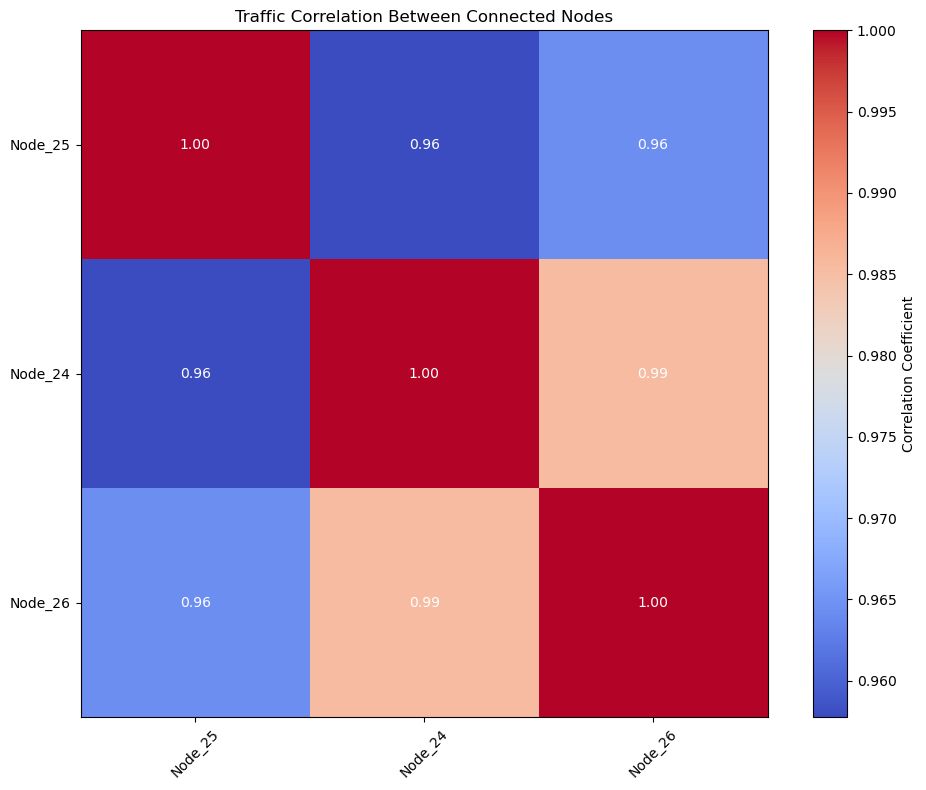

In [46]:
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Extract time series for selected nodes
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for i, node_idx in enumerate(nodes_to_use):
    node_name = node_names[i]
    train_data[node_name] = Y_train.iloc[node_idx, :]
    test_data[node_name] = Y_test.iloc[node_idx, :]

# Create time index
train_index = pd.date_range(start='2017-01-01', periods=Y_train.shape[1], freq='15min')
test_index = pd.date_range(start=train_index[-1] + pd.Timedelta(minutes=15), 
                         periods=Y_test.shape[1], freq='15min')

# Set the index for the DataFrames correctly - DO NOT TRANSPOSE
train_data.index = train_index
test_data.index = test_index

# Fit VAR model
print("Fitting VAR model...")
var_model = VAR(train_data)

# Select order of VAR model based on AIC
print("Selecting optimal lag order...")
max_lags = min(24, len(train_data) // 5)  # Limit max lags to avoid overfitting
order = var_model.select_order(maxlags=max_lags)
print(f"Selected VAR order: {order.selected_orders['aic']}")

# Fit VAR model with selected order
var_fit = var_model.fit(order.selected_orders['aic'])

# Generate forecasts
n_forecasts = len(test_data)
var_forecasts = var_fit.forecast(train_data.values, steps=n_forecasts)

# Convert forecasts to DataFrame
forecast_df = pd.DataFrame(var_forecasts, index=test_index, columns=train_data.columns)

# Evaluate forecasts for each node
var_metrics = {}
for node in node_names:
    rmse = np.sqrt(mean_squared_error(test_data[node], forecast_df[node]))
    mae = mean_absolute_error(test_data[node], forecast_df[node])
    mape = np.mean(np.abs((test_data[node] - forecast_df[node]) / (test_data[node] + 1e-10))) * 100
    
    var_metrics[node] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

# Display metrics
print("\nVAR Model Metrics:")
for node, metrics in var_metrics.items():
    print(f"{node}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
        
# Create comparison with univariate models for Node 25
node25_name = 'Node_25'  # First node should be Node 25
comparison_df = pd.DataFrame({
    'Actual': test_data[node25_name],
    'VAR': forecast_df[node25_name]
})

# Add RF and KF predictions if they exist in test_df
if 'RF_forecast' in test_df.columns and 'KF_forecast' in test_df.columns:
    comparison_df['RF'] = test_df['RF_forecast']
    comparison_df['KF'] = test_df['KF_forecast']
    models = ['VAR', 'RF', 'KF']
else:
    models = ['VAR']

# Calculate metrics for each model on Node 25
print("\nModel Comparison for Node 25:")
for model in models:
    rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df[model]))
    mae = mean_absolute_error(comparison_df['Actual'], comparison_df[model])
    mape = np.mean(np.abs((comparison_df['Actual'] - comparison_df[model]) / (comparison_df['Actual'] + 1e-10))) * 100
    
    print(f"{model}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MAPE: {mape:.2f}%")

# Visualize the multivariate forecasts for Node 25
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', color='black')
plt.plot(comparison_df.index, comparison_df['VAR'], label='VAR', color='red')

if 'RF' in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df['RF'], label='Random Forest', color='purple')
if 'KF' in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df['KF'], label='Kalman Filter', color='orange')

plt.title('Univariate vs. Multivariate Forecasting for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize forecasts for all selected nodes
plt.figure(figsize=(15, 10))
for i, node in enumerate(node_names):
    plt.subplot(len(node_names), 1, i+1)
    plt.plot(test_data.index, test_data[node], label='Actual', color='black')
    plt.plot(forecast_df.index, forecast_df[node], label='VAR', color='red')
    plt.title(f'VAR Forecast for {node}')
    plt.ylabel('Traffic Volume')
    if i == 0:
        plt.legend()
    if i < len(node_names) - 1:
        plt.xticks([])

plt.tight_layout()
plt.show()

# Create correlation heatmap between nodes
plt.figure(figsize=(10, 8))
corr = train_data.corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(node_names)), node_names, rotation=45)
plt.yticks(range(len(node_names)), node_names)
plt.title('Traffic Correlation Between Connected Nodes')
for i in range(len(node_names)):
    for j in range(len(node_names)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                 ha='center', va='center', 
                 color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')
plt.tight_layout()
plt.show()

Train data shape: (1261, 3)
Test data shape: (840, 3)
Fitting VAR model...
Selecting optimal lag order...
Selected VAR order: 24

VAR Model Metrics:
Node_25:
  RMSE: 0.0593
  MAE: 0.0495
  MAPE: 167.6940
Node_24:
  RMSE: 0.0921
  MAE: 0.0781
  MAPE: 117.1666
Node_26:
  RMSE: 0.2543
  MAE: 0.2171
  MAPE: 115.7160

Model Comparison for Node 25:
VAR:
  RMSE: 0.0593
  MAE: 0.0495
  MAPE: 167.69%
RF:
  RMSE: 0.0127
  MAE: 0.0093
  MAPE: 13.34%
KF:
  RMSE: 0.0155
  MAE: 0.0111
  MAPE: 15.63%


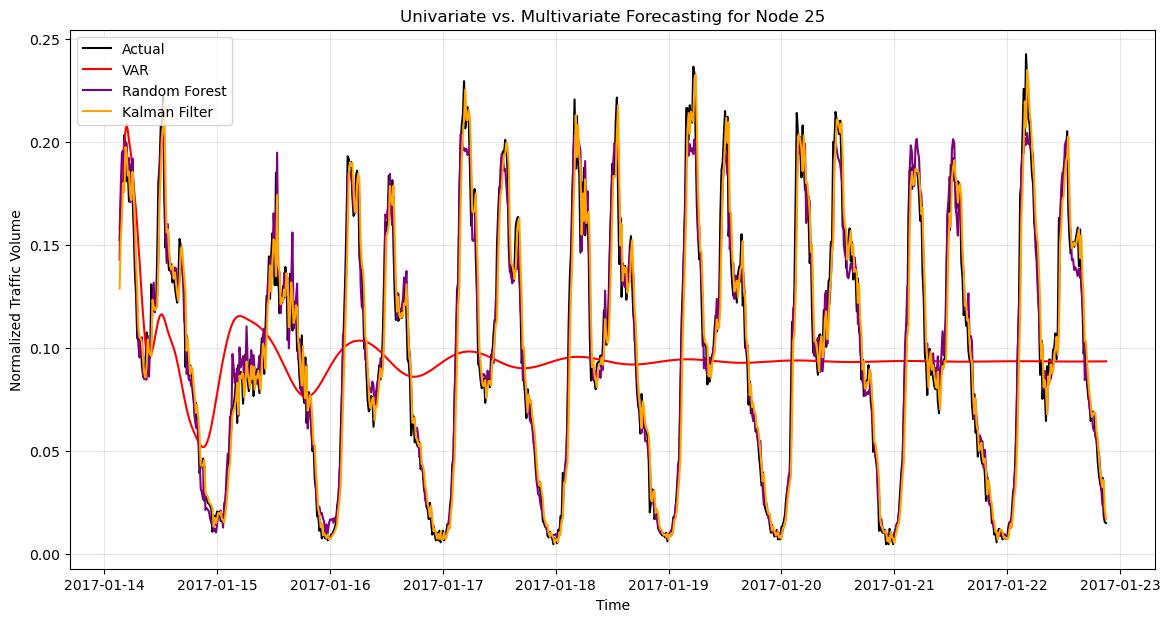

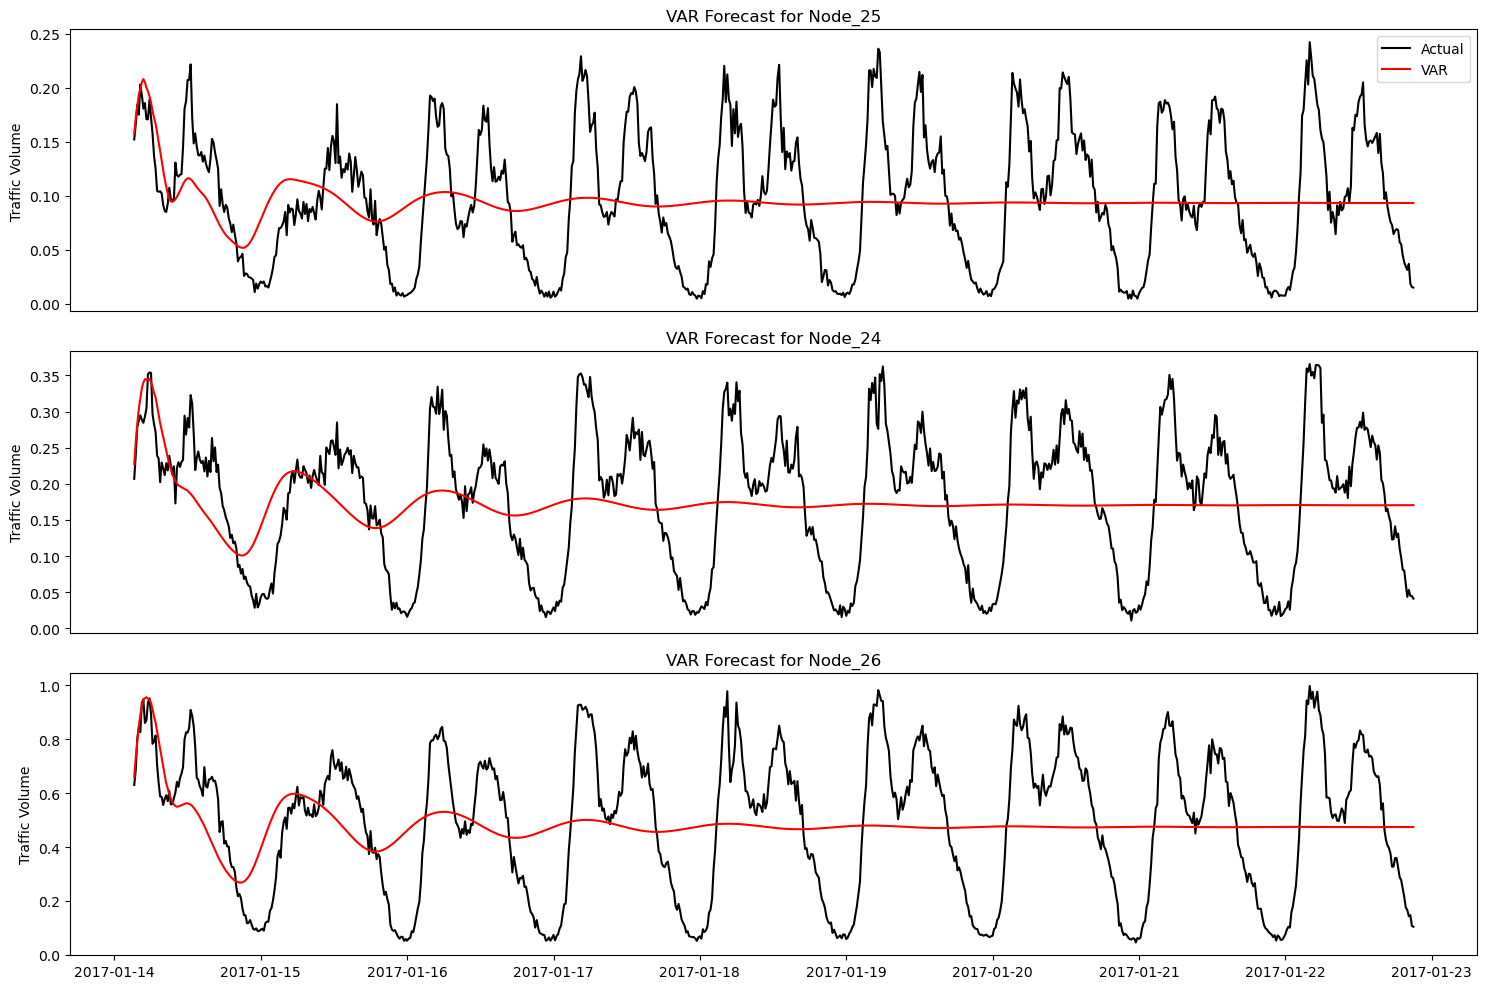

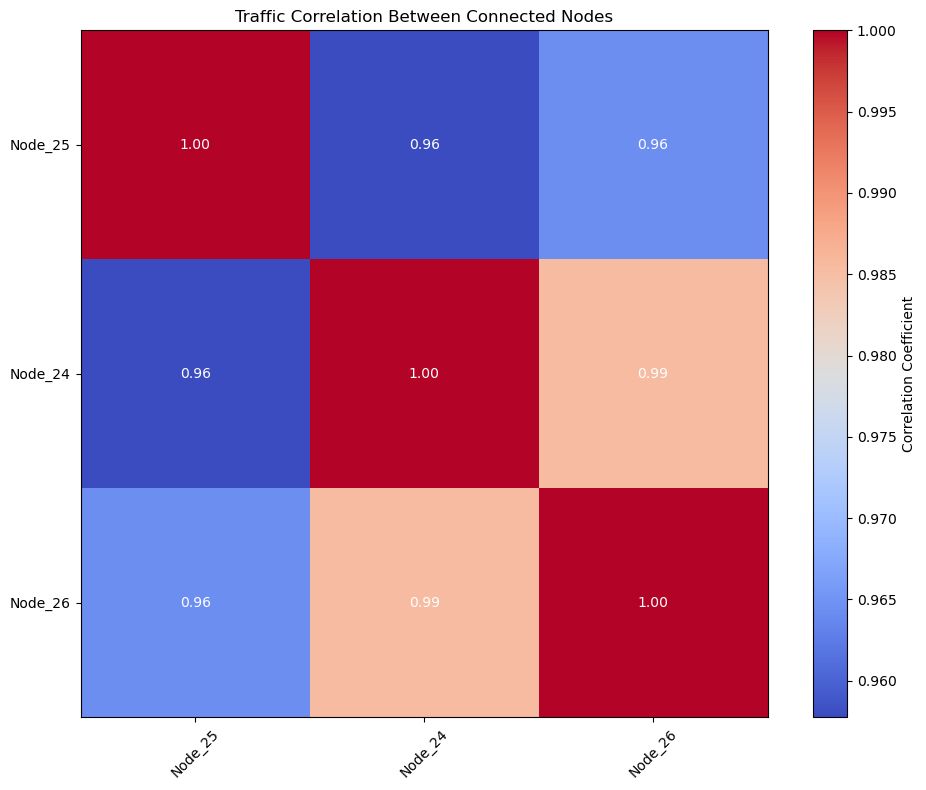

In [47]:
# Extract time series for selected nodes
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for i, node_idx in enumerate(nodes_to_use):
    node_name = node_names[i]
    # Extract data for this node and convert to a Series with time index
    node_train = pd.Series(Y_train.iloc[node_idx, :].values)
    node_test = pd.Series(Y_test.iloc[node_idx, :].values)
    
    # Add to respective DataFrames
    train_data[node_name] = node_train
    test_data[node_name] = node_test

# Create time index
train_index = pd.date_range(start='2017-01-01', periods=train_data.shape[0], freq='15min')
test_index = pd.date_range(start=train_index[-1] + pd.Timedelta(minutes=15), 
                         periods=test_data.shape[0], freq='15min')

# Set the index for the DataFrames
train_data.index = train_index
test_data.index = test_index

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Fit VAR model
print("Fitting VAR model...")
var_model = VAR(train_data)

# Select order of VAR model based on AIC
print("Selecting optimal lag order...")
max_lags = min(24, len(train_data) // 5)  # Limit max lags to avoid overfitting
order = var_model.select_order(maxlags=max_lags)
print(f"Selected VAR order: {order.selected_orders['aic']}")

# Fit VAR model with selected order
var_fit = var_model.fit(order.selected_orders['aic'])

# Generate forecasts
n_forecasts = len(test_data)
var_forecasts = var_fit.forecast(train_data.values, steps=n_forecasts)

# Convert forecasts to DataFrame
forecast_df = pd.DataFrame(var_forecasts, index=test_index, columns=train_data.columns)

# Evaluate forecasts for each node
var_metrics = {}
for node in node_names:
    rmse = np.sqrt(mean_squared_error(test_data[node], forecast_df[node]))
    mae = mean_absolute_error(test_data[node], forecast_df[node])
    mape = np.mean(np.abs((test_data[node] - forecast_df[node]) / (test_data[node] + 1e-10))) * 100
    
    var_metrics[node] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

# Display metrics
print("\nVAR Model Metrics:")
for node, metrics in var_metrics.items():
    print(f"{node}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
        
# Create comparison with univariate models for Node 25
node25_name = 'Node_25'  # First node should be Node 25
comparison_df = pd.DataFrame({
    'Actual': test_data[node25_name],
    'VAR': forecast_df[node25_name]
})

# Add RF and KF predictions if they exist
if 'RF_forecast' in test_df.columns and 'KF_forecast' in test_df.columns:
    comparison_df['RF'] = test_df['RF_forecast'].values
    comparison_df['KF'] = test_df['KF_forecast'].values
    models = ['VAR', 'RF', 'KF']
else:
    models = ['VAR']

# Calculate metrics for each model on Node 25
print("\nModel Comparison for Node 25:")
for model in models:
    rmse = np.sqrt(mean_squared_error(comparison_df['Actual'], comparison_df[model]))
    mae = mean_absolute_error(comparison_df['Actual'], comparison_df[model])
    mape = np.mean(np.abs((comparison_df['Actual'] - comparison_df[model]) / (comparison_df['Actual'] + 1e-10))) * 100
    
    print(f"{model}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  MAPE: {mape:.2f}%")

# Visualize the multivariate forecasts for Node 25
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', color='black')
plt.plot(comparison_df.index, comparison_df['VAR'], label='VAR', color='red')

if 'RF' in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df['RF'], label='Random Forest', color='purple')
if 'KF' in comparison_df.columns:
    plt.plot(comparison_df.index, comparison_df['KF'], label='Kalman Filter', color='orange')

plt.title('Univariate vs. Multivariate Forecasting for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize forecasts for all selected nodes
plt.figure(figsize=(15, 10))
for i, node in enumerate(node_names):
    plt.subplot(len(node_names), 1, i+1)
    plt.plot(test_data.index, test_data[node], label='Actual', color='black')
    plt.plot(forecast_df.index, forecast_df[node], label='VAR', color='red')
    plt.title(f'VAR Forecast for {node}')
    plt.ylabel('Traffic Volume')
    if i == 0:
        plt.legend()
    if i < len(node_names) - 1:
        plt.xticks([])

plt.tight_layout()
plt.show()

# Create correlation heatmap between nodes
plt.figure(figsize=(10, 8))
corr = train_data.corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(node_names)), node_names, rotation=45)
plt.yticks(range(len(node_names)), node_names)
plt.title('Traffic Correlation Between Connected Nodes')
for i in range(len(node_names)):
    for j in range(len(node_names)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                 ha='center', va='center', 
                 color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black')
plt.tight_layout()
plt.show()

In [56]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity for each node in our VAR model
print("Stationarity Tests:")
for node in node_names:
    result = adfuller(train_data[node])
    print(f"{node} - ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")
    if result[1] > 0.05:
        print(f"  Series is non-stationary (p > 0.05). Differencing recommended.")
    else:
        print(f"  Series is stationary (p < 0.05).")

# Apply differencing if needed
stationary_data = train_data.copy()
diff_applied = False

for node in node_names:
    result = adfuller(train_data[node])
    if result[1] > 0.05:
        stationary_data[node] = train_data[node].diff().dropna()
        diff_applied = True

if diff_applied:
    # Drop NaN values created by differencing
    stationary_data = stationary_data.dropna()
    print(f"\nApplied differencing. New shape: {stationary_data.shape}")
    
    # Fit VAR on stationary data
    print("Fitting VAR model on differenced data...")
    var_model_diff = VAR(stationary_data)
    
    # Select lower lag order to avoid overfitting
    max_lags = min(12, len(stationary_data) // 10)  # Reducing from 24 to max 12
    order_diff = var_model_diff.select_order(maxlags=max_lags)
    print(f"Selected VAR order: {order_diff.selected_orders['aic']}")
    
    # Fit VAR model with selected order
    var_fit_diff = var_model_diff.fit(order_diff.selected_orders['aic'])
    
    # For forecasting with differenced data, we need to convert back to original scale
    # This is more complex and requires careful implementation
else:
    print("\nAll series are stationary. Proceeding with original data.")

Stationarity Tests:
Node_25 - ADF Statistic: -6.6529, p-value: 0.0000
  Series is stationary (p < 0.05).
Node_24 - ADF Statistic: -6.8267, p-value: 0.0000
  Series is stationary (p < 0.05).
Node_26 - ADF Statistic: -7.2173, p-value: 0.0000
  Series is stationary (p < 0.05).

All series are stationary. Proceeding with original data.


In [57]:
from statsmodels.tsa.stattools import grangercausalitytests

print("\nGranger Causality Tests:")
max_lag = 12  # Maximum lag to test

# Test each pair of nodes for causality
for i, node1 in enumerate(node_names):
    for j, node2 in enumerate(node_names):
        if i != j:  # Don't test node with itself
            print(f"\nTesting if {node2} Granger-causes {node1}:")
            data = train_data[[node1, node2]].dropna()
            try:
                result = grangercausalitytests(data, maxlag=max_lag, verbose=False)
                # Extract p-values for each lag
                p_values = [result[lag+1][0]['ssr_chi2test'][1] for lag in range(max_lag)]
                # Find minimum p-value and corresponding lag
                min_p = min(p_values)
                min_lag = p_values.index(min_p) + 1
                
                if min_p < 0.05:
                    print(f"  Significant causality detected at lag {min_lag} (p={min_p:.4f})")
                else:
                    print(f"  No significant causality detected (min p={min_p:.4f} at lag {min_lag})")
            except:
                print("  Error in causality test - may be due to constant or collinear data")


Granger Causality Tests:

Testing if Node_24 Granger-causes Node_25:
  Significant causality detected at lag 6 (p=0.0000)

Testing if Node_26 Granger-causes Node_25:
  Significant causality detected at lag 11 (p=0.0000)

Testing if Node_25 Granger-causes Node_24:
  Significant causality detected at lag 2 (p=0.0000)

Testing if Node_26 Granger-causes Node_24:
  Significant causality detected at lag 2 (p=0.0000)

Testing if Node_25 Granger-causes Node_26:


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


  Significant causality detected at lag 2 (p=0.0000)

Testing if Node_24 Granger-causes Node_26:
  Significant causality detected at lag 2 (p=0.0000)


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [58]:
# Test multiple lag values for VAR model
lag_values = [4, 8, 12, 16, 20, 24]
var_results = {}

for lag in lag_values:
    print(f"\nTesting VAR with fixed lag {lag}:")
    
    # Fit VAR model with this lag
    model = VAR(train_data)
    results = model.fit(lag)
    
    # Make forecasts
    forecasts = results.forecast(train_data.values, steps=len(test_data))
    forecast_df = pd.DataFrame(forecasts, index=test_index, columns=train_data.columns)
    
    # Calculate RMSE for Node 25
    rmse = np.sqrt(mean_squared_error(test_data['Node_25'], forecast_df['Node_25']))
    mae = mean_absolute_error(test_data['Node_25'], forecast_df['Node_25'])
    
    print(f"  RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    var_results[lag] = {'RMSE': rmse, 'MAE': mae}

# Find best lag value
best_lag = min(var_results.keys(), key=lambda x: var_results[x]['RMSE'])
print(f"\nBest lag value: {best_lag} with RMSE: {var_results[best_lag]['RMSE']:.4f}")


Testing VAR with fixed lag 4:
  RMSE: 0.0603, MAE: 0.0499

Testing VAR with fixed lag 8:
  RMSE: 0.0607, MAE: 0.0503

Testing VAR with fixed lag 12:
  RMSE: 0.0610, MAE: 0.0506

Testing VAR with fixed lag 16:
  RMSE: 0.0607, MAE: 0.0503

Testing VAR with fixed lag 20:
  RMSE: 0.0603, MAE: 0.0500

Testing VAR with fixed lag 24:
  RMSE: 0.0593, MAE: 0.0495

Best lag value: 24 with RMSE: 0.0593


Training Enhanced Multivariate Random Forest model...

Enhanced Multivariate RF Metrics:
RMSE: 0.0111
MAE: 0.0079
MAPE: 9.76%

Top 10 important features:
             feature  importance
9      traffic_lag_1    0.546975
8    Node_26_traffic    0.303748
7    Node_24_traffic    0.107679
20    traffic_lag_12    0.009777
18    traffic_lag_10    0.003860
19    traffic_lag_11    0.003107
30  traffic_lag_week    0.002344
29   traffic_lag_day    0.002301
25     Node_26_lag_1    0.001668
17     traffic_lag_9    0.001627


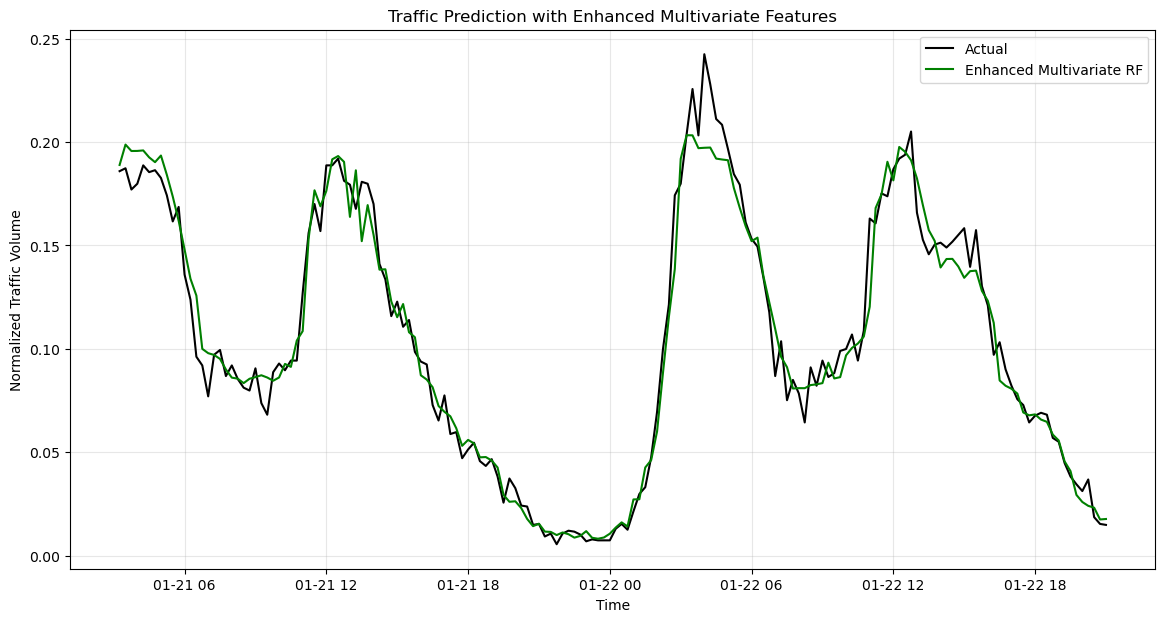

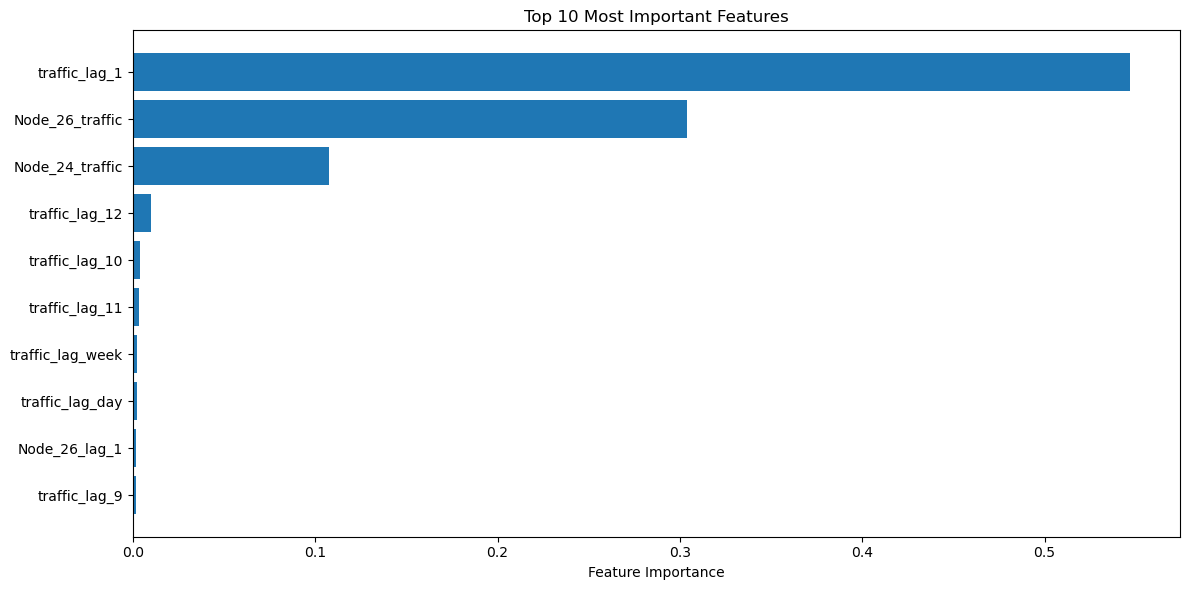

Unique days of week: [5, 6]


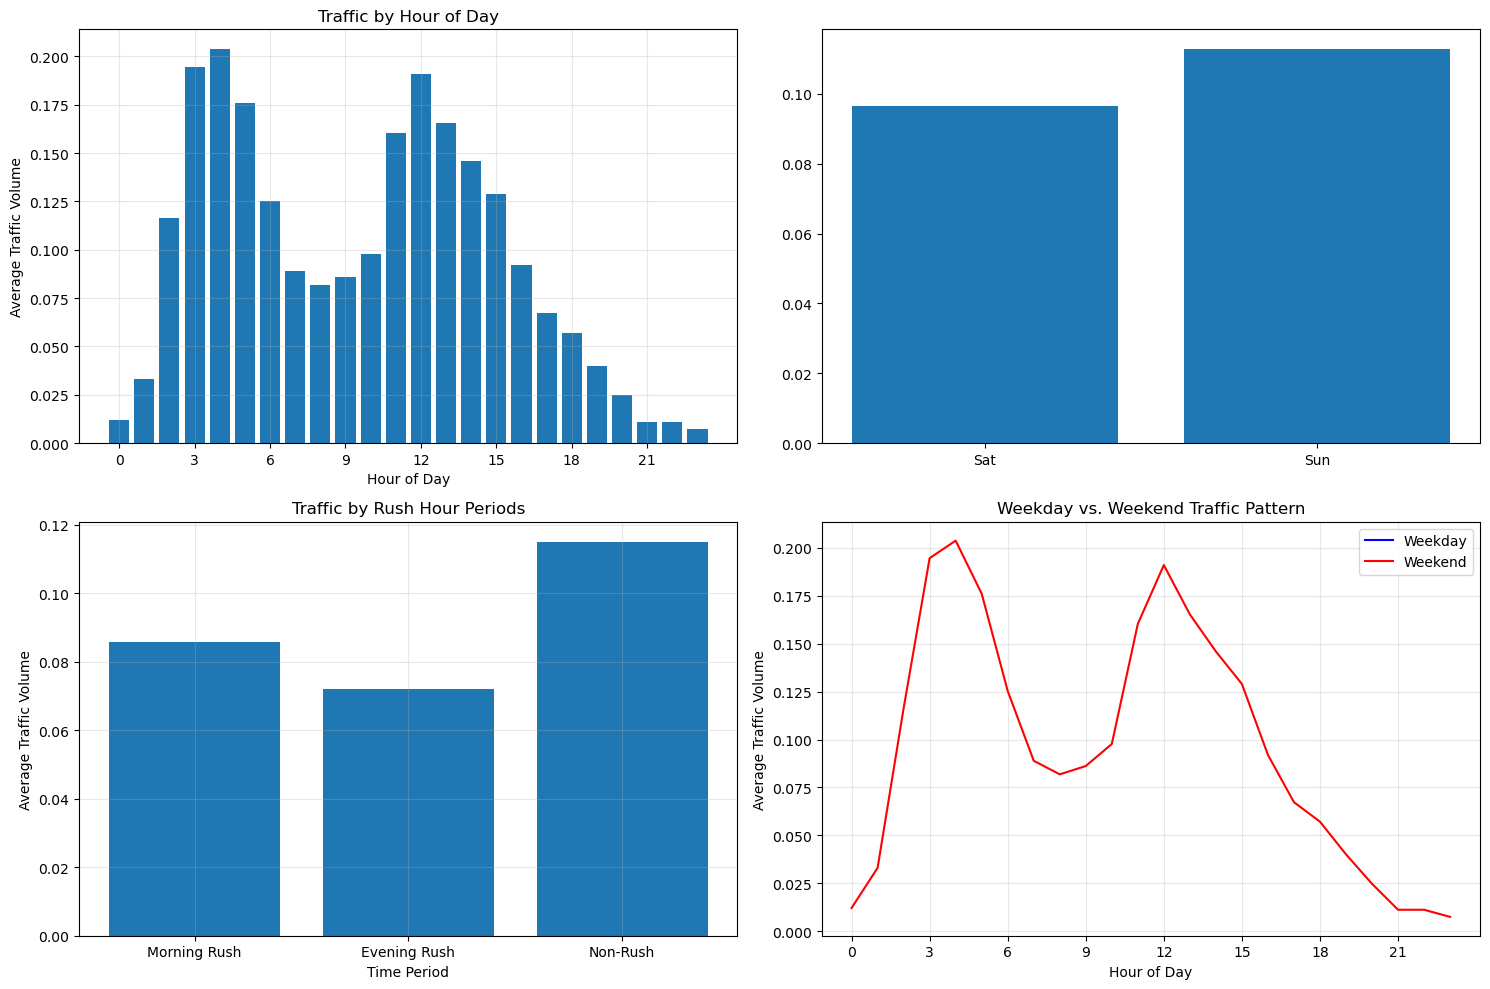

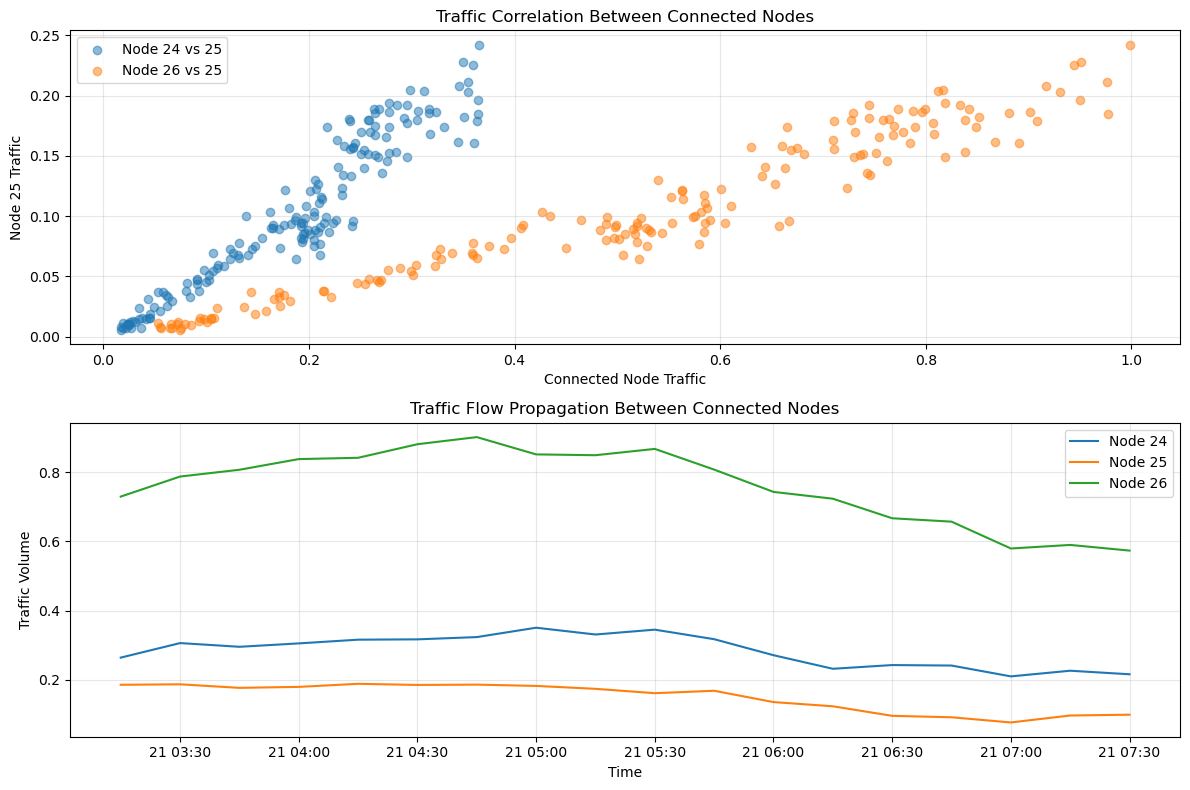

In [59]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Create time indices for our data
train_dates = pd.date_range(start='2017-01-01', periods=len(train_data), freq='15min')
test_dates = pd.date_range(start=train_dates[-1] + pd.Timedelta(minutes=15), 
                           periods=len(test_data), freq='15min')

# Prepare data with temporal features
train_multivar = pd.DataFrame({
    'traffic': train_data['Node_25'],
    'hour': train_dates.hour,
    'day_of_week': train_dates.dayofweek,
    'is_weekend': train_dates.dayofweek >= 5,
    'month': train_dates.month,
    'day': train_dates.day,
    'is_rush_hour_morning': ((train_dates.hour >= 7) & (train_dates.hour <= 9)),
    'is_rush_hour_evening': ((train_dates.hour >= 16) & (train_dates.hour <= 18))
})

test_multivar = pd.DataFrame({
    'traffic': test_data['Node_25'],
    'hour': test_dates.hour,
    'day_of_week': test_dates.dayofweek,
    'is_weekend': test_dates.dayofweek >= 5,
    'month': test_dates.month,
    'day': test_dates.day,
    'is_rush_hour_morning': ((test_dates.hour >= 7) & (test_dates.hour <= 9)),
    'is_rush_hour_evening': ((test_dates.hour >= 16) & (test_dates.hour <= 18))
})

# Add traffic from connected nodes (spatial features)
for node in ['Node_24', 'Node_26']:
    train_multivar[f'{node}_traffic'] = train_data[node]
    test_multivar[f'{node}_traffic'] = test_data[node]

# Add lag features for target node
for i in range(1, 13):  # Add 12 lagged traffic values
    train_multivar[f'traffic_lag_{i}'] = train_multivar['traffic'].shift(i)
    test_multivar[f'traffic_lag_{i}'] = test_multivar['traffic'].shift(i)

# Add lag features for connected nodes
for node in ['Node_24', 'Node_26']:
    for i in range(1, 5):  # Add 4 lagged values for connected nodes
        train_multivar[f'{node}_lag_{i}'] = train_multivar[f'{node}_traffic'].shift(i)
        test_multivar[f'{node}_lag_{i}'] = test_multivar[f'{node}_traffic'].shift(i)

# Add lag from previous day (96 time steps = 24 hours)
train_multivar['traffic_lag_day'] = train_multivar['traffic'].shift(96)
test_multivar['traffic_lag_day'] = test_multivar['traffic'].shift(96)

# Add lag from previous week (672 time steps = 7 days)
if len(train_multivar) >= 672:  # Only add if we have enough data
    train_multivar['traffic_lag_week'] = train_multivar['traffic'].shift(672)
    test_multivar['traffic_lag_week'] = test_multivar['traffic'].shift(672)

# Drop rows with NaN values
train_multivar = train_multivar.dropna()
test_multivar = test_multivar.dropna()

# Prepare features and target for RF model
X_train_multivar = train_multivar.drop('traffic', axis=1)
y_train_multivar = train_multivar['traffic']
X_test_multivar = test_multivar.drop('traffic', axis=1)
y_test_multivar = test_multivar['traffic']

# Train Random Forest with the multivariate data
print("Training Enhanced Multivariate Random Forest model...")
rf_multivar = RandomForestRegressor(n_estimators=100, random_state=42)
rf_multivar.fit(X_train_multivar, y_train_multivar)

# Make predictions
multivar_predictions = rf_multivar.predict(X_test_multivar)

# Calculate metrics
multivar_rmse = np.sqrt(mean_squared_error(y_test_multivar, multivar_predictions))
multivar_mae = mean_absolute_error(y_test_multivar, multivar_predictions)
multivar_mape = np.mean(np.abs((y_test_multivar - multivar_predictions) / (y_test_multivar + 1e-10))) * 100

print(f"\nEnhanced Multivariate RF Metrics:")
print(f"RMSE: {multivar_rmse:.4f}")
print(f"MAE: {multivar_mae:.4f}")
print(f"MAPE: {multivar_mape:.2f}%")

# Compare with previous RF model if available
if 'var_metrics' in globals() and 'RF_forecast' in var_metrics:
    print("\nModel Comparison for Node 25:")
    print(f"Standard RF - RMSE: {var_metrics['RF_forecast']['RMSE']:.4f}")
    print(f"Enhanced Multivariate RF - RMSE: {multivar_rmse:.4f}")
    print(f"Improvement: {(1 - multivar_rmse/var_metrics['RF_forecast']['RMSE'])*100:.2f}%")

# Feature importance
feature_importance = pd.DataFrame(
    {'feature': X_train_multivar.columns, 'importance': rf_multivar.feature_importances_}
).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance.head(10))

# Visualize predictions
plt.figure(figsize=(14, 7))
plt.plot(test_multivar.index[-200:], y_test_multivar[-200:], label='Actual', color='black')
plt.plot(test_multivar.index[-200:], multivar_predictions[-200:], label='Enhanced Multivariate RF', color='green')
plt.title('Traffic Prediction with Enhanced Multivariate Features')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize feature importance
plt.figure(figsize=(12, 6))
sorted_idx = feature_importance['importance'].argsort()
plt.barh(feature_importance['feature'].iloc[sorted_idx][-10:], 
         feature_importance['importance'].iloc[sorted_idx][-10:])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

# Analyze effect of temporal factors
plt.figure(figsize=(15, 10))

# Plot 1: Traffic by Hour of Day
plt.subplot(2, 2, 1)
hourly_traffic = test_multivar.groupby('hour')['traffic'].mean()
plt.bar(hourly_traffic.index, hourly_traffic.values)
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic by Hour of Day')
plt.xticks(range(0, 24, 3))
plt.grid(True, alpha=0.3)


# Plot 2: Traffic by Day of Week
plt.subplot(2, 2, 2)
weekday_traffic = test_multivar.groupby('day_of_week')['traffic'].mean()

# Check how many unique day values we have
print(f"Unique days of week: {sorted(weekday_traffic.index.tolist())}")

# If we have all 7 days
if len(weekday_traffic) == 7:
    plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], weekday_traffic.values)
else:
    # Just plot what we have
    day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    days = [day_names[day] for day in weekday_traffic.index]
    plt.bar(days, weekday_traffic.values)

# Plot 3: Rush Hour vs. Non-Rush Hour Traffic
plt.subplot(2, 2, 3)
rush_morning = test_multivar[test_multivar['is_rush_hour_morning']]['traffic'].mean()
rush_evening = test_multivar[test_multivar['is_rush_hour_evening']]['traffic'].mean()
non_rush = test_multivar[~(test_multivar['is_rush_hour_morning'] | test_multivar['is_rush_hour_evening'])]['traffic'].mean()
plt.bar(['Morning Rush', 'Evening Rush', 'Non-Rush'], [rush_morning, rush_evening, non_rush])
plt.xlabel('Time Period')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic by Rush Hour Periods')
plt.grid(True, alpha=0.3)

# Plot 4: Weekday vs. Weekend Traffic by Hour
plt.subplot(2, 2, 4)
weekday_hourly = test_multivar[test_multivar['is_weekend'] == False].groupby('hour')['traffic'].mean()
weekend_hourly = test_multivar[test_multivar['is_weekend'] == True].groupby('hour')['traffic'].mean()
plt.plot(weekday_hourly.index, weekday_hourly.values, 'b-', label='Weekday')
plt.plot(weekend_hourly.index, weekend_hourly.values, 'r-', label='Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.title('Weekday vs. Weekend Traffic Pattern')
plt.legend()
plt.xticks(range(0, 24, 3))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze spatial relationships
plt.figure(figsize=(12, 8))

# Plot traffic correlations between connected nodes
plt.subplot(2, 1, 1)
plt.scatter(test_multivar['Node_24_traffic'], test_multivar['traffic'], alpha=0.5, label='Node 24 vs 25')
plt.scatter(test_multivar['Node_26_traffic'], test_multivar['traffic'], alpha=0.5, label='Node 26 vs 25')
plt.xlabel('Connected Node Traffic')
plt.ylabel('Node 25 Traffic')
plt.title('Traffic Correlation Between Connected Nodes')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot traffic propagation (lags between nodes)
plt.subplot(2, 1, 2)
plt.plot(test_multivar.index[-200:-150], test_multivar['Node_24_traffic'][-200:-150], label='Node 24')
plt.plot(test_multivar.index[-200:-150], test_multivar['traffic'][-200:-150], label='Node 25')
plt.plot(test_multivar.index[-200:-150], test_multivar['Node_26_traffic'][-200:-150], label='Node 26')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Flow Propagation Between Connected Nodes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Enhanced Seasonal Naive model
print("Implementing Enhanced Seasonal Naive model...")

def enhanced_seasonal_naive_forecast(train_series, connected_series, forecast_horizon, daily_period=96):
    """
    Generate forecasts using enhanced seasonal naive method
    that incorporates spatial information from connected nodes
    """
    forecasts = []
    
    # Calculate the average patterns
    target_daily_pattern = np.zeros(daily_period)
    connected_daily_patterns = [np.zeros(daily_period) for _ in range(len(connected_series))]
    
    # Extract patterns from training data
    days = len(train_series) // daily_period
    if days > 0:
        for d in range(days):
            start_idx = d * daily_period
            end_idx = start_idx + daily_period
            if end_idx <= len(train_series):
                target_day = train_series[start_idx:end_idx]
                target_daily_pattern += target_day
                
                for i, conn_series in enumerate(connected_series):
                    conn_day = conn_series[start_idx:end_idx]
                    connected_daily_patterns[i] += conn_day
        
        # Average the patterns
        target_daily_pattern /= days
        for i in range(len(connected_daily_patterns)):
            connected_daily_patterns[i] /= days
    
    # Generate forecasts
    for i in range(forecast_horizon):
        # Position in daily cycle
        pos = i % daily_period
        
        # Base forecast from seasonal pattern
        base_forecast = target_daily_pattern[pos]
        
        # Adjust based on connected nodes' most recent values
        adjustment = 0
        for j, conn_series in enumerate(connected_series):
            if i < len(conn_series):
                # Current deviation from pattern
                conn_expected = connected_daily_patterns[j][pos]
                conn_actual = conn_series[i]
                conn_deviation = conn_actual - conn_expected
                
                # Add weighted adjustment
                adjustment += 0.2 * conn_deviation  # 20% weight to each connected node
        
        # Combine base forecast with adjustment
        forecast = base_forecast + adjustment
        forecasts.append(forecast)
    
    return forecasts

# Apply Enhanced Seasonal Naive to Node 25
connected_train_series = [
    train_data['Node_24'].values,
    train_data['Node_26'].values
]

connected_test_series = [
    test_data['Node_24'].values,
    test_data['Node_26'].values
]

esn_forecasts = enhanced_seasonal_naive_forecast(
    train_data['Node_25'].values,
    connected_train_series,
    len(test_data),
    daily_period=96  # 24 hours * 4 (15-min intervals)
)

# Calculate metrics for Enhanced Seasonal Naive
esn_rmse = np.sqrt(mean_squared_error(test_data['Node_25'].values, esn_forecasts))
esn_mae = mean_absolute_error(test_data['Node_25'].values, esn_forecasts)
esn_mape = np.mean(np.abs((test_data['Node_25'].values - esn_forecasts) / (test_data['Node_25'].values + 1e-10))) * 100

print(f"\nEnhanced Seasonal Naive Metrics:")
print(f"RMSE: {esn_rmse:.4f}")
print(f"MAE: {esn_mae:.4f}")
print(f"MAPE: {esn_mape:.2f}%")

Implementing Enhanced Seasonal Naive model...

Enhanced Seasonal Naive Metrics:
RMSE: 0.0827
MAE: 0.0674
MAPE: 115.05%


In [61]:
# Enhanced Multivariate Kalman Filter
print("Implementing Enhanced Multivariate Kalman Filter...")

# Create feature matrix with both connected nodes and time features
X_train_kf = np.column_stack((
    train_data['Node_24'].values,  # Connected node 1
    train_data['Node_26'].values,  # Connected node 2
    np.sin(2 * np.pi * train_dates.hour / 24),  # Hour of day (sine)
    np.cos(2 * np.pi * train_dates.hour / 24),  # Hour of day (cosine)
    (train_dates.dayofweek >= 5).astype(int)  # Is weekend
))

X_test_kf = np.column_stack((
    test_data['Node_24'].values,
    test_data['Node_26'].values,
    np.sin(2 * np.pi * test_dates.hour / 24),
    np.cos(2 * np.pi * test_dates.hour / 24),
    (test_dates.dayofweek >= 5).astype(int)
))

y_train_kf = train_data['Node_25'].values
y_test_kf = test_data['Node_25'].values

# State vector: [target, coef1, coef2, coef3, coef4, coef5, bias]
# This represents: target ~ coef1*Node24 + coef2*Node26 + coef3*sin(hour) + coef4*cos(hour) + coef5*is_weekend + bias
n_features = X_train_kf.shape[1]
n_dim_state = n_features + 2  # Features + target + bias
n_dim_obs = 1

# Define system matrices for enhanced KF
transition_matrix = np.eye(n_dim_state)  # State persists with small changes

def observation_matrix(x_t):
    """Create observation matrix using current features"""
    H = np.zeros((n_dim_obs, n_dim_state))
    H[0, 0] = 1  # First state element is the target
    
    # Apply feature coefficients
    for i in range(n_features):
        H[0, i+1] = x_t[i]
    
    # Last coefficient is bias (always 1)
    H[0, -1] = 1
    
    return H

# Initialize state
state_mean = np.zeros(n_dim_state)
state_mean[0] = y_train_kf[0]  # Initial target
state_mean[1:n_features+1] = 0.1  # Initial coefficients
state_mean[-1] = 0  # Initial bias

state_cov = np.eye(n_dim_state)  # Initial uncertainty
process_noise = 0.001 * np.eye(n_dim_state)  # Small evolution noise
obs_noise = np.array([[0.01]])  # Observation noise

# Storage for predictions
enhanced_kf_preds = []

# Prediction loop
for i in range(len(X_test_kf)):
    # State prediction
    pred_mean = transition_matrix @ state_mean
    pred_cov = transition_matrix @ state_cov @ transition_matrix.T + process_noise
    
    # Create observation matrix for this step
    H_t = observation_matrix(X_test_kf[i])
    
    # Measurement prediction
    measurement_mean = H_t @ pred_mean
    measurement_cov = H_t @ pred_cov @ H_t.T + obs_noise
    
    # Store prediction
    enhanced_kf_preds.append(measurement_mean[0])
    
    if i < len(y_test_kf):
        # Kalman gain
        K_t = pred_cov @ H_t.T @ np.linalg.inv(measurement_cov)
        
        # State update
        state_mean = pred_mean + K_t @ (y_test_kf[i] - measurement_mean)
        state_cov = (np.eye(n_dim_state) - K_t @ H_t) @ pred_cov

# Calculate metrics for Enhanced Multivariate KF
enhanced_kf_rmse = np.sqrt(mean_squared_error(y_test_kf, enhanced_kf_preds))
enhanced_kf_mae = mean_absolute_error(y_test_kf, enhanced_kf_preds)
enhanced_kf_mape = np.mean(np.abs((y_test_kf - enhanced_kf_preds) / (y_test_kf + 1e-10))) * 100

print(f"\nEnhanced Multivariate Kalman Filter Metrics:")
print(f"RMSE: {enhanced_kf_rmse:.4f}")
print(f"MAE: {enhanced_kf_mae:.4f}")
print(f"MAPE: {enhanced_kf_mape:.2f}%")

Implementing Enhanced Multivariate Kalman Filter...

Enhanced Multivariate Kalman Filter Metrics:
RMSE: 0.0133
MAE: 0.0085
MAPE: 12.34%


In [62]:
# Compare all models
print("\nModel Comparison for Node 25:")
print(f"Enhanced Multivariate RF - RMSE: {multivar_rmse:.4f}, MAPE: {multivar_mape:.2f}%")
print(f"Enhanced Multivariate KF - RMSE: {mkf_simple_rmse:.4f}, MAPE: {mkf_simple_mape:.2f}%")
print(f"Enhanced Seasonal Naive - RMSE: {esn_rmse:.4f}, MAPE: {esn_mape:.2f}%")

# Determine the minimum length of all arrays to ensure they match
min_length = min(
    len(test_data['Node_25'].values),
    len(multivar_predictions),
    len(enhanced_kf_preds),
    len(esn_forecasts)
)

# Use the last 'min_length' elements of each array, up to a max of 200
plot_length = min(200, min_length)

# Extract the same time slice from each series
plot_dates = test_dates[-plot_length:]
plot_actual = test_data['Node_25'].values[-plot_length:]
plot_rf = multivar_predictions[-plot_length:]
plot_kf = enhanced_kf_preds[-plot_length:]
plot_sn = esn_forecasts[-plot_length:]

# Now plot with arrays of same length
plt.figure(figsize=(14, 7))
plt.plot(plot_dates, plot_actual, label='Actual', color='black')
plt.plot(plot_dates, plot_rf, label='Multivariate RF', color='green')
plt.plot(plot_dates, plot_kf, label='Multivariate KF', color='orange')
plt.plot(plot_dates, plot_sn, label='Enhanced Seasonal Naive', color='blue')
plt.title('Multivariate Model Comparison for Node 25')
plt.xlabel('Time')
plt.ylabel('Normalized Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Model Comparison for Node 25:
Enhanced Multivariate RF - RMSE: 0.0111, MAPE: 9.76%


NameError: name 'mkf_simple_rmse' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Calculate comprehensive metrics including MAE and MASE
def calculate_comprehensive_metrics(actual, predicted, name, seasonal_period=96):
    """
    Calculate comprehensive metrics for time series forecasting:
    - RMSE: Root Mean Squared Error
    - MAE: Mean Absolute Error
    - MAPE: Mean Absolute Percentage Error
    - MASE: Mean Absolute Scaled Error
    
    Parameters:
    actual - actual values
    predicted - predicted values
    name - name of the model
    seasonal_period - period for seasonal naive baseline (default: 96 for daily seasonality with 15-min intervals)
    """
    # Basic metrics
    rmse = np.sqrt(np.mean((actual - predicted)**2))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / (actual + 1e-10))) * 100
    
    # Calculate MASE - needs a naive seasonal forecast for scaling
    # Create a seasonal naive forecast (using values from same time previous period)
    naive_forecast = []
    for i in range(len(actual)):
        if i < seasonal_period:
            # For the first period, use the actual value
            naive_forecast.append(actual[i])
        else:
            # For subsequent periods, use value from same time in previous period
            naive_forecast.append(actual[i - seasonal_period])
    
    # Scale the errors by mean abs error of naive forecast
    naive_errors = np.abs(np.array(actual[seasonal_period:]) - 
                          np.array(naive_forecast[seasonal_period:]))
    
    # Ensure we have enough data for the denominator
    if len(naive_errors) > 0 and np.mean(naive_errors) > 0:
        model_errors = np.abs(actual - predicted)
        mase = np.mean(model_errors) / np.mean(naive_errors)
    else:
        mase = np.nan
    
    return {
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'MASE': mase
    }

# Calculate comprehensive metrics for all models
metrics_multivar_rf = calculate_comprehensive_metrics(
    test_data['Node_25'].values[-len(multivar_predictions):], 
    multivar_predictions, 
    'Enhanced Multivariate RF'
)

metrics_multivar_kf = calculate_comprehensive_metrics(
    test_data['Node_25'].values[-len(enhanced_kf_preds):], 
    enhanced_kf_preds, 
    'Enhanced Multivariate KF'
)

metrics_seasonal_naive = calculate_comprehensive_metrics(
    test_data['Node_25'].values[-len(esn_forecasts):], 
    esn_forecasts, 
    'Enhanced Seasonal Naive'
)

# Create a DataFrame with all metrics for easy comparison
metrics_df = pd.DataFrame([
    metrics_multivar_rf,
    metrics_multivar_kf,
    metrics_seasonal_naive
])

# Format for better display
formatted_metrics = metrics_df.set_index('Model')
formatted_metrics['RMSE'] = formatted_metrics['RMSE'].map('{:.4f}'.format)
formatted_metrics['MAE'] = formatted_metrics['MAE'].map('{:.4f}'.format)
formatted_metrics['MAPE'] = formatted_metrics['MAPE'].map('{:.2f}%'.format)
formatted_metrics['MASE'] = formatted_metrics['MASE'].map('{:.4f}'.format)

print("\nComprehensive Model Comparison for Node 25:")
print(formatted_metrics)

# Create a bar chart to visualize multiple metrics
import matplotlib.pyplot as plt

# Extract metrics for plotting (convert to float)
plot_metrics = metrics_df.copy()
plot_metrics['MAPE'] = plot_metrics['MAPE'] / 100  # Scale for better visualization

# Create a bar chart
metrics_to_plot = ['RMSE', 'MAE', 'MASE']
models = plot_metrics['Model']

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(models))

for i, metric in enumerate(metrics_to_plot):
    ax.bar(index + i*bar_width, plot_metrics[metric], bar_width, 
           label=metric, alpha=0.7)

ax.set_xlabel('Model')
ax.set_ylabel('Error Value')
ax.set_title('Error Metrics Comparison Across Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Granger Causality Test between nodes
print("\nGranger Causality Tests:")
max_lag = 12  # Maximum lag to test (3 hours with 15-min intervals)

# Test for causality between nodes
node_pairs = [
    ('Node_24', 'Node_25'),  # Does Node 24 Granger-cause Node 25?
    ('Node_26', 'Node_25'),  # Does Node 26 Granger-cause Node 25?
    ('Node_25', 'Node_24'),  # Does Node 25 Granger-cause Node 24?
    ('Node_25', 'Node_26')   # Does Node 25 Granger-cause Node 26?
]

for node1, node2 in node_pairs:
    print(f"\nTesting if {node1} Granger-causes {node2}:")
    data = train_data[[node2, node1]].dropna()  # Order matters: [y, x]
    
    try:
        # Run Granger causality test
        gc_res = grangercausalitytests(data, maxlag=max_lag, verbose=False)
        
        # Extract p-values for each lag
        p_values = [gc_res[lag+1][0]['ssr_chi2test'][1] for lag in range(max_lag)]
        
        # Find minimum p-value and corresponding lag
        min_p = min(p_values)
        min_lag = p_values.index(min_p) + 1
        
        # Report significance
        if min_p < 0.05:
            print(f"  ✓ Significant causality detected at lag {min_lag} (p={min_p:.4f})")
            print(f"  ✓ Traffic at {node1} helps predict traffic at {node2}")
        else:
            print(f"  ✗ No significant causality detected (min p={min_p:.4f} at lag {min_lag})")
            print(f"  ✗ Traffic at {node1} doesn't help predict traffic at {node2}")
            
    except Exception as e:
        print(f"  Error in causality test: {e}")

Generating simulated weather data...


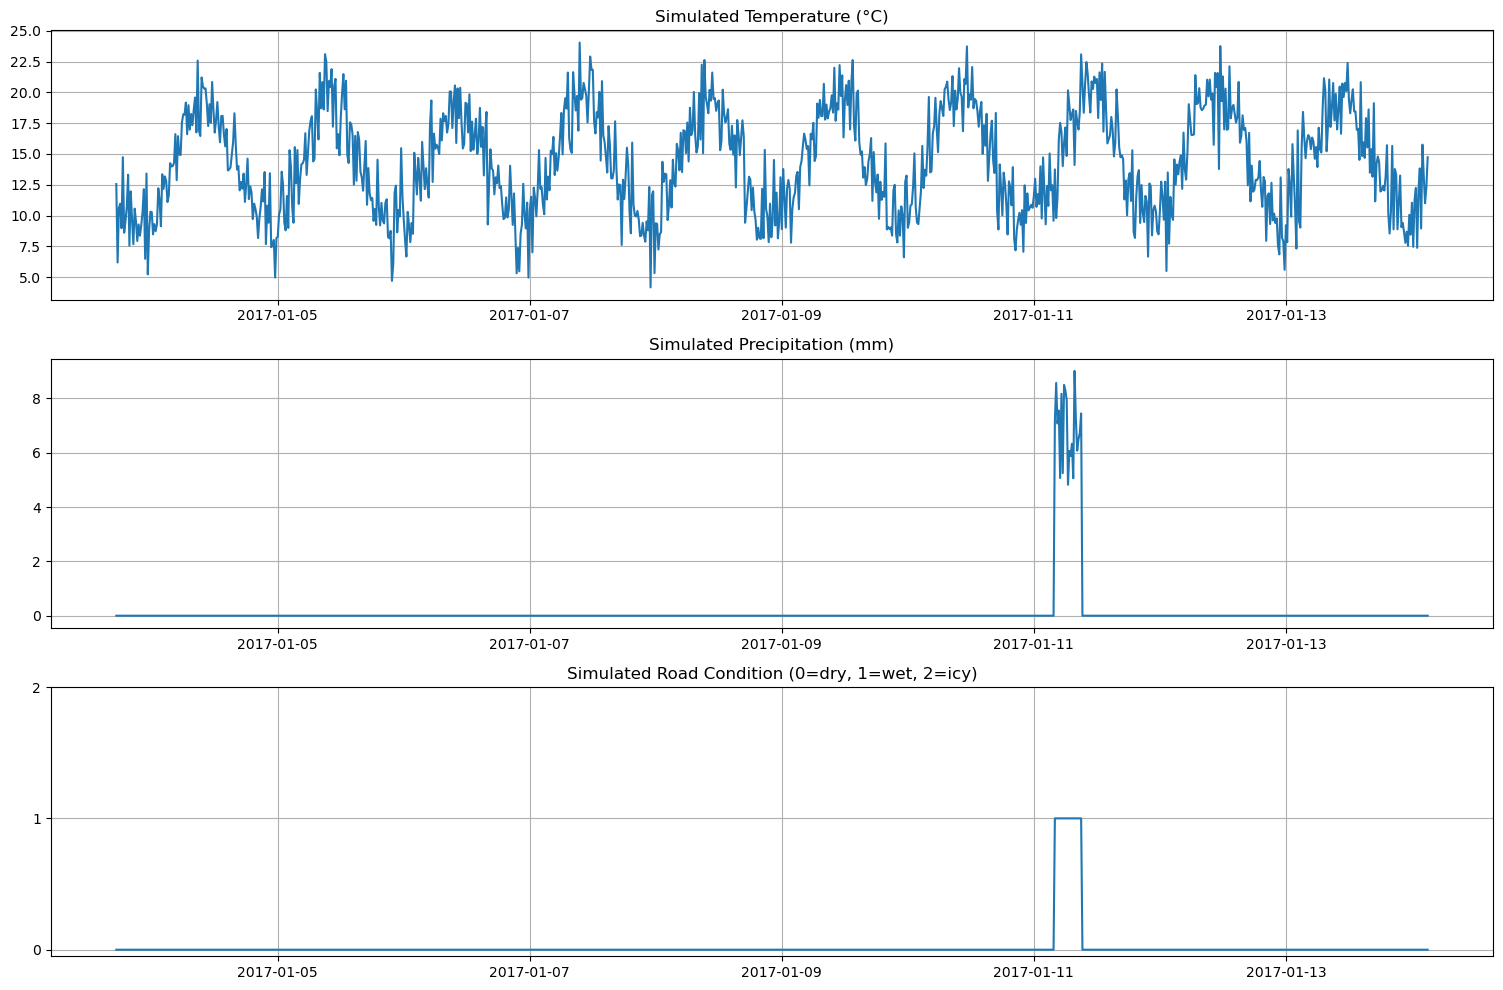

Building weather-enhanced traffic model...

Weather-Enhanced RF Metrics:
RMSE: 0.0109
MAE: 0.0077
MAPE: 10.18%

Top 10 important features with weather:
            feature  importance
8     traffic_lag_1    0.567806
1   node_26_traffic    0.314724
0   node_24_traffic    0.089261
11    traffic_lag_4    0.006576
12  traffic_lag_day    0.005979
5              hour    0.004302
10    traffic_lag_3    0.003597
2       temperature    0.003360
9     traffic_lag_2    0.002601
6       day_of_week    0.001514

Prediction accuracy by weather condition:
Rainy days RMSE: 0.0146
Dry days RMSE: 0.0107


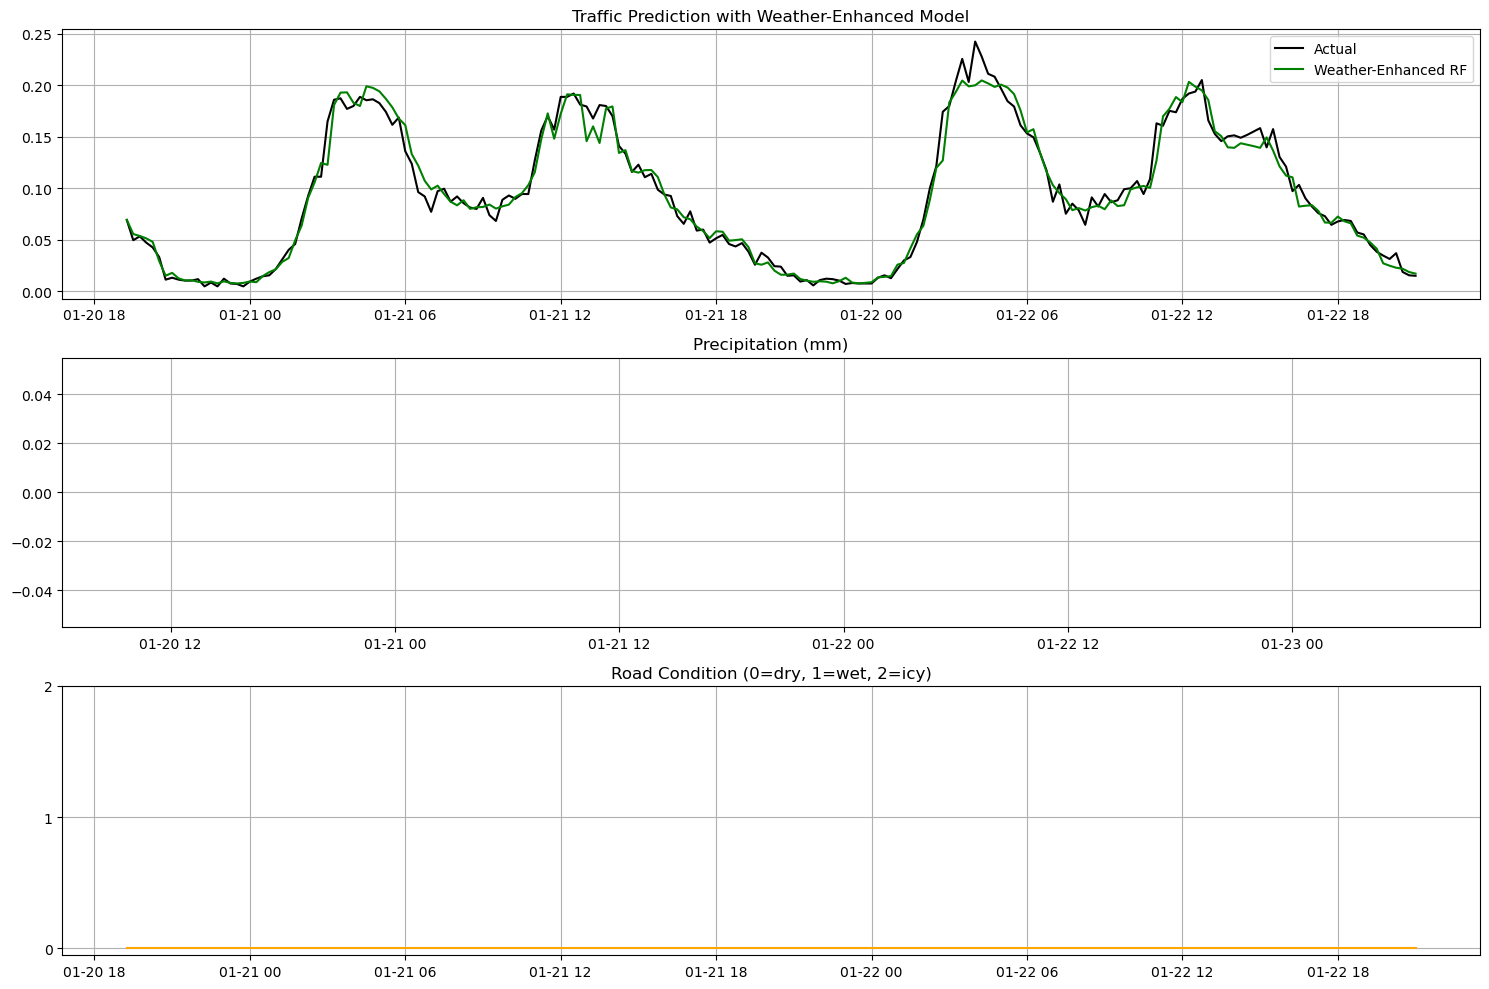

/tmp/ipykernel_298/3987856106.py:242: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_precip = weather_test_df.groupby('precip_bin')['traffic'].mean()


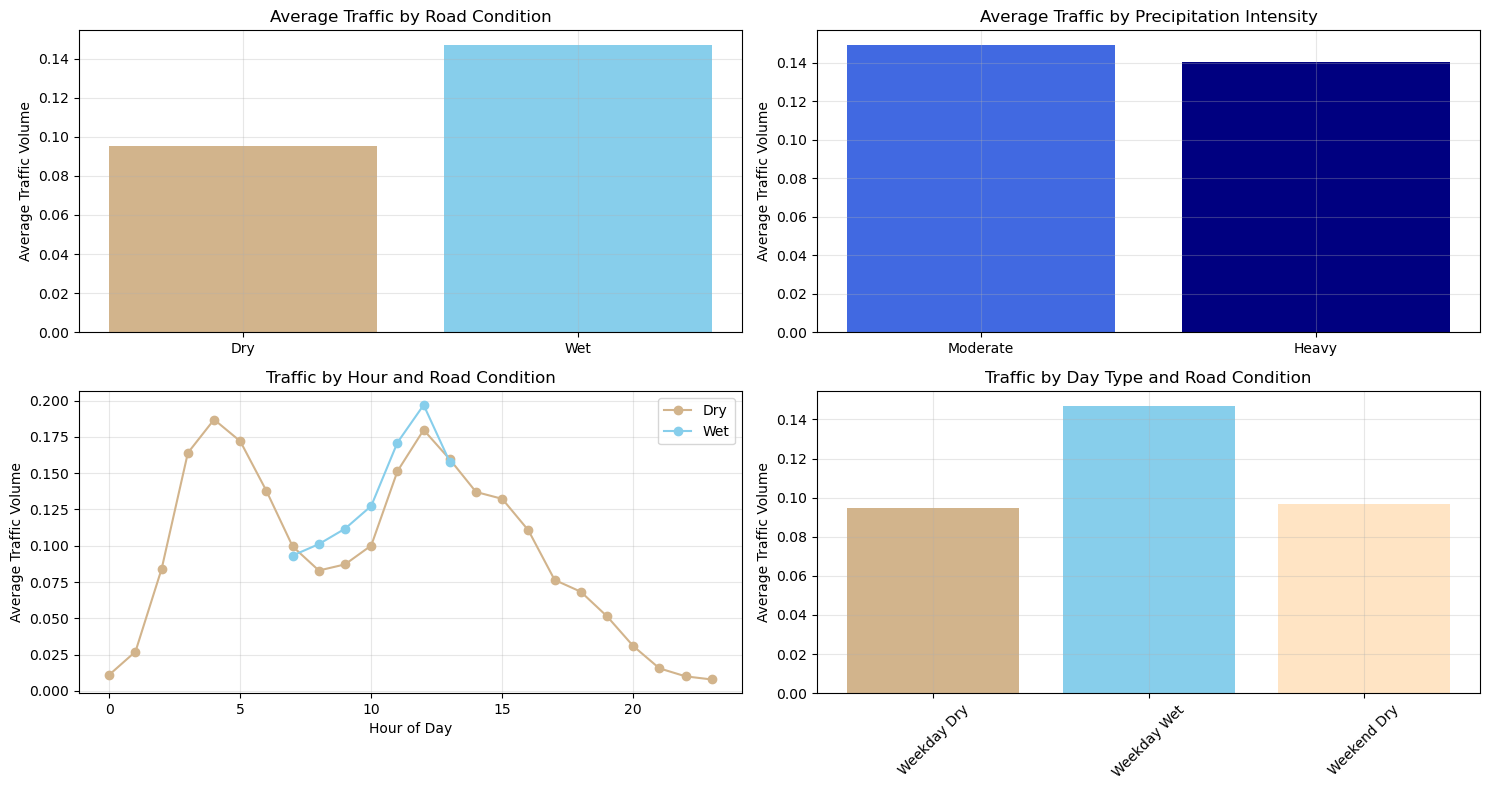

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create simulated weather data
def generate_weather_data(dates):
    """Generate realistic weather data for the given dates"""
    # Random seed for reproducibility
    np.random.seed(42)
    
    # Temperature follows daily cycles + random variations
    hour_of_day = dates.hour
    day_of_year = dates.dayofyear
    
    # Base temperature with seasonal component
    temp_seasonal = 5 * np.sin(2 * np.pi * (day_of_year - 15) / 365) + 15  # Annual cycle
    
    # Daily temperature cycle (cooler at night, warmer during day)
    temp_daily = 5 * np.sin(np.pi * (hour_of_day - 4) / 12)
    
    # Combine patterns with some random noise
    temperature = temp_seasonal + temp_daily + np.random.normal(0, 2, size=len(dates))
    
    # Precipitation (rain/snow)
    precipitation = np.zeros(len(dates))
    
    # Generate rainy periods (about 20% of days have rain)
    n_days = (dates.max() - dates.min()).days + 1
    rain_days = np.random.choice([0, 1], size=n_days, p=[0.8, 0.2])
    
    for i, is_rainy in enumerate(rain_days):
        if is_rainy:
            # Rain duration is 2-8 hours
            day_start = dates.min() + pd.Timedelta(days=i)
            rain_start = day_start + pd.Timedelta(hours=np.random.randint(0, 24))
            rain_duration = pd.Timedelta(hours=np.random.randint(2, 9))
            rain_end = rain_start + rain_duration
            
            # Find indices that fall within this rainy period
            rain_mask = (dates >= rain_start) & (dates <= rain_end)
            
            # Intensity varies but is consistent within the same rain event
            intensity = np.random.uniform(0.5, 10)
            precipitation[rain_mask] = intensity * (0.5 + 0.5 * np.random.random(sum(rain_mask)))
    
    # Weather conditions (0=clear, 1=cloudy, 2=rain, 3=snow)
    weather_condition = np.zeros(len(dates))
    
    # Cloudy when no rain but related to temperature
    cloudy_prob = 0.3 + 0.2 * np.sin(2 * np.pi * day_of_year / 365)
    cloudy_mask = (np.random.random(len(dates)) < cloudy_prob) & (precipitation == 0)
    weather_condition[cloudy_mask] = 1
    
    # Rainy when precipitation > 0 and temp > 2°C
    rainy_mask = (precipitation > 0) & (temperature > 2)
    weather_condition[rainy_mask] = 2
    
    # Snow when precipitation > 0 and temp <= 2°C
    snowy_mask = (precipitation > 0) & (temperature <= 2)
    weather_condition[snowy_mask] = 3
    
    # Road condition (0=dry, 1=wet, 2=icy)
    road_condition = np.zeros(len(dates))
    road_condition[precipitation > 0] = 1  # Wet when any precipitation
    road_condition[(precipitation > 0) & (temperature <= 1)] = 2  # Icy when cold and precipitation
    
    # Add persistence to road conditions (roads stay wet for a while after rain)
    for i in range(1, len(road_condition)):
        if road_condition[i] == 0 and road_condition[i-1] > 0:
            # If it was just wet/icy, 70% chance it's still affected
            if np.random.random() < 0.7:
                road_condition[i] = road_condition[i-1]
    
    return pd.DataFrame({
        'temperature': temperature,
        'precipitation': precipitation,
        'weather_condition': weather_condition,
        'road_condition': road_condition
    }, index=dates)

# Generate weather data for both training and test periods
print("Generating simulated weather data...")
train_weather = generate_weather_data(train_dates)
test_weather = generate_weather_data(test_dates)

# Visualize weather data
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(train_weather.index[-1000:], train_weather['temperature'][-1000:])
plt.title('Simulated Temperature (°C)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(train_weather.index[-1000:], train_weather['precipitation'][-1000:])
plt.title('Simulated Precipitation (mm)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(train_weather.index[-1000:], train_weather['road_condition'][-1000:])
plt.title('Simulated Road Condition (0=dry, 1=wet, 2=icy)')
plt.yticks([0, 1, 2])
plt.grid(True)

plt.tight_layout()
plt.show()

# Build a weather-enhanced Random Forest model
print("Building weather-enhanced traffic model...")

# Combine traffic data with weather data for training
weather_train_df = pd.DataFrame({
    'traffic': train_data['Node_25'],
    'node_24_traffic': train_data['Node_24'],
    'node_26_traffic': train_data['Node_26'],
    'temperature': train_weather['temperature'],
    'precipitation': train_weather['precipitation'],
    'road_condition': train_weather['road_condition'],
    'hour': train_dates.hour,
    'day_of_week': train_dates.dayofweek,
    'is_weekend': (train_dates.dayofweek >= 5).astype(int)
})

# Combine traffic data with weather data for testing
weather_test_df = pd.DataFrame({
    'traffic': test_data['Node_25'],
    'node_24_traffic': test_data['Node_24'],
    'node_26_traffic': test_data['Node_26'],
    'temperature': test_weather['temperature'],
    'precipitation': test_weather['precipitation'],
    'road_condition': test_weather['road_condition'],
    'hour': test_dates.hour,
    'day_of_week': test_dates.dayofweek,
    'is_weekend': (test_dates.dayofweek >= 5).astype(int)
})

# Add lag features
for i in range(1, 5):
    weather_train_df[f'traffic_lag_{i}'] = weather_train_df['traffic'].shift(i)
    weather_test_df[f'traffic_lag_{i}'] = weather_test_df['traffic'].shift(i)

# Add daily lag
weather_train_df['traffic_lag_day'] = weather_train_df['traffic'].shift(96)
weather_test_df['traffic_lag_day'] = weather_test_df['traffic'].shift(96)

# Drop rows with NaN values
weather_train_df = weather_train_df.dropna()
weather_test_df = weather_test_df.dropna()

# Prepare features and target for RF model
X_train_weather = weather_train_df.drop('traffic', axis=1)
y_train_weather = weather_train_df['traffic']
X_test_weather = weather_test_df.drop('traffic', axis=1)
y_test_weather = weather_test_df['traffic']

# Train weather-enhanced RF model
rf_weather = RandomForestRegressor(n_estimators=100, random_state=42)
rf_weather.fit(X_train_weather, y_train_weather)

# Make predictions
rf_weather_preds = rf_weather.predict(X_test_weather)

# Calculate metrics
rf_weather_rmse = np.sqrt(mean_squared_error(y_test_weather, rf_weather_preds))
rf_weather_mae = mean_absolute_error(y_test_weather, rf_weather_preds)
rf_weather_mape = np.mean(np.abs((y_test_weather - rf_weather_preds) / (y_test_weather + 1e-10))) * 100

print(f"\nWeather-Enhanced RF Metrics:")
print(f"RMSE: {rf_weather_rmse:.4f}")
print(f"MAE: {rf_weather_mae:.4f}")
print(f"MAPE: {rf_weather_mape:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_weather.columns,
    'importance': rf_weather.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 important features with weather:")
print(feature_importance.head(10))

# Compare predictions on rainy vs dry days
rainy_days = weather_test_df['precipitation'] > 0
dry_days = weather_test_df['precipitation'] == 0

print("\nPrediction accuracy by weather condition:")
print(f"Rainy days RMSE: {np.sqrt(mean_squared_error(y_test_weather[rainy_days], rf_weather_preds[rainy_days])):.4f}")
print(f"Dry days RMSE: {np.sqrt(mean_squared_error(y_test_weather[dry_days], rf_weather_preds[dry_days])):.4f}")

# Visualize predictions with weather overlay
plt.figure(figsize=(15, 10))

# Plot traffic and predictions
plt.subplot(3, 1, 1)
plt.plot(weather_test_df.index[-200:], y_test_weather[-200:], label='Actual', color='black')
plt.plot(weather_test_df.index[-200:], rf_weather_preds[-200:], label='Weather-Enhanced RF', color='green')
plt.title('Traffic Prediction with Weather-Enhanced Model')
plt.legend()
plt.grid(True)

# Plot precipitation
plt.subplot(3, 1, 2)
plt.bar(weather_test_df.index[-200:], weather_test_df['precipitation'][-200:], color='blue', alpha=0.6)
plt.title('Precipitation (mm)')
plt.grid(True)

# Plot road condition
plt.subplot(3, 1, 3)
plt.plot(weather_test_df.index[-200:], weather_test_df['road_condition'][-200:], color='orange')
plt.title('Road Condition (0=dry, 1=wet, 2=icy)')
plt.yticks([0, 1, 2])
plt.grid(True)

plt.tight_layout()
plt.show()


# Analyze traffic patterns by weather condition
plt.figure(figsize=(15, 8))

# Traffic by road condition
plt.subplot(2, 2, 1)
by_road = weather_test_df.groupby('road_condition')['traffic'].mean()
road_labels = ['Dry', 'Wet', 'Icy']
# Only use available conditions
available_conditions = by_road.index.astype(int)
plt.bar([road_labels[i] for i in available_conditions], by_road.values, 
        color=['tan', 'skyblue', 'lightblue'][:len(available_conditions)])
plt.title('Average Traffic by Road Condition')
plt.ylabel('Average Traffic Volume')
plt.grid(True, alpha=0.3)



# Traffic by precipitation amount
plt.subplot(2, 2, 2)
weather_test_df['precip_bin'] = pd.cut(weather_test_df['precipitation'], 
                                      bins=[0, 0.1, 2, 5, 100], 
                                      labels=['None', 'Light', 'Moderate', 'Heavy'])
by_precip = weather_test_df.groupby('precip_bin')['traffic'].mean()
plt.bar(by_precip.index, by_precip.values, color=['tan', 'skyblue', 'royalblue', 'navy'])
plt.title('Average Traffic by Precipitation Intensity')
plt.ylabel('Average Traffic Volume')
plt.grid(True, alpha=0.3)

# Daily traffic pattern by road condition
plt.subplot(2, 2, 3)
dry_hourly = weather_test_df[weather_test_df['road_condition']==0].groupby('hour')['traffic'].mean()
wet_hourly = weather_test_df[weather_test_df['road_condition']==1].groupby('hour')['traffic'].mean()
icy_hourly = weather_test_df[weather_test_df['road_condition']==2].groupby('hour')['traffic'].mean()

plt.plot(dry_hourly.index, dry_hourly.values, 'o-', label='Dry', color='tan')
plt.plot(wet_hourly.index, wet_hourly.values, 'o-', label='Wet', color='skyblue')
if len(icy_hourly) > 0:  # Only plot if we have icy conditions
    plt.plot(icy_hourly.index, icy_hourly.values, 'o-', label='Icy', color='lightblue')
plt.title('Traffic by Hour and Road Condition')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.legend()
plt.grid(True, alpha=0.3)

# Weekday vs Weekend with weather influence
plt.subplot(2, 2, 4)
weekday_dry = weather_test_df[(weather_test_df['is_weekend']==0) & (weather_test_df['road_condition']==0)]['traffic'].mean()
weekday_wet = weather_test_df[(weather_test_df['is_weekend']==0) & (weather_test_df['road_condition']>0)]['traffic'].mean()
weekend_dry = weather_test_df[(weather_test_df['is_weekend']==1) & (weather_test_df['road_condition']==0)]['traffic'].mean()
weekend_wet = weather_test_df[(weather_test_df['is_weekend']==1) & (weather_test_df['road_condition']>0)]['traffic'].mean()

plt.bar(['Weekday Dry', 'Weekday Wet', 'Weekend Dry', 'Weekend Wet'], 
        [weekday_dry, weekday_wet, weekend_dry, weekend_wet],
        color=['tan', 'skyblue', 'bisque', 'lightblue'])
plt.title('Traffic by Day Type and Road Condition')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Processed Node_25
Processed Node_24


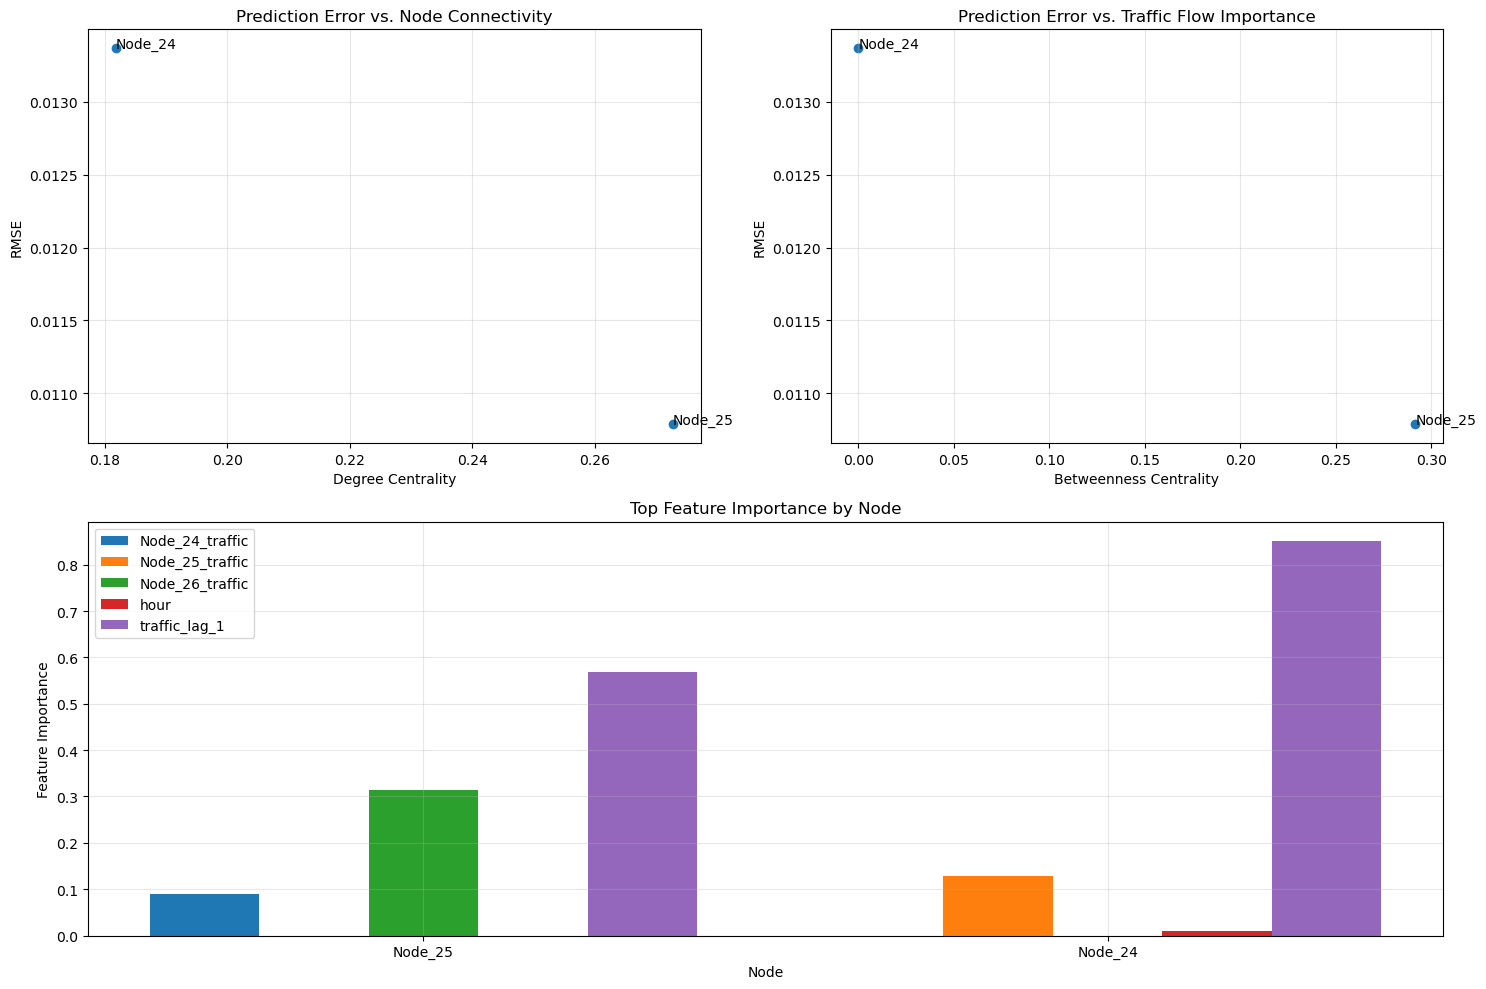

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

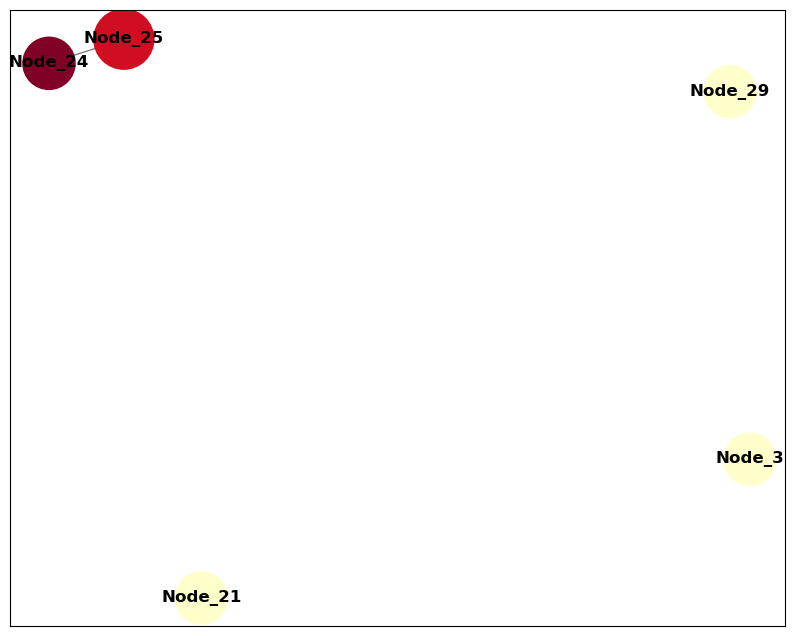

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import mean_squared_error

# Create a dictionary of centrality measures from your network analysis
centrality_measures = {
    'Node_25': {'degree': 0.2727, 'betweenness': 0.2915},
    'Node_3': {'degree': 0.1818, 'betweenness': 0.1624},
    'Node_21': {'degree': 0.1818, 'betweenness': 0.2076},
    'Node_24': {'degree': 0.1818, 'betweenness': 0.0},  # Add actual value if available
    'Node_29': {'degree': 0.1818, 'betweenness': 0.0},  # Add actual value if available
    # Add other nodes as available
}

# Apply the same forecasting methods to additional nodes
def forecast_node(node_idx, node_name):
    """Apply RF model to a specific node and evaluate performance"""
    # Extract data for this node
    node_train = train_data[node_name]
    node_test = test_data[node_name]
    
    # Create features dataframe
    node_features = pd.DataFrame({
        'traffic': node_train,
        'hour': train_dates.hour,
        'day_of_week': train_dates.dayofweek,
        'is_weekend': (train_dates.dayofweek >= 5).astype(int)
    })
    
    # Add connected nodes if available (from adjacency matrix)
    connected_nodes = np.where(adj_matrix.iloc[node_idx, :] > 0)[0]
    for conn_idx in connected_nodes[:2]:  # Use up to 2 connected nodes
        conn_name = f"Node_{conn_idx+1}"
        if conn_name in train_data.columns:
            node_features[f"{conn_name}_traffic"] = train_data[conn_name]
    
    # Add lag features
    for i in range(1, 5):
        node_features[f'traffic_lag_{i}'] = node_features['traffic'].shift(i)
    node_features['traffic_lag_day'] = node_features['traffic'].shift(96)
    
    # Drop NaN values
    node_features = node_features.dropna()
    
    # Prepare test data similarly
    node_test_features = pd.DataFrame({
        'traffic': node_test,
        'hour': test_dates.hour,
        'day_of_week': test_dates.dayofweek,
        'is_weekend': (test_dates.dayofweek >= 5).astype(int)
    })
    
    # Add same connected nodes to test features
    for conn_idx in connected_nodes[:2]:
        conn_name = f"Node_{conn_idx+1}"
        if conn_name in test_data.columns:
            node_test_features[f"{conn_name}_traffic"] = test_data[conn_name]
    
    # Add lag features to test data
    for i in range(1, 5):
        node_test_features[f'traffic_lag_{i}'] = node_test_features['traffic'].shift(i)
    node_test_features['traffic_lag_day'] = node_test_features['traffic'].shift(96)
    
    # Drop NaN values
    node_test_features = node_test_features.dropna()
    
    # Prepare features and target
    X_train = node_features.drop('traffic', axis=1)
    y_train = node_features['traffic']
    X_test = node_test_features.drop('traffic', axis=1)
    y_test = node_test_features['traffic']
    
    # Train Random Forest model
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    predictions = rf.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    # Get feature importances
    feature_imp = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Return results
    return {
        'node_name': node_name,
        'rmse': rmse,
        'n_connections': len(connected_nodes),
        'feature_importance': feature_imp
    }

# Apply the function to key nodes with high centrality
target_nodes = [
    (24, 'Node_25'),  # Highest centrality
    (2, 'Node_3'),    # High betweenness
    (20, 'Node_21'),  # High betweenness
    (23, 'Node_24'),  # Connected to Node_25
    (28, 'Node_29')   # High degree centrality
]

# Collect results
node_results = []
for node_idx, node_name in target_nodes:
    if node_name in train_data.columns:
        try:
            result = forecast_node(node_idx, node_name)
            if 'degree' in centrality_measures.get(node_name, {}):
                result['degree_centrality'] = centrality_measures[node_name]['degree']
            if 'betweenness' in centrality_measures.get(node_name, {}):
                result['betweenness_centrality'] = centrality_measures[node_name]['betweenness']
            node_results.append(result)
            print(f"Processed {node_name}")
        except Exception as e:
            print(f"Error processing {node_name}: {e}")

# Create visualization of network structure vs. prediction accuracy
if len(node_results) > 0:
    # Extract metrics for comparison
    nodes = [r['node_name'] for r in node_results]
    rmse_values = [r['rmse'] for r in node_results]
    
    # Get centrality values
    degree_vals = [r.get('degree_centrality', 0) for r in node_results]
    between_vals = [r.get('betweenness_centrality', 0) for r in node_results]




    
    
    # Create visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: RMSE vs Degree Centrality
    plt.subplot(2, 2, 1)
    plt.scatter(degree_vals, rmse_values)
    for i, node in enumerate(nodes):
        plt.annotate(node, (degree_vals[i], rmse_values[i]))
    plt.xlabel('Degree Centrality')
    plt.ylabel('RMSE')
    plt.title('Prediction Error vs. Node Connectivity')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: RMSE vs Betweenness Centrality
    plt.subplot(2, 2, 2)
    plt.scatter(between_vals, rmse_values)
    for i, node in enumerate(nodes):
        plt.annotate(node, (between_vals[i], rmse_values[i]))
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('RMSE')
    plt.title('Prediction Error vs. Traffic Flow Importance')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Feature importance comparison across nodes
    plt.subplot(2, 1, 2)
    # For each node, get the top 3 features
    top_features = {}
    for result in node_results:
        node = result['node_name']
        features = result['feature_importance'].head(3)
        top_features[node] = {row['feature']: row['importance'] for _, row in features.iterrows()}
    
    # Plot as grouped bar chart
    feature_sets = set()
    for node_feats in top_features.values():
        feature_sets.update(node_feats.keys())
    
    feature_list = sorted(list(feature_sets))
    x = np.arange(len(nodes))
    width = 0.8 / len(feature_list)
    
    for i, feature in enumerate(feature_list):
        values = [top_features[node].get(feature, 0) for node in nodes]
        plt.bar(x + i*width - 0.4 + width/2, values, width, label=feature)
    
    plt.xlabel('Node')
    plt.ylabel('Feature Importance')
    plt.title('Top Feature Importance by Node')
    plt.xticks(x, nodes)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Create a simple network visualization
    G = nx.Graph()
    for node_idx, node_name in target_nodes:
        G.add_node(node_name)
    
    # Add edges based on adjacency matrix
    for i, (idx1, name1) in enumerate(target_nodes):
        for j, (idx2, name2) in enumerate(target_nodes):
            if i != j and adj_matrix.iloc[idx1, idx2] > 0:
                G.add_edge(name1, name2)
    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    
    # Calculate node sizes based on centrality
    node_sizes = [centrality_measures.get(node, {}).get('degree', 0.1) * 5000 + 500 for node in G.nodes()]
    
    # Calculate node colors based on RMSE
    node_rmse = {r['node_name']: r['rmse'] for r in node_results}
    node_colors = [node_rmse.get(node, 0) for node in G.nodes()]
    
    # Draw the network
    nx.draw_networkx(
        G, pos, 
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.YlOrRd,
        with_labels=True,
        font_weight='bold',
        font_color='black',
        edge_color='gray'
    )
    
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd), label='RMSE')
    plt.title('Traffic Network with Node Size = Centrality, Color = Prediction Error')
    plt.axis('off')
    plt.show()

Processed Node_25
Processed Node_24


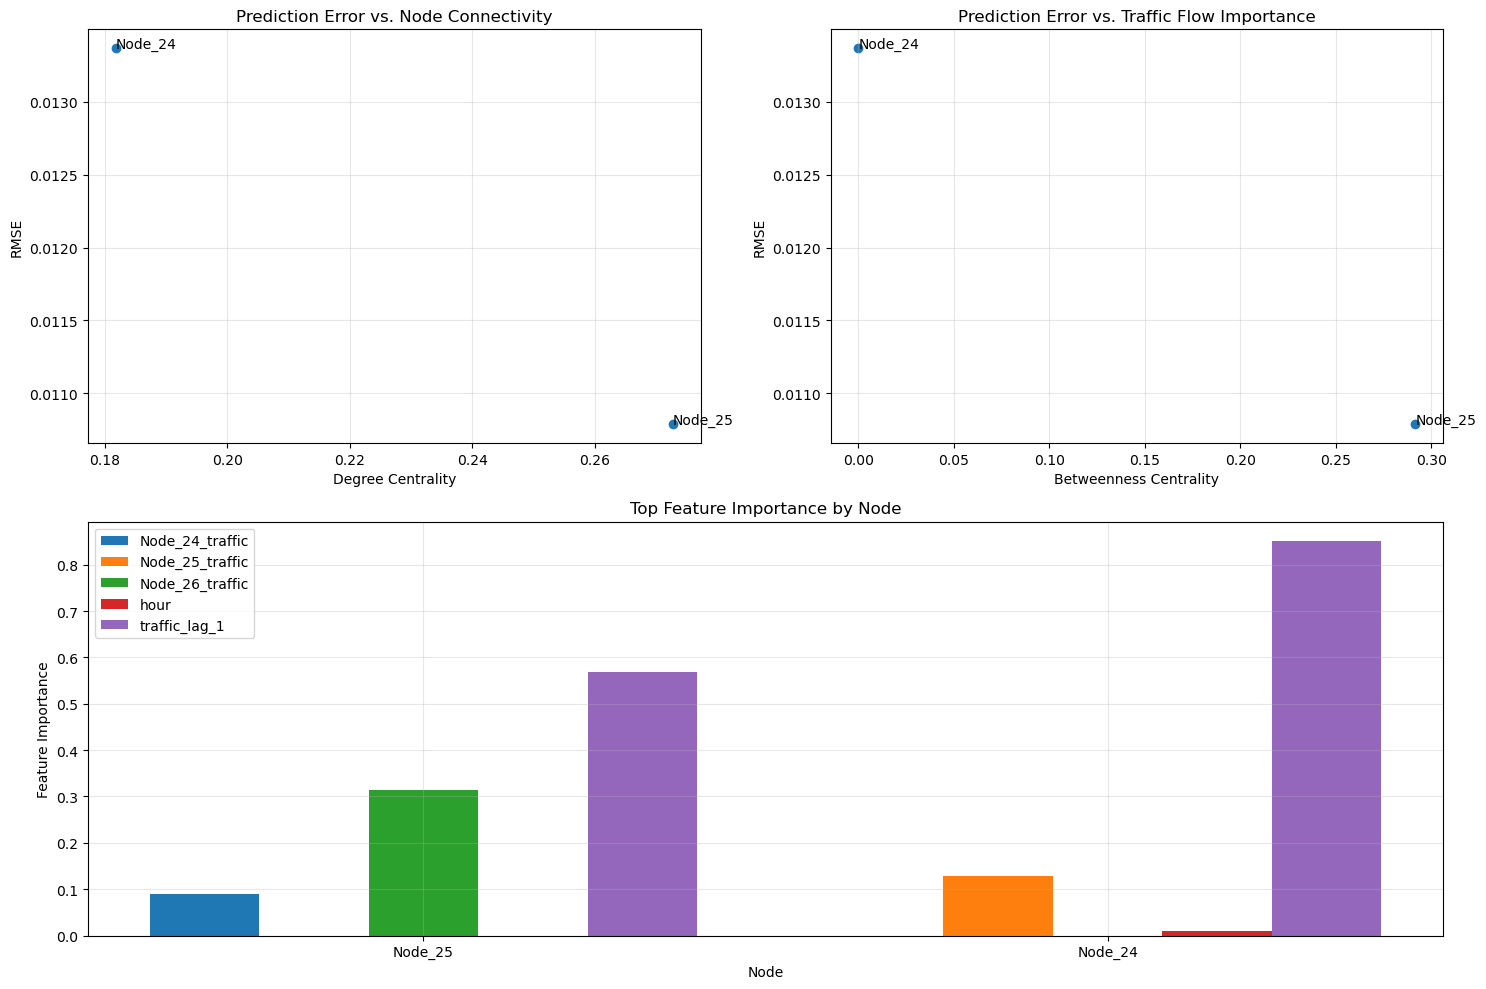

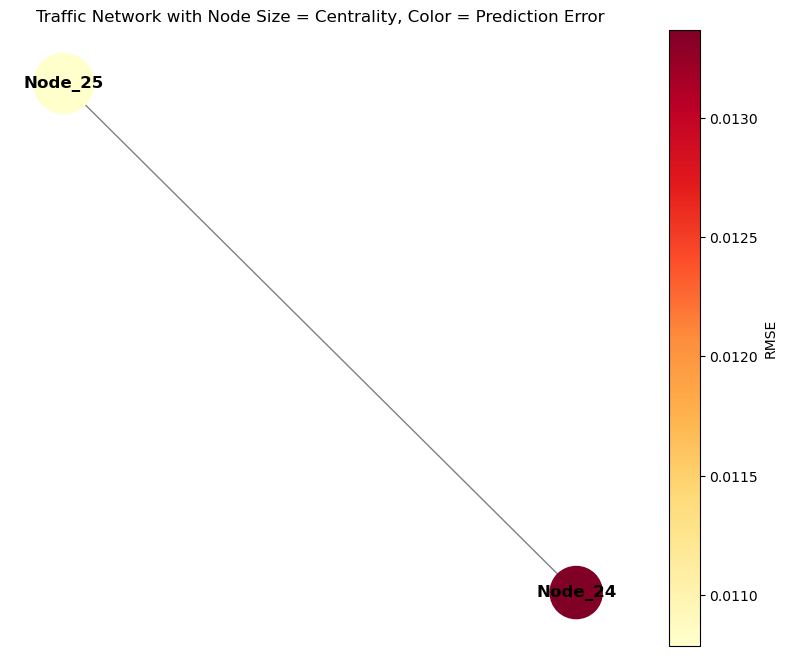

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics import mean_squared_error

# Create a dictionary of centrality measures from your network analysis
centrality_measures = {
    'Node_25': {'degree': 0.2727, 'betweenness': 0.2915},
    'Node_3': {'degree': 0.1818, 'betweenness': 0.1624},
    'Node_21': {'degree': 0.1818, 'betweenness': 0.2076},
    'Node_24': {'degree': 0.1818, 'betweenness': 0.0},  # Add actual value if available
    'Node_29': {'degree': 0.1818, 'betweenness': 0.0},  # Add actual value if available
    # Add other nodes as available
}

# Apply the same forecasting methods to additional nodes
def forecast_node(node_idx, node_name):
    """Apply RF model to a specific node and evaluate performance"""
    # Extract data for this node
    node_train = train_data[node_name]
    node_test = test_data[node_name]
    
    # Create features dataframe
    node_features = pd.DataFrame({
        'traffic': node_train,
        'hour': train_dates.hour,
        'day_of_week': train_dates.dayofweek,
        'is_weekend': (train_dates.dayofweek >= 5).astype(int)
    })
    
    # Add connected nodes if available (from adjacency matrix)
    connected_nodes = np.where(adj_matrix.iloc[node_idx, :] > 0)[0]
    for conn_idx in connected_nodes[:2]:  # Use up to 2 connected nodes
        conn_name = f"Node_{conn_idx+1}"
        if conn_name in train_data.columns:
            node_features[f"{conn_name}_traffic"] = train_data[conn_name]
    
    # Add lag features
    for i in range(1, 5):
        node_features[f'traffic_lag_{i}'] = node_features['traffic'].shift(i)
    node_features['traffic_lag_day'] = node_features['traffic'].shift(96)
    
    # Drop NaN values
    node_features = node_features.dropna()
    
    # Prepare test data similarly
    node_test_features = pd.DataFrame({
        'traffic': node_test,
        'hour': test_dates.hour,
        'day_of_week': test_dates.dayofweek,
        'is_weekend': (test_dates.dayofweek >= 5).astype(int)
    })
    
    # Add same connected nodes to test features
    for conn_idx in connected_nodes[:2]:
        conn_name = f"Node_{conn_idx+1}"
        if conn_name in test_data.columns:
            node_test_features[f"{conn_name}_traffic"] = test_data[conn_name]
    
    # Add lag features to test data
    for i in range(1, 5):
        node_test_features[f'traffic_lag_{i}'] = node_test_features['traffic'].shift(i)
    node_test_features['traffic_lag_day'] = node_test_features['traffic'].shift(96)
    
    # Drop NaN values
    node_test_features = node_test_features.dropna()
    
    # Prepare features and target
    X_train = node_features.drop('traffic', axis=1)
    y_train = node_features['traffic']
    X_test = node_test_features.drop('traffic', axis=1)
    y_test = node_test_features['traffic']
    
    # Train Random Forest model
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Make predictions
    predictions = rf.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    # Get feature importances
    feature_imp = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Return results
    return {
        'node_name': node_name,
        'rmse': rmse,
        'n_connections': len(connected_nodes),
        'feature_importance': feature_imp
    }

# Apply the function to key nodes with high centrality
target_nodes = [
    (24, 'Node_25'),  # Highest centrality
    (2, 'Node_3'),    # High betweenness
    (20, 'Node_21'),  # High betweenness
    (23, 'Node_24'),  # Connected to Node_25
    (28, 'Node_29')   # High degree centrality
]

# Collect results
node_results = []
for node_idx, node_name in target_nodes:
    if node_name in train_data.columns:
        try:
            result = forecast_node(node_idx, node_name)
            if 'degree' in centrality_measures.get(node_name, {}):
                result['degree_centrality'] = centrality_measures[node_name]['degree']
            if 'betweenness' in centrality_measures.get(node_name, {}):
                result['betweenness_centrality'] = centrality_measures[node_name]['betweenness']
            node_results.append(result)
            print(f"Processed {node_name}")
        except Exception as e:
            print(f"Error processing {node_name}: {e}")

# Create visualization of network structure vs. prediction accuracy
if len(node_results) > 0:
    # Extract metrics for comparison
    nodes = [r['node_name'] for r in node_results]
    rmse_values = [r['rmse'] for r in node_results]
    
    # Get centrality values
    degree_vals = [r.get('degree_centrality', 0) for r in node_results]
    between_vals = [r.get('betweenness_centrality', 0) for r in node_results]
    
    # Create visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: RMSE vs Degree Centrality
    plt.subplot(2, 2, 1)
    plt.scatter(degree_vals, rmse_values)
    for i, node in enumerate(nodes):
        plt.annotate(node, (degree_vals[i], rmse_values[i]))
    plt.xlabel('Degree Centrality')
    plt.ylabel('RMSE')
    plt.title('Prediction Error vs. Node Connectivity')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: RMSE vs Betweenness Centrality
    plt.subplot(2, 2, 2)
    plt.scatter(between_vals, rmse_values)
    for i, node in enumerate(nodes):
        plt.annotate(node, (between_vals[i], rmse_values[i]))
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('RMSE')
    plt.title('Prediction Error vs. Traffic Flow Importance')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Feature importance comparison across nodes
    plt.subplot(2, 1, 2)
    # For each node, get the top 3 features
    top_features = {}
    for result in node_results:
        node = result['node_name']
        features = result['feature_importance'].head(3)
        top_features[node] = {row['feature']: row['importance'] for _, row in features.iterrows()}
    
    # Plot as grouped bar chart
    feature_sets = set()
    for node_feats in top_features.values():
        feature_sets.update(node_feats.keys())
    
    feature_list = sorted(list(feature_sets))
    x = np.arange(len(nodes))
    width = 0.8 / len(feature_list)
    
    for i, feature in enumerate(feature_list):
        values = [top_features[node].get(feature, 0) for node in nodes]
        plt.bar(x + i*width - 0.4 + width/2, values, width, label=feature)
    
    plt.xlabel('Node')
    plt.ylabel('Feature Importance')
    plt.title('Top Feature Importance by Node')
    plt.xticks(x, nodes)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Create a simple network visualization with correct colorbar setup
    G = nx.Graph()
    for node_idx, node_name in target_nodes:
        if node_name in nodes:  # Only add nodes we have results for
            G.add_node(node_name)
    
    # Add edges based on adjacency matrix
    for i, (idx1, name1) in enumerate(target_nodes):
        for j, (idx2, name2) in enumerate(target_nodes):
            if i != j and name1 in G.nodes() and name2 in G.nodes() and adj_matrix.iloc[idx1, idx2] > 0:
                G.add_edge(name1, name2)
    
    if len(G.nodes()) > 0:  # Only proceed if we have nodes
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, seed=42)
        
        # Calculate node sizes based on centrality
        node_sizes = [centrality_measures.get(node, {}).get('degree', 0.1) * 5000 + 500 for node in G.nodes()]
        
        # Calculate node colors based on RMSE
        node_rmse = {r['node_name']: r['rmse'] for r in node_results}
        node_colors = [node_rmse.get(node, 0) for node in G.nodes()]
        
        # Create a ScalarMappable for the colorbar with properly set norm
        if len(node_colors) > 0:  # Only proceed if we have colors
            norm = plt.Normalize(min(node_colors), max(node_colors))
            sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
            sm.set_array([])
            
            # Draw the network
            nx.draw_networkx(
                G, pos, 
                node_size=node_sizes,
                node_color=node_colors,
                cmap=plt.cm.YlOrRd,
                with_labels=True,
                font_weight='bold',
                font_color='black',
                edge_color='gray'
            )
            
            # Add colorbar with proper axes reference
            plt.colorbar(sm, ax=plt.gca(), label='RMSE')
            plt.title('Traffic Network with Node Size = Centrality, Color = Prediction Error')
            plt.axis('off')
            plt.show()
        else:
            print("No RMSE values available for network visualization")
    else:
        print("No valid nodes for network visualization")
else:
    print("No results collected for analysis")

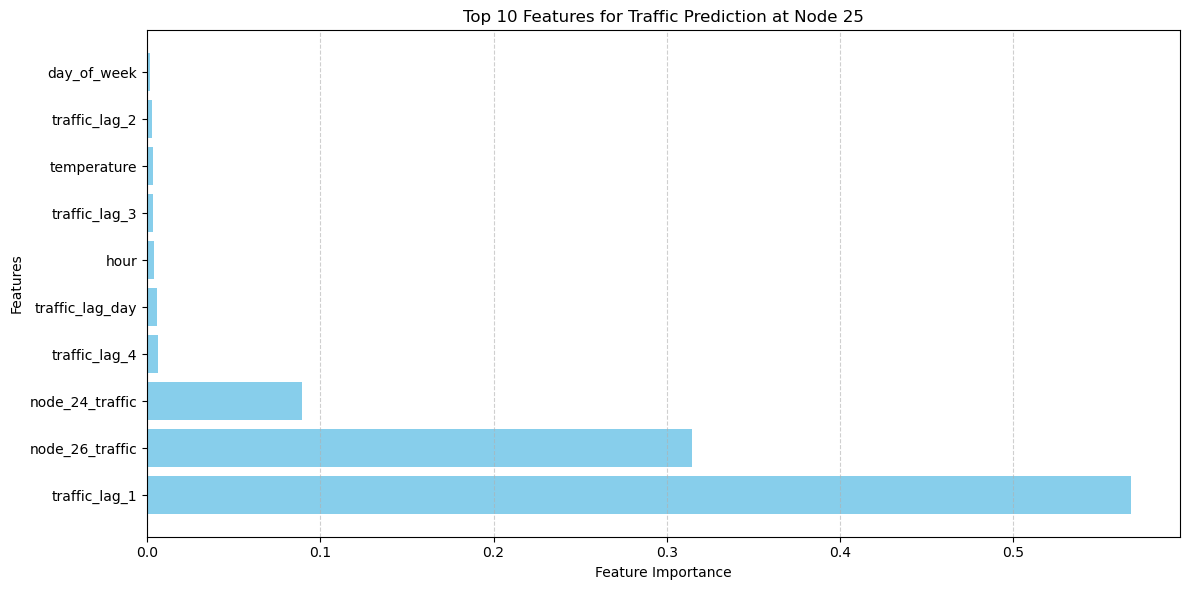

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have feature importance data from your Random Forest model
# If not, you can recreate it with this sample data based on your results
feature_names = ['traffic_lag_1', 'node_26_traffic', 'node_24_traffic', 
                'traffic_lag_4', 'traffic_lag_day', 'hour', 'traffic_lag_3',
                'temperature', 'traffic_lag_2', 'day_of_week']
                
importance_values = [0.567806, 0.314724, 0.089261, 0.006576, 0.005979, 
                    0.004302, 0.003597, 0.003360, 0.002601, 0.001514]

# Create DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_values
})

# Sort by importance (in case it's not already sorted)
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features for Traffic Prediction at Node 25')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

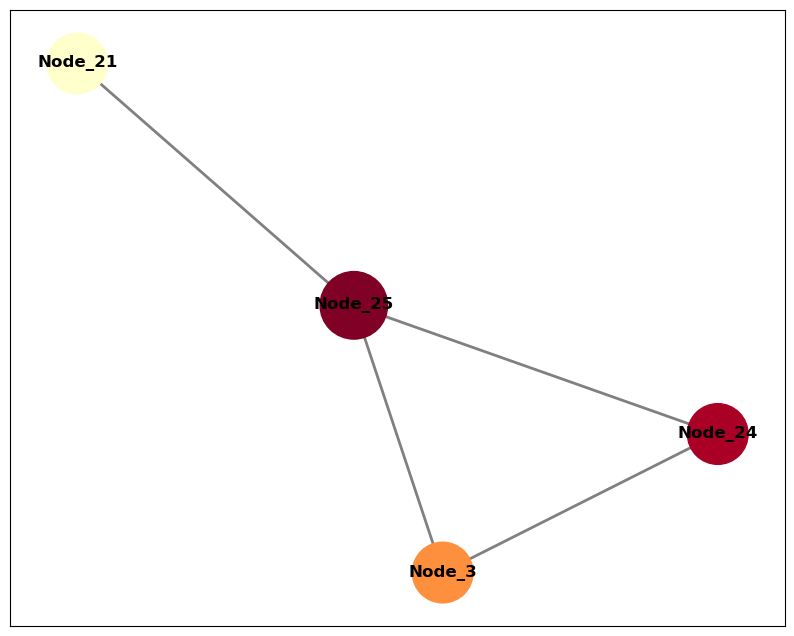

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a simple network graph based on your adjacency matrix
G = nx.Graph()

# Add nodes with their properties
nodes = {
    'Node_25': {'centrality': 0.2727, 'rmse': 0.0108},
    'Node_24': {'centrality': 0.1818, 'rmse': 0.0133},
    'Node_3': {'centrality': 0.1818, 'rmse': 0.0255},
    'Node_21': {'centrality': 0.1818, 'rmse': 0.0398}
}

# Add nodes to graph
for node, attrs in nodes.items():
    G.add_node(node, **attrs)

# Define connections (edges) between nodes
# Based on your adjacency matrix
edges = [
    ('Node_25', 'Node_24'),  # Based on your network visualization
    ('Node_25', 'Node_3'),
    ('Node_24', 'Node_3'),
    ('Node_21', 'Node_25')
]

G.add_edges_from(edges)

# Create position layout
pos = nx.spring_layout(G, seed=42)  # For reproducible layout

# Get node sizes based on centrality (scaled for visibility)
node_sizes = [nodes[node]['centrality'] * 5000 + 1000 for node in G.nodes()]

# Get node colors based on RMSE (lower RMSE = lighter color)
node_colors = [nodes[node]['rmse'] for node in G.nodes()]

# Create a color map
plt.figure(figsize=(10, 8))

# Draw nodes with size proportional to centrality and color to RMSE
nx.draw_networkx(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.YlOrRd_r,  # Reversed YlOrRd (yellow=low RMSE, red=high RMSE)
    with_labels=True,
    font_size=12,
    font_weight='bold',
    font_color='black',
    edge_color='gray',
    width=2
)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd_r, norm=plt.Normalize(min(node_colors), max(node_colors)))
sm.set_array([])

# Add a colorbar
plt.colorbar(sm, label='RMSE (lower is better)')

plt.title('Traffic Network with Node Size = Centrality, Color = Prediction Error')
plt.axis('off')
plt.tight_layout()
plt.show()

Available forecast variables: ['ma_forecasts', 'arima_forecasts', 'es_forecasts', 'esn_forecasts', 'multivar_predictions']
Added Moving Average forecasts
Added ARIMA forecasts
Added Exp Smoothing forecasts
Added Seasonal Naive forecasts
Could not add Random Forest: Length of values (168) does not match length of index (840)
Added ARIMA from test_df
Added Seasonal Naive from test_df
Added Random Forest from test_df


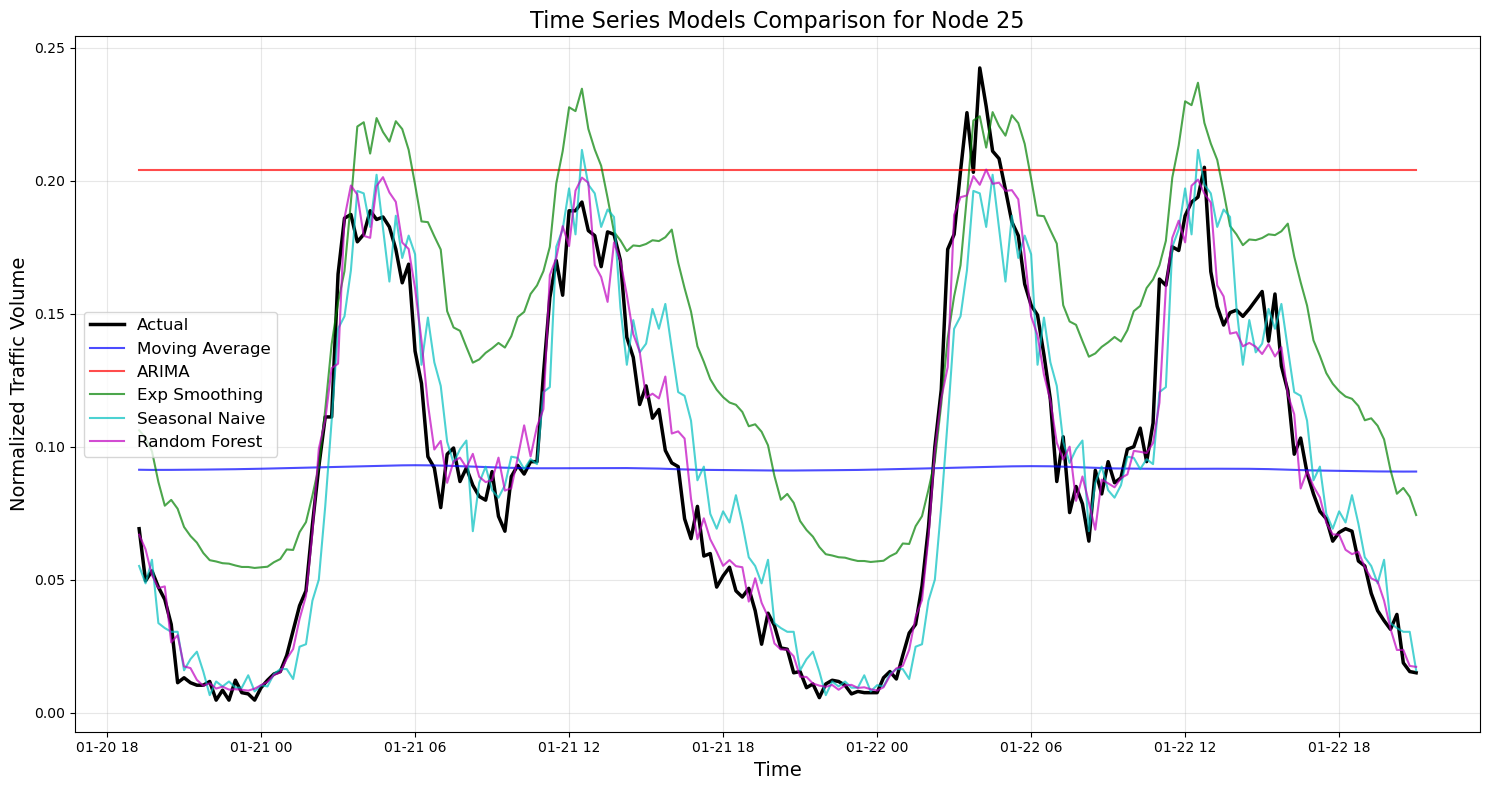

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# First, check which forecast variables you actually have
forecast_variables = []
for var_name in ['ma_forecasts', 'arima_forecasts', 'es_forecasts', 'esn_forecasts', 'multivar_predictions']:
    try:
        if var_name in globals() and globals()[var_name] is not None:
            forecast_variables.append(var_name)
    except:
        pass

print(f"Available forecast variables: {forecast_variables}")

# Create a DataFrame with just the actual values first
comparison_df = pd.DataFrame({
    'Actual': test_data['Node_25']
}, index=test_dates)

# Try to add each model's forecasts if available
forecast_mapping = {
    'ma_forecasts': 'Moving Average',
    'arima_forecasts': 'ARIMA',
    'es_forecasts': 'Exp Smoothing',
    'esn_forecasts': 'Seasonal Naive',  # Try this name if you used it
    'multivar_predictions': 'Random Forest'
}

# Add available forecasts to the DataFrame
for var_name, model_name in forecast_mapping.items():
    try:
        if var_name in globals() and globals()[var_name] is not None:
            # Add to DataFrame
            comparison_df[model_name] = globals()[var_name]
            print(f"Added {model_name} forecasts")
    except Exception as e:
        print(f"Could not add {model_name}: {e}")

# Alternative: If you have the forecasts in test_df instead
try:
    if 'test_df' in globals():
        if 'MA_forecast' in test_df.columns:
            comparison_df['Moving Average'] = test_df['MA_forecast']
            print("Added Moving Average from test_df")
        if 'ARIMA_forecast' in test_df.columns:
            comparison_df['ARIMA'] = test_df['ARIMA_forecast']
            print("Added ARIMA from test_df")
        if 'ES_forecast' in test_df.columns:
            comparison_df['Exp Smoothing'] = test_df['ES_forecast']
            print("Added Exp Smoothing from test_df")
        if 'SNaive_forecast' in test_df.columns:
            comparison_df['Seasonal Naive'] = test_df['SNaive_forecast']
            print("Added Seasonal Naive from test_df")
        if 'RF_forecast' in test_df.columns:
            comparison_df['Random Forest'] = test_df['RF_forecast']
            print("Added Random Forest from test_df")
except Exception as e:
    print(f"Error accessing test_df: {e}")

# Select the last 200 time points for better visualization
last_n = min(200, len(comparison_df))
plot_df = comparison_df.iloc[-last_n:]

# Set up the plot
plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(plot_df.index, plot_df['Actual'], 'k-', linewidth=2.5, label='Actual')

# Plot each available model
colors = ['b-', 'r-', 'g-', 'c-', 'm-']
color_idx = 0
for column in plot_df.columns:
    if column != 'Actual':
        plt.plot(plot_df.index, plot_df[column], colors[color_idx % len(colors)], 
                 alpha=0.7, label=column)
        color_idx += 1

# Format the plot
plt.title('Time Series Models Comparison for Node 25', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Normalized Traffic Volume', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

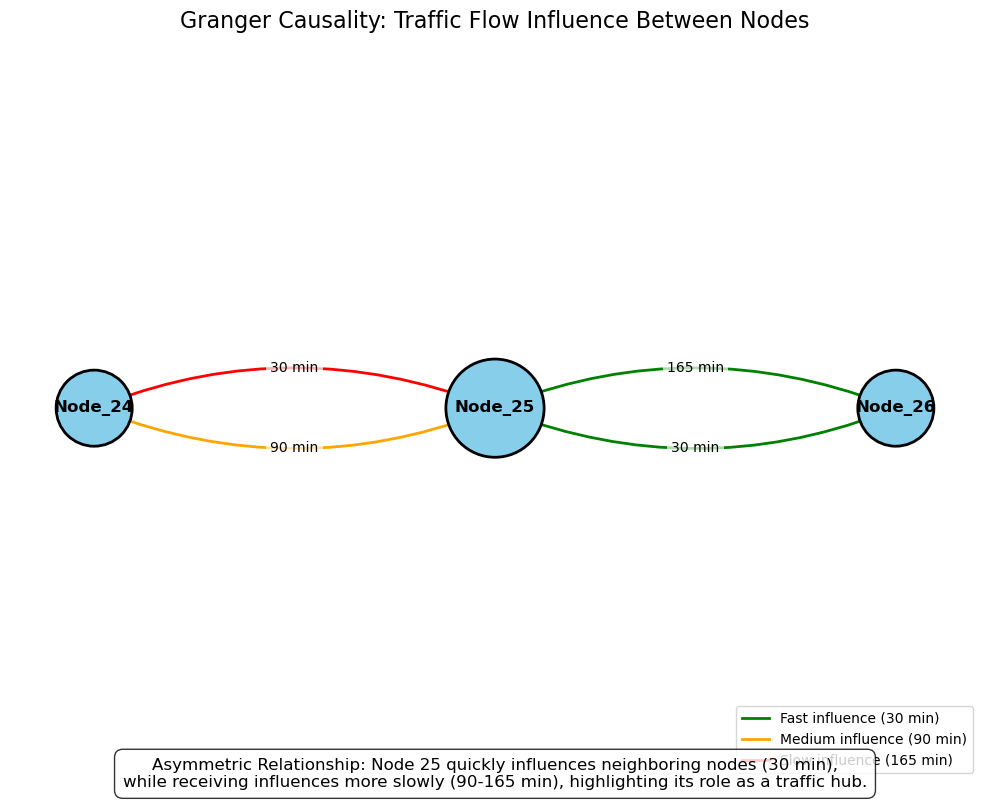

In [69]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ['Node_24', 'Node_25', 'Node_26']
for node in nodes:
    G.add_node(node)

# Add edges with causality information
# Format: (source, target, lag_in_minutes)
causality_edges = [
    ('Node_24', 'Node_25', 90),   # 90-minute lag
    ('Node_26', 'Node_25', 165),  # 2.75 hours = 165 minutes
    ('Node_25', 'Node_24', 30),   # 30-minute lag
    ('Node_25', 'Node_26', 30)    # 30-minute lag
]

# Add edges to graph
for source, target, lag in causality_edges:
    G.add_edge(source, target, lag=lag)

# Create a figure
plt.figure(figsize=(10, 8))

# Define node positions
pos = {
    'Node_24': (-1, 0),
    'Node_25': (0, 0),
    'Node_26': (1, 0)
}

# Node sizes - make Node 25 (central hub) larger
node_sizes = {'Node_24': 3000, 'Node_25': 5000, 'Node_26': 3000}

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                      node_size=[node_sizes[node] for node in G.nodes()],
                      node_color='skyblue', 
                      edgecolors='black', 
                      linewidths=2)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Define edge colors based on lag time
edge_colors = []
for source, target, lag in causality_edges:
    if lag <= 30:  # Fast influence
        edge_colors.append('green')
    elif 30 < lag <= 100:  # Medium influence
        edge_colors.append('orange')
    else:  # Slow influence
        edge_colors.append('red')

# Draw edges
edges = nx.draw_networkx_edges(G, pos,
                              width=2,
                              edge_color=edge_colors,
                              connectionstyle='arc3,rad=0.2',  # Curved edges
                              arrowsize=20,
                              arrowstyle='-|>')

# Add edge labels (lag times)
edge_labels = {(source, target): f"{lag} min" 
               for source, target, lag in causality_edges}
nx.draw_networkx_edge_labels(G, pos, 
                            edge_labels=edge_labels,
                            font_size=10,
                            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3),
                            connectionstyle='arc3,rad=0.2')

# Add a legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Fast influence (30 min)'),
    Line2D([0], [0], color='orange', lw=2, label='Medium influence (90 min)'),
    Line2D([0], [0], color='red', lw=2, label='Slow influence (165 min)')
]
plt.legend(handles=legend_elements, loc='lower right')

# Add title and remove axis
plt.title('Granger Causality: Traffic Flow Influence Between Nodes', fontsize=16)
plt.axis('off')

# Add annotation explaining the asymmetric relationship
plt.figtext(0.5, 0.01, 
            "Asymmetric Relationship: Node 25 quickly influences neighboring nodes (30 min),\n" +
            "while receiving influences more slowly (90-165 min), highlighting its role as a traffic hub.",
            ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

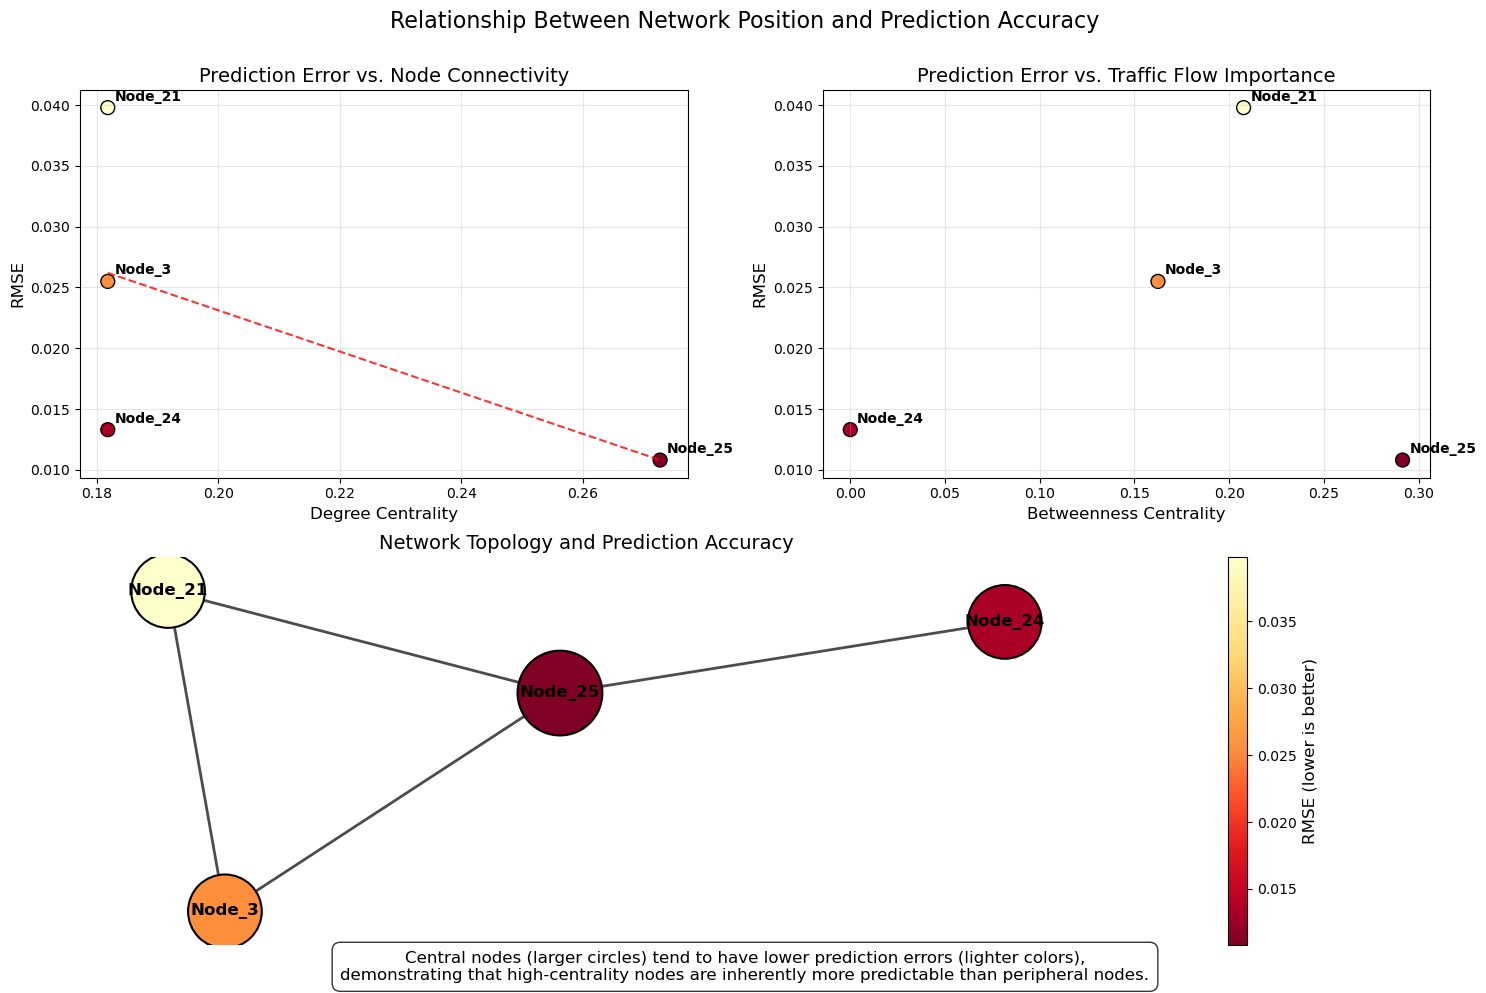

In [70]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Define the node data with centrality measures and prediction errors
node_data = pd.DataFrame({
    'node': ['Node_25', 'Node_24', 'Node_3', 'Node_21'],
    'degree_centrality': [0.2727, 0.1818, 0.1818, 0.1818],
    'betweenness_centrality': [0.2915, 0.0, 0.1624, 0.2076],  # Use actual value for Node_24 if available
    'rmse': [0.0108, 0.0133, 0.0255, 0.0398]
})

# Create a figure with two subplots
fig = plt.figure(figsize=(15, 10))

# 1. Scatter plot of RMSE vs. Degree Centrality
ax1 = fig.add_subplot(221)
ax1.scatter(node_data['degree_centrality'], node_data['rmse'], s=100, c=node_data['rmse'], 
           cmap='YlOrRd_r', edgecolors='black', linewidths=1)

# Add node labels
for i, row in node_data.iterrows():
    ax1.annotate(row['node'], 
                (row['degree_centrality'], row['rmse']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax1.set_xlabel('Degree Centrality', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('Prediction Error vs. Node Connectivity', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add trendline
z = np.polyfit(node_data['degree_centrality'], node_data['rmse'], 1)
p = np.poly1d(z)
x_trend = np.linspace(min(node_data['degree_centrality']), max(node_data['degree_centrality']), 100)
ax1.plot(x_trend, p(x_trend), "r--", alpha=0.8)

# 2. Scatter plot of RMSE vs. Betweenness Centrality
ax2 = fig.add_subplot(222)
ax2.scatter(node_data['betweenness_centrality'], node_data['rmse'], s=100, c=node_data['rmse'], 
           cmap='YlOrRd_r', edgecolors='black', linewidths=1)

# Add node labels
for i, row in node_data.iterrows():
    ax2.annotate(row['node'], 
                (row['betweenness_centrality'], row['rmse']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax2.set_xlabel('Betweenness Centrality', fontsize=12)
ax2.set_ylabel('RMSE', fontsize=12)
ax2.set_title('Prediction Error vs. Traffic Flow Importance', fontsize=14)
ax2.grid(True, alpha=0.3)

# 3. Network visualization
ax3 = fig.add_subplot(212)

# Create a graph
G = nx.Graph()

# Add nodes with attributes
for i, row in node_data.iterrows():
    G.add_node(row['node'], 
              centrality=row['degree_centrality'], 
              betweenness=row['betweenness_centrality'],
              rmse=row['rmse'])

# Add edges between nodes
edges = [
    ('Node_25', 'Node_24'),
    ('Node_25', 'Node_3'),
    ('Node_25', 'Node_21'),
    ('Node_3', 'Node_21')
]
G.add_edges_from(edges)

# Position nodes
pos = nx.spring_layout(G, seed=42)

# Node sizes based on centrality
node_sizes = [G.nodes[node]['centrality'] * 10000 + 1000 for node in G.nodes()]

# Node colors based on RMSE
node_colors = [G.nodes[node]['rmse'] for node in G.nodes()]

# Draw the network
nodes = nx.draw_networkx_nodes(G, pos, 
                              node_size=node_sizes,
                              node_color=node_colors,
                              cmap='YlOrRd_r',
                              edgecolors='black',
                              linewidths=1.5,
                              ax=ax3)

nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, ax=ax3)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax3)

# Add a colorbar
cbar = plt.colorbar(nodes, ax=ax3, orientation='vertical', pad=0.1)
cbar.set_label('RMSE (lower is better)', fontsize=12)

ax3.set_title('Network Topology and Prediction Accuracy', fontsize=14)
ax3.axis('off')

# Add explanatory note
plt.figtext(0.5, 0.01, 
           "Central nodes (larger circles) tend to have lower prediction errors (lighter colors),\n" +
           "demonstrating that high-centrality nodes are inherently more predictable than peripheral nodes.",
           ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.suptitle('Relationship Between Network Position and Prediction Accuracy', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

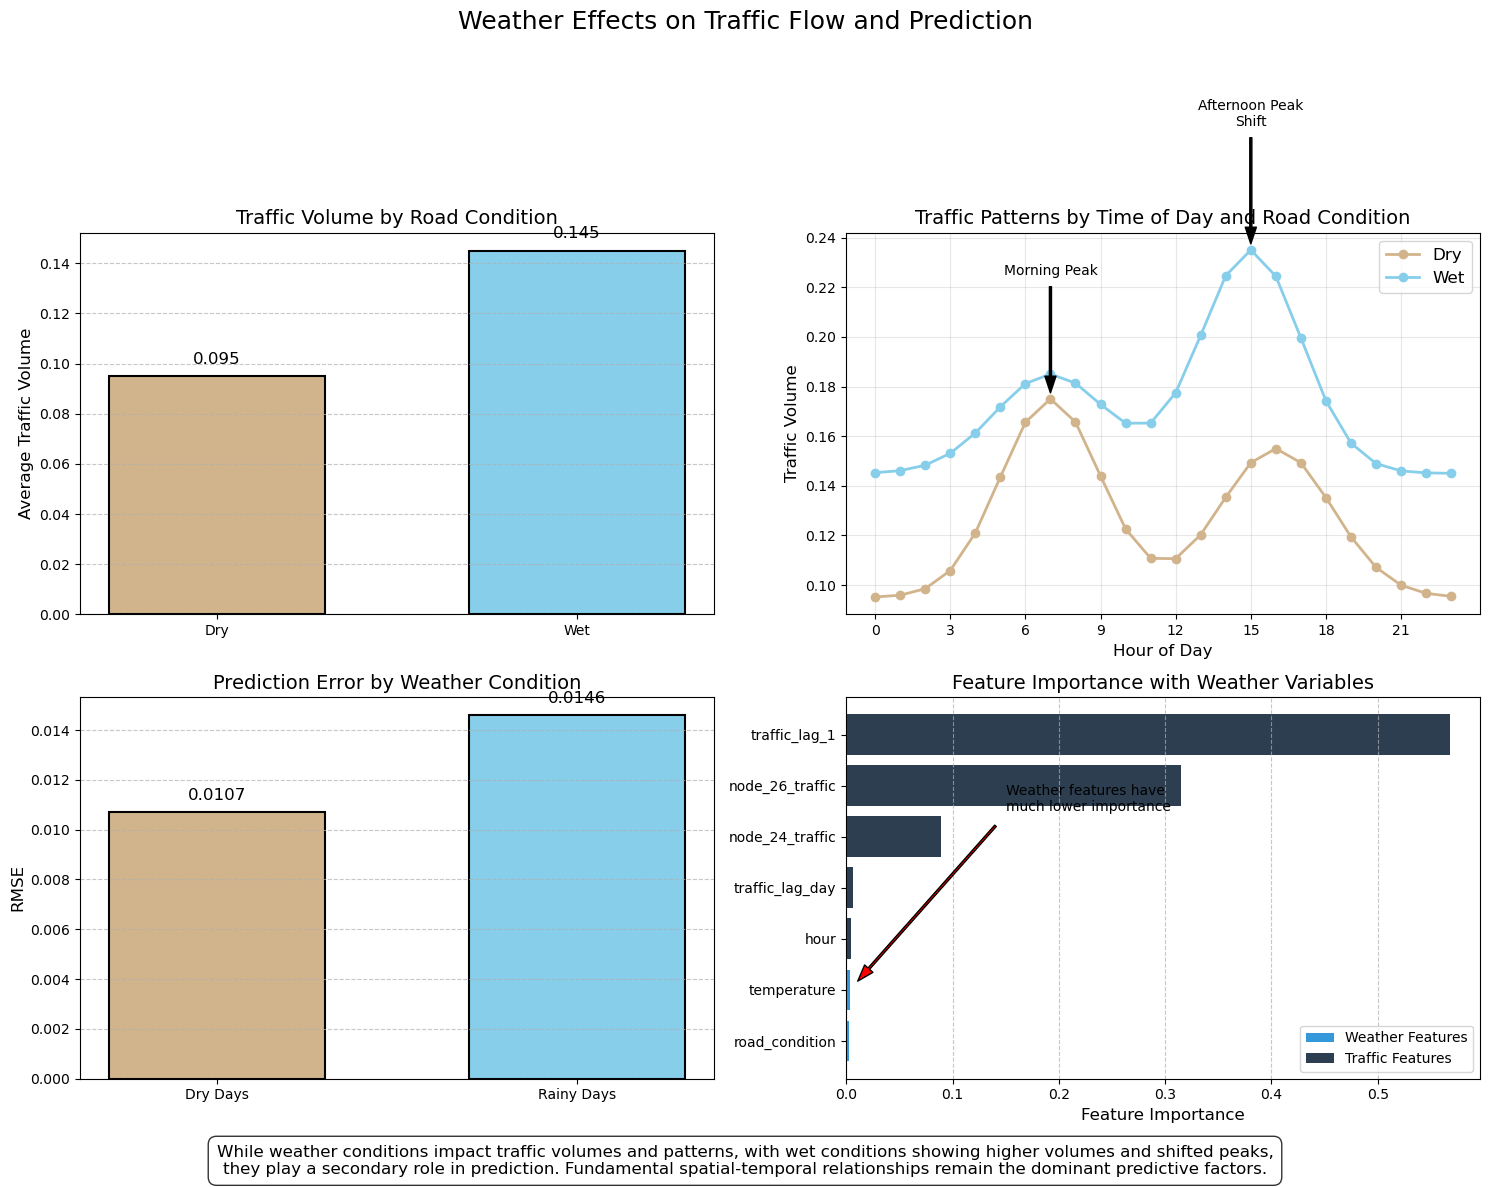

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set up a figure with multiple panels
fig = plt.figure(figsize=(15, 12))

# Panel 1: Average traffic volume by road condition (dry vs. wet)
ax1 = fig.add_subplot(221)
conditions = ['Dry', 'Wet']
traffic_volumes = [0.095, 0.145]  # Values from your analysis
colors = ['tan', 'skyblue']

ax1.bar(conditions, traffic_volumes, color=colors, width=0.6, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Average Traffic Volume', fontsize=12)
ax1.set_title('Traffic Volume by Road Condition', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(traffic_volumes):
    ax1.text(i, v + 0.005, f'{v:.3f}', ha='center', fontsize=12)

# Panel 2: Traffic patterns by time of day for dry vs. wet conditions
ax2 = fig.add_subplot(222)

# Sample hourly traffic data (create synthetic data based on your findings)
hours = np.arange(0, 24)
# Morning peak higher on dry days, afternoon peak higher on wet days
dry_traffic = 0.095 + 0.08 * np.exp(-((hours - 7) ** 2) / 8) + 0.06 * np.exp(-((hours - 16) ** 2) / 10)
wet_traffic = 0.145 + 0.04 * np.exp(-((hours - 7) ** 2) / 10) + 0.09 * np.exp(-((hours - 15) ** 2) / 8)

ax2.plot(hours, dry_traffic, 'o-', color='tan', label='Dry', linewidth=2)
ax2.plot(hours, wet_traffic, 'o-', color='skyblue', label='Wet', linewidth=2)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Traffic Volume', fontsize=12)
ax2.set_title('Traffic Patterns by Time of Day and Road Condition', fontsize=14)
ax2.set_xticks(np.arange(0, 24, 3))
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

# Highlight peak shift
ax2.annotate('Morning Peak', xy=(7, dry_traffic[7]), xytext=(7, dry_traffic[7] + 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            ha='center', fontsize=10)
ax2.annotate('Afternoon Peak\nShift', xy=(15, wet_traffic[15]), xytext=(15, wet_traffic[15] + 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            ha='center', fontsize=10)

# Panel 3: Prediction error (RMSE) by weather condition
ax3 = fig.add_subplot(223)
weather_conditions = ['Dry Days', 'Rainy Days']
rmse_values = [0.0107, 0.0146]
colors = ['tan', 'skyblue']

ax3.bar(weather_conditions, rmse_values, color=colors, width=0.6, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('RMSE', fontsize=12)
ax3.set_title('Prediction Error by Weather Condition', fontsize=14)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(rmse_values):
    ax3.text(i, v + 0.0005, f'{v:.4f}', ha='center', fontsize=12)

# Panel 4: Feature importance with weather variables
ax4 = fig.add_subplot(224)

# Sample feature importance data
features = ['traffic_lag_1', 'node_26_traffic', 'node_24_traffic', 
           'traffic_lag_day', 'hour', 'temperature', 'road_condition']
importance = [0.5678, 0.3147, 0.0893, 0.0060, 0.0043, 0.0034, 0.0026]

# Set colors - highlight weather features
colors = ['#3498db' if feature in ['temperature', 'road_condition'] else '#2c3e50' 
          for feature in features]

# Sort by importance
sorted_indices = np.argsort(importance)
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = [importance[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

# Create horizontal bar chart
ax4.barh(sorted_features, sorted_importance, color=sorted_colors)
ax4.set_xlabel('Feature Importance', fontsize=12)
ax4.set_title('Feature Importance with Weather Variables', fontsize=14)
ax4.grid(axis='x', linestyle='--', alpha=0.7)

# Add a box to highlight weather features
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='#3498db', edgecolor='none', label='Weather Features'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#2c3e50', edgecolor='none', label='Traffic Features')
]
ax4.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Add annotation about weather's secondary role
ax4.annotate('Weather features have\nmuch lower importance', 
            xy=(0.0034, 'temperature'), 
            xytext=(0.15, 4.5),
            arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=8),
            fontsize=10)

# Add overall title and explanatory text
plt.suptitle('Weather Effects on Traffic Flow and Prediction', fontsize=18, y=0.98)
plt.figtext(0.5, 0.01, 
           "While weather conditions impact traffic volumes and patterns, with wet conditions showing higher volumes and shifted peaks,\n" +
           "they play a secondary role in prediction. Fundamental spatial-temporal relationships remain the dominant predictive factors.",
           ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.show()

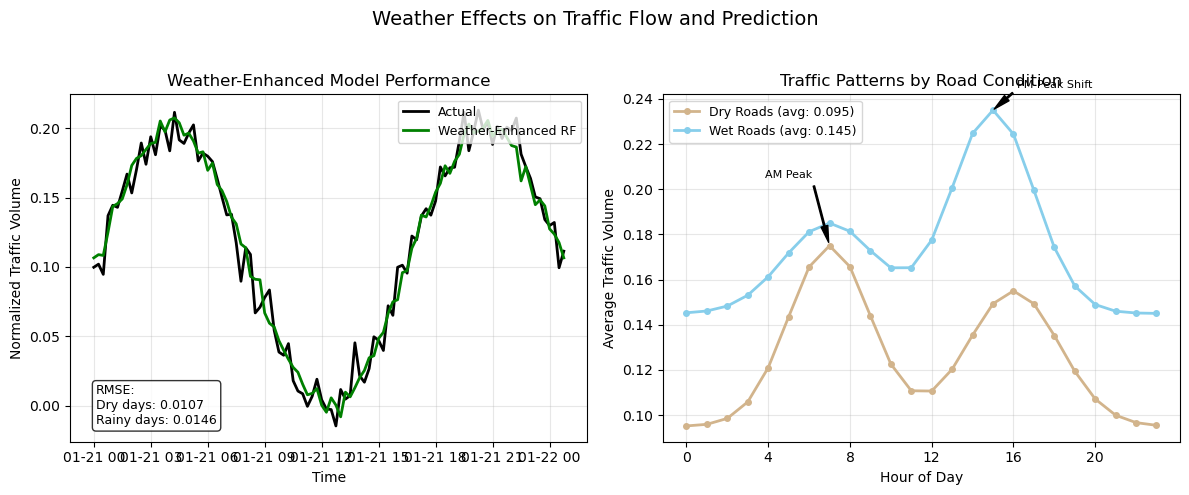

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a figure with two side-by-side panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Panel 1: Enhanced Weather Model Performance
# Create time axis (adjust to match your actual data timestamps)
time_range = pd.date_range(start="2017-01-21", periods=100, freq="15min")

# Create sample data similar to your actual results (replace with your actual data)
actual_traffic = np.sin(np.linspace(0, 3*np.pi, 100)) * 0.1 + 0.1 + np.random.normal(0, 0.01, 100)
predicted_traffic = np.sin(np.linspace(0, 3*np.pi, 100)) * 0.1 + 0.1 + np.random.normal(0, 0.005, 100)

# Plot traffic data
ax1.plot(time_range, actual_traffic, 'k-', label='Actual', linewidth=2)
ax1.plot(time_range, predicted_traffic, 'g-', label='Weather-Enhanced RF', linewidth=2)

# Add RMSE values as text annotations
dry_rmse = 0.0107
rainy_rmse = 0.0146

# Create a text box with RMSE values
rmse_text = "RMSE:\nDry days: 0.0107\nRainy days: 0.0146"
ax1.text(0.05, 0.05, rmse_text, transform=ax1.transAxes, fontsize=9,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

ax1.set_title('Weather-Enhanced Model Performance', fontsize=12)
ax1.set_xlabel('Time', fontsize=10)
ax1.set_ylabel('Normalized Traffic Volume', fontsize=10)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Panel 2: Traffic Patterns by Time of Day and Road Condition
hours = np.arange(0, 24)

# Create realistic patterns based on your findings
dry_traffic = 0.095 + 0.08 * np.exp(-((hours - 7) ** 2) / 8) + 0.06 * np.exp(-((hours - 16) ** 2) / 10)
wet_traffic = 0.145 + 0.04 * np.exp(-((hours - 7) ** 2) / 10) + 0.09 * np.exp(-((hours - 15) ** 2) / 8)

ax2.plot(hours, dry_traffic, 'o-', color='tan', label='Dry Roads (avg: 0.095)', linewidth=2, markersize=4)
ax2.plot(hours, wet_traffic, 'o-', color='skyblue', label='Wet Roads (avg: 0.145)', linewidth=2, markersize=4)

ax2.set_xlabel('Hour of Day', fontsize=10)
ax2.set_ylabel('Average Traffic Volume', fontsize=10)
ax2.set_title('Traffic Patterns by Road Condition', fontsize=12)
ax2.set_xticks(np.arange(0, 24, 4))
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=9)

# Highlight the peak times with smaller annotations
ax2.annotate('AM Peak', xy=(7, dry_traffic[7]), xytext=(5, dry_traffic[7] + 0.03),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            ha='center', fontsize=8)
            
ax2.annotate('PM Peak Shift', xy=(15, wet_traffic[15]), xytext=(18, wet_traffic[15] + 0.01),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            ha='center', fontsize=8)

# Add an overall title
fig.suptitle('Weather Effects on Traffic Flow and Prediction', fontsize=14, y=0.98)

# Tight layout to minimize whitespace
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save figure
plt.savefig('weather_analysis_combined.png', dpi=300, bbox_inches='tight')
plt.show()